<a target="_blank" href="https://colab.research.google.com/github/sarthakrastogi/graph-rag/blob/main/documents_graph_usage.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
!pip install knowledge_graph_rag

In [2]:
%%capture
from knowledge_graph_rag.document import Document
from knowledge_graph_rag.documents_graph import DocumentsGraph

Graph RAG can perform much better than std RAG. Here’s when and how:

When you want your LLM to understand the interconnection between your documents before arriving to its answer, Graph RAG is necessary.

RAG returns search results based on semantic similarity. It fails to consider that, if doc A is selected as highly relevant, the docs containing data closely linked to doc A must be included in the context to give a full picture.

This is where we need Graph RAG.

Search results from a graph are more likely to give you a comprehensive view of the entity being searched and the info connected to it.

Information on entities like people, institutions, etc. is often highly interconnected, and this might be the case for your data too.


In [3]:

documents = ["Cardiovascular disease (CVD) encompasses a spectrum of disorders involving the heart and vasculature, prominently including atherosclerosis, characterized by endothelial dysfunction and the accumulation of lipid-laden plaques. These pathophysiological processes often precipitate myocardial infarction and cerebrovascular accidents, arising from the rupture of vulnerable plaques and subsequent thrombogenesis.",
             "Management of cardiovascular disease necessitates a multifaceted approach involving antihypertensive agents, statins to modulate dyslipidemia, and antiplatelet therapy to mitigate thrombosis risk.",
             "Emerging therapeutic interventions targeting molecular pathways, including PCSK9 inhibitors and SGLT2 inhibitors, show promise in reducing cardiovascular morbidity and mortality.",
             "The epidemiological burden of cardiovascular disease underscores the imperative for ongoing research into genetic predispositions and the optimization of primary and secondary prevention strategies."
             "Cardiovascular disease also significantly intersects with metabolic syndrome, wherein insulin resistance and visceral adiposity contribute to endothelial dysfunction and systemic inflammation, further accelerating atherogenic processes.",
             "Advanced imaging techniques, such as coronary artery calcium scoring and carotid intima-media thickness measurement, enhance the stratification of cardiovascular risk, enabling more tailored therapeutic interventions.",
             "Role of novel biomarkers, including high-sensitivity troponins and natriuretic peptides, is pivotal in the early detection and prognostication of acute coronary syndromes and heart failure within the broader spectrum of cardiovascular disease."
]

### 1. Create a VectorDB

In [4]:
def get_embedding_batch(input_array):
    from openai import OpenAI
    client = OpenAI()
    response = client.embeddings.create(
        input=input_array,
        model="text-embedding-3-small"
    )
    return [data.embedding for data in response.data]

In [5]:
#embeddings = get_embedding_batch(documents)
embeddings = [[0.005953135434538126, 0.01183091476559639, 0.05498845502734184, 0.04542899131774902, 0.002528467681258917, 0.03797949478030205, 0.02534119412302971, -0.020679878070950508, -0.003560577752068639, 0.017170434817671776, 0.0729447454214096, 0.025987103581428528, -0.030056336894631386, -0.025276603177189827, 0.02643924206495285, 0.0025230851024389267, -0.0036924511659890413, 0.04590265825390816, 0.05597884953022003, 0.008332236669957638, 0.052318695932626724, 0.002844694536179304, -0.005651711020618677, -0.006690549198538065, 0.016524525359272957, -0.04258698597550392, 0.0004948611021973193, -0.0036924511659890413, 0.017601042985916138, -0.019807901233434677, 0.04508450627326965, -0.015491070225834846, 0.015889381989836693, 0.005339520983397961, 0.007987751625478268, 0.01966795325279236, -0.011497194878757, 0.01849455013871193, 0.014500674791634083, 0.05391193926334381, 0.011174239218235016, 0.004758202005177736, -0.006771287880837917, 0.04086456075310707, -0.04448165372014046, -0.03922825679183006, -0.007438728120177984, -0.03416862711310387, -0.0320155955851078, 0.02609475702047348, -0.05188808590173721, 0.028247788548469543, 0.042716167867183685, 0.05464396998286247, 0.02538425475358963, 0.03386720269918442, 0.025857921689748764, 0.033781081438064575, -0.026159347966313362, -0.015135820023715496, -0.0076486486941576, -0.005331447347998619, -0.014963577501475811, -0.0260301660746336, 0.003539047436788678, -0.015178880654275417, -0.008240732364356518, 0.008375297300517559, 0.015178880654275417, 0.010592920705676079, 0.00996854156255722, -0.03477147966623306, -0.0063783591613173485, 0.048873841762542725, 0.06997356563806534, -0.0528784841299057, -0.02577180042862892, 0.0034152481239289045, 0.0421348512172699, 0.054730091243982315, 0.014985107816755772, -0.03298446163535118, 0.0010099068749696016, 0.02155185677111149, 0.0012898010900244117, -0.024221617728471756, 0.017148904502391815, 0.04452471435070038, 0.006545219570398331, -0.045170627534389496, -0.0006200061179697514, 0.01626616157591343, -0.022994389757514, -0.015200410969555378, -0.018806740641593933, 0.011206534691154957, 0.0068089659325778484, -0.03578340262174606, -0.03466382622718811, 0.009048120118677616, -0.03780725225806236, -0.009048120118677616, 0.030120927840471268, -0.03164958208799362, 0.020593756809830666, -0.034104038029909134, 0.005342212505638599, -0.020819826051592827, 0.01098046638071537, -0.029410425573587418, 0.029259713366627693, 0.019215816631913185, -0.06256712973117828, 0.0640311911702156, 0.03507290408015251, 0.011712498031556606, -0.01584632135927677, 0.0015003946609795094, 0.0029954067431390285, -0.0038754588458687067, -0.008412974886596203, 0.04917526617646217, 0.025965573266148567, -0.03436240181326866, -0.015372653491795063, -0.011949331499636173, -0.005439098924398422, 0.015157350338995457, 0.02191787213087082, -0.03130509704351425, -0.0015824789879843593, 0.023554177954792976, -0.0033533484674990177, -0.033436596393585205, -0.03421168774366379, 0.009161153808236122, 0.01908663474023342, 0.022047054022550583, -0.06842337548732758, -0.02232694812119007, -0.027709530666470528, 0.010097723454236984, 0.08642273396253586, -0.012724422849714756, -0.016029328107833862, -0.01374711375683546, 0.007702474482357502, -0.0039373585022985935, -0.07242801785469055, -0.005304534453898668, 0.01835460402071476, 0.07036110758781433, 0.04260851815342903, -0.00017342004866804928, -0.034147098660469055, -0.02570720948278904, 0.027537288144230843, 0.047495901584625244, -0.028032485395669937, -0.0035901819355785847, -0.011378778144717216, -0.022434599697589874, 0.003296831389889121, 0.015534130856394768, -7.796333375154063e-05, -0.020819826051592827, -0.04073537886142731, -0.011217299848794937, 0.004637094214558601, -0.009640203788876534, -0.025470376014709473, -0.011917036026716232, -0.1201392263174057, 0.024157026782631874, -0.032123249024152756, 0.005003109574317932, -0.024781405925750732, -0.01720273122191429, 1.4202866623236332e-05, 0.0016282310243695974, 0.02844156138598919, 0.04004640877246857, 0.0021732174791395664, -0.009236509911715984, 0.028204727917909622, 0.03360883891582489, -0.02779565192759037, -0.0049492837861180305, -0.015006638132035732, -0.04394339770078659, -0.00643218494951725, 0.01815006509423256, 0.009048120118677616, 0.015566426329314709, -0.03875458985567093, 0.0021261197980493307, -0.010996614582836628, 0.01695513166487217, -0.00833761878311634, -0.05051014572381973, -0.01374711375683546, -0.034147098660469055, -0.011917036026716232, -0.016621412709355354, 0.005019257310777903, 0.002338731661438942, -0.013531810604035854, 0.07320310920476913, 0.05106993392109871, 0.03922825679183006, -0.007018886506557465, -0.029238183051347733, 0.029065940529108047, 0.01099123153835535, 0.013499515131115913, -0.008321471512317657, 0.041984137147665024, 0.0062437946908175945, 0.03167111054062843, -0.011012761853635311, -0.014134659431874752, 0.04400798678398132, 0.06153367459774017, 0.022908268496394157, -0.03677379712462425, 0.0069112349301576614, -0.002306436188519001, 0.0020588375627994537, 0.013176560401916504, 0.030336230993270874, 0.03873305767774582, 0.04448165372014046, 0.010560625232756138, -0.02005549892783165, -0.054428666830062866, -0.017719458788633347, 2.3254435291164555e-05, 0.021810220554471016, 0.013865530490875244, -0.04316830635070801, -0.04796956852078438, 0.0033156704157590866, 0.013779409229755402, -0.011454134248197079, -0.01803164929151535, 0.00995777640491724, 0.022757556289434433, -0.05516069754958153, 0.006749757565557957, 0.02676219679415226, 0.021175077185034752, -0.051457479596138, -0.03578340262174606, 0.030034806579351425, -0.011389543302357197, 0.027515757828950882, 0.023812541738152504, -0.04368503391742706, -0.0013355531264096498, 0.00036769761936739087, 0.0025930586270987988, 0.01594320684671402, 0.006588280200958252, -0.03197253495454788, -0.01784864068031311, -0.016406109556555748, -0.014016242697834969, -0.053007666021585464, -0.031003670766949654, -0.03877611830830574, 0.03968039155006409, 0.040347833186388016, -0.03263997659087181, 0.012455293908715248, -0.014134659431874752, 0.03668767586350441, 0.013144264928996563, -0.003536356147378683, -0.00951102189719677, 0.043749623000621796, 0.03875458985567093, -0.020313862711191177, 0.034857600927352905, -0.010194609872996807, -0.010802841745316982, -0.00945181306451559, -0.00320801860652864, 0.004354508593678474, -0.016029328107833862, -0.01594320684671402, 0.0027060930151492357, 0.014780569821596146, -0.0611891895532608, -0.02676219679415226, -0.011421838775277138, 0.031068261712789536, 0.00535836024209857, 0.025793330743908882, -0.012896665371954441, -0.0014331124257296324, -0.0004356527060735971, 0.05567742511630058, -0.0030330847948789597, 0.06364364922046661, -0.019441885873675346, 0.024221617728471756, 0.04633326455950737, 0.008310706354677677, -0.0051296004094183445, -0.020636817440390587, 0.033113643527030945, -0.006609810516238213, 0.04814181104302406, 0.005490233190357685, 0.0005046170554123819, 0.00643756752833724, 0.030422352254390717, -0.0364723727107048, 0.06278243660926819, -0.033824142068624496, -0.015189645811915398, 0.048572417348623276, 0.012369172647595406, -0.019301937893033028, 0.03739817813038826, -0.02366182953119278, -0.022176235914230347, 0.05421336367726326, -0.007309545762836933, -0.030271640047430992, -0.008617512881755829, 0.014231545850634575, 0.0028985203243792057, -0.02407090552151203, -0.01952800713479519, -0.018322307616472244, 0.04090762138366699, 0.003754350822418928, -0.024157026782631874, -0.048184871673583984, -0.02646077238023281, -0.02226235717535019, 0.01957106776535511, 0.0494336299598217, -0.020981304347515106, -0.03162804991006851, -0.01074901595711708, -0.011195769533514977, -0.0038270156364887953, -0.042070258408784866, -0.06997356563806534, 0.007783213164657354, -0.002906594192609191, 0.020550696179270744, -0.0298840943723917, 0.034857600927352905, -0.02775259129703045, -0.01028073113411665, 0.0075140842236578465, 0.015017403289675713, 0.05274930223822594, -0.02329581417143345, -0.009764003567397594, 0.0603710375726223, 0.027515757828950882, 0.037548888474702835, -0.021358083933591843, -0.0028931377455592155, -0.007820891216397285, -0.0366661474108696, 0.032446201890707016, 0.011249595321714878, -0.03957274183630943, -0.006329915951937437, -0.0465916283428669, 0.022822147235274315, -0.012896665371954441, 0.01922658272087574, 0.008698252029716969, 0.054041121155023575, 0.02044304460287094, 0.008994294330477715, 0.00641603721305728, 0.011066587641835213, 0.04840017482638359, 0.04594571888446808, -0.002201475901529193, -0.016524525359272957, -0.0480126291513443, -0.02396325394511223, -0.00920959748327732, 0.008870494551956654, -0.003993875812739134, 0.002136884955689311, -0.042048729956150055, 0.0260301660746336, 0.02949654869735241, 0.044740017503499985, 0.03236008062958717, 0.002566145732998848, 0.015566426329314709, 0.025836391374468803, 0.018763680011034012, 0.004001949448138475, 0.041747305542230606, 0.0237048901617527, 0.03813020884990692, -0.01525423675775528, -0.05244787782430649, -0.02917359210550785, 0.012078513391315937, -0.012218460440635681, 0.025319663807749748, 0.024243148043751717, 0.027903303503990173, -0.018063943833112717, 0.0017453021137043834, -0.01959259808063507, 0.00796083826571703, 0.019657189026474953, -0.01526500191539526, 0.009365691803395748, -0.05890697240829468, 0.027020560577511787, 0.0037947201635688543, -0.011669437400996685, 0.028979819267988205, -0.062308765947818756, -0.019721779972314835, -0.018666792660951614, -0.031154382973909378, 0.032101716846227646, 0.049864236265420914, 0.03025010973215103, 0.03438393026590347, -0.008827433921396732, 0.03462076559662819, -0.023102041333913803, -0.06820807605981827, 0.0031945621594786644, -0.05602191016077995, 0.032769158482551575, 0.0030196283478289843, -0.0016982045490294695, 0.0522756353020668, 0.06532301008701324, 0.06958601623773575, -0.02710668183863163, -0.006550602149218321, 0.0017305000219494104, -0.00498427078127861, 0.013198090717196465, -0.050940752029418945, -0.022757556289434433, -0.05111299455165863, -0.012239990755915642, 0.0025230851024389267, -0.02814013697206974, -0.01701972261071205, -0.00492775347083807, 0.014619091525673866, 0.016136979684233665, 0.017008958384394646, -0.021013598889112473, -0.002720894990488887, -0.02295132912695408, 0.06084470450878143, 0.0025796021800488234, 0.02372642047703266, -0.031089792028069496, -0.03608482703566551, 0.009774768725037575, -0.0014923207927495241, -0.006819731090217829, -0.007562527433037758, -0.003140736371278763, 0.009758620522916317, 0.033156704157590866, -0.0326184444129467, 0.046849992126226425, -0.025879452005028725, 0.01017846167087555, -0.032403141260147095, 0.023769481107592583, 0.07776754349470139, 0.01441455353051424, -0.0020763308275491, -0.025728739798069, 0.06286855787038803, 0.014995872974395752, -0.022370008751749992, -0.010528329759836197, -0.003950815182179213, -0.007363371551036835, 0.014823630452156067, -0.04120904579758644, -0.052318695932626724, 0.006259942427277565, 0.01405930332839489, -0.021358083933591843, 0.027688000351190567, 0.03298446163535118, 0.0397019237279892, -0.06041409820318222, 0.047194477170705795, 0.014317667111754417, 0.03877611830830574, 0.038905300199985504, 0.003961580339819193, 0.021325789391994476, -0.04116598516702652, 0.011927801184356213, 0.004346434958279133, 0.00031774051603861153, -0.025448845699429512, 0.012584475800395012, 0.030056336894631386, 0.011389543302357197, 0.01559872180223465, -0.04461083561182022, -0.011260360479354858, 0.016599882394075394, 0.028936758637428284, -0.019301937893033028, -0.04413716867566109, -0.036580026149749756, -0.04155353084206581, 0.05412724241614342, 0.003183797001838684, -0.02499670907855034, -0.006464480422437191, -0.0012635610764846206, -0.002696673385798931, 0.03020704910159111, -0.029797973111271858, 0.02473834529519081, -0.028333909809589386, -0.004836249630898237, -0.008170759305357933, -0.005554824136197567, 0.005113452672958374, -0.03800102695822716, -0.03164958208799362, 0.017611807212233543, -0.015049698762595654, 0.028592273592948914, 0.006469863001257181, -0.03124050423502922, 9.966186189558357e-05, 0.004935827571898699, -0.013574871234595776, -0.024889057502150536, -0.029668791219592094, -0.006130760535597801, -0.033393535763025284, 0.04736671969294548, -0.0023723728954792023, -0.026245469227433205, -0.040627725422382355, -0.01874214969575405, -0.014629856683313847, 0.023446526378393173, 0.010835137218236923, 0.008983529172837734, -0.017676398158073425, 0.03451311215758324, 0.018774444237351418, 0.04084302857518196, 0.036859918385744095, -0.007331076078116894, -0.03421168774366379, -0.03393179550766945, -0.01764410361647606, 0.0029523461125791073, 0.006771287880837917, 0.010775928385555744, 0.02503976970911026, -0.009893185459077358, -0.010253817774355412, -0.0025648002047091722, 0.00798236858099699, -0.010022367350757122, 0.026525363326072693, -0.04364197328686714, -0.06291161477565765, 0.08642273396253586, 0.025793330743908882, -0.003463691333308816, 0.006313768215477467, -0.0017412651795893908, 0.018871331587433815, 0.018763680011034012, -0.011098883114755154, 0.03873305767774582, -0.006114612799137831, 0.007223424501717091, 0.05257705971598625, -0.012347642332315445, -0.015652548521757126, 0.02078752964735031, -0.01697666198015213, -0.025879452005028725, 0.024587633088231087, 0.008665956556797028, 0.01071672048419714, -0.019678719341754913, 0.011497194878757, 0.008434505201876163, 0.005035405047237873, 0.042737700045108795, 0.03502984344959259, -0.004787806421518326, -0.02262837439775467, -0.015792494639754295, -0.0031353537924587727, 0.0033479658886790276, 0.0021799455862492323, -0.03227395936846733, -0.014866691082715988, -0.0474097803235054, 0.0091180931776762, 0.010560625232756138, -0.010770546272397041, -0.02145497128367424, 0.003931975923478603, 0.0013389171799644828, 0.00719112902879715, -0.03121897391974926, -0.00420379638671875, 0.009263423271477222, 0.013962416909635067, -0.004351817537099123, 0.003754350822418928, -0.017773285508155823, 0.029087470844388008, 0.015512600541114807, -0.02542731538414955, -0.0019081252394244075, -0.03358731046319008, -0.023791011422872543, -0.017859406769275665, 0.003977728076279163, -0.0010913184378296137, 0.005223795771598816, 0.021024364978075027, 0.002833929378539324, 0.014134659431874752, 0.0494336299598217, 0.0020682569593191147, 0.0054364074021577835, 0.005624797660857439, 0.02783871255815029, 0.010512182489037514, -0.024092435836791992, -0.005056935362517834, -0.03147733956575394, 0.01302584819495678, -0.010469121858477592, 0.016481464728713036, 0.028635334223508835, 0.012056983076035976, -0.009780150838196278, 0.016707533970475197, -0.013208855874836445, -0.03335047513246536, 0.045773476362228394, 0.007793978322297335, 0.021035129204392433, -0.03522361442446709, 0.027989424765110016, 0.03162804991006851, 0.033501189202070236, -0.011357247829437256, -0.010108488611876965, 0.010689807124435902, -0.0002640829188749194, 0.043017592281103134, 0.025190481916069984, 0.016201570630073547, 0.04840017482638359, -0.02473834529519081, -0.0006872884114272892, -0.00917730201035738, 0.036192480474710464, -0.029388895258307457, 0.013101204298436642, 0.016298457980155945, 0.021078189834952354, 0.016018563881516457, -0.006012343801558018, 0.031778763979673386, 0.044072579592466354, -0.015501835383474827, 0.04977811500430107, -0.03782878443598747, 0.036170948296785355, 0.010108488611876965, -0.023511117324233055, 0.023747950792312622, -0.012326112017035484, 0.02407090552151203, 0.009661734104156494, -0.02910900115966797, -0.02951807901263237, 0.02848462201654911, -0.014005477540194988, 0.0330275222659111, -0.006685166619718075, -0.004241474438458681, -0.0107382507994771, 0.0009284953703172505, 0.02503976970911026, -0.000437334761954844, 0.013908591121435165, -0.03130509704351425, 0.00944104790687561, -0.012692127376794815, 0.0015407640021294355, 0.011249595321714878, -0.0032806836534291506, 0.032123249024152756, 0.03733358532190323, -0.06863868236541748, 0.011217299848794937, 0.02568567916750908, -0.02111048623919487, 0.0023373861331492662, 0.01987249217927456, 0.001909470884129405, 0.006152290850877762, 0.014500674791634083, -0.013865530490875244, 0.003243005368858576, -0.03164958208799362, -0.04222097247838974, -0.018290013074874878, -0.028376970440149307, -0.022736025974154472, -0.002941580954939127, 0.0376780703663826, -0.012961256317794323, 0.005425642244517803, 0.011744793504476547, -0.0021732174791395664, 0.02143344096839428, 0.05520375818014145, 0.00040705775609239936, -0.01677212491631508, -0.024544572457671165, 0.03184335306286812, -0.0057324497029185295, 0.004768967628479004, 0.021142780780792236, 0.015889381989836693, 0.023855602368712425, -0.026848318055272102, -0.01147566456347704, 0.027235863730311394, 0.011443369090557098, -0.06080164387822151, -0.010043897666037083, 0.007976986467838287, 0.005019257310777903, 0.02878604643046856, -0.03543891757726669, -0.004639785271137953, 0.05244787782430649, 0.031434278935194016, -0.000962136487942189, 0.019840195775032043, -0.012422998435795307, 0.011981626972556114, -0.01943111978471279, -0.0016255397349596024, 0.03238161280751228, -0.021541092544794083, -0.023532647639513016, -0.006125377956777811, 0.007384902331978083, 0.008945850655436516, -0.012767483480274677, -0.02157338708639145, -0.02814013697206974, -0.01338109839707613, -0.01098046638071537, 0.034448523074388504, 0.007088860031217337, -0.0680788904428482, -0.0384962260723114, -0.04082150012254715, 0.015081994235515594, -0.0042199441231787205, -0.036924511194229126, -0.012390702962875366, -0.0013362258905544877, -0.009424900636076927, 0.008477565832436085, -0.0569261834025383, 0.026589954271912575, 0.004615563899278641, -0.004427173640578985, -0.017418034374713898, -0.021508796140551567, 0.013133499771356583, -0.005958518013358116, 0.039637330919504166, -0.04969199374318123, -0.0362570695579052, 0.013962416909635067, -0.01651376113295555, -0.0205614622682333, -0.023769481107592583, 0.0020938243251293898, -0.03386720269918442, -0.01182014960795641, -0.01403777301311493, 0.004098835866898298, 0.037613481283187866, 0.005630180239677429, -0.02262837439775467, 0.04870159924030304, -0.024458451196551323, 0.027881773188710213, 0.012143104337155819, -0.04736671969294548, 0.00952178705483675, 0.023446526378393173, 0.02184251695871353, 0.01186321023851633, -0.029001349583268166, 0.029948685318231583, 0.02773106098175049, -0.010474503971636295, 0.022520720958709717, 0.010146166197955608, -0.012390702962875366, 0.0034044829662889242, -0.016115449368953705, 0.00985550694167614, 0.009607908315956593, 0.03556809946894646, 0.01626616157591343, -0.022391539067029953, 0.010576773434877396, 0.01371481828391552, -0.012121574021875858, 0.010506799444556236, 0.007282632868736982, -0.004386804066598415, 0.009548700414597988, 0.010065427981317043, 0.005272238980978727, 0.009494873695075512, -0.06459098309278488, 0.012433763593435287, 0.01881750486791134, -0.013499515131115913, 0.004252239596098661, 0.007761682849377394, -0.015566426329314709, 0.005511763505637646, -0.022133175283670425, -0.030034806579351425, -0.01560948695987463, 0.04904608428478241, -0.027235863730311394, 0.010845902375876904, 0.01619080640375614, -0.00686279172077775, -0.03369496017694473, 0.04019711911678314, -0.004836249630898237, 0.03425474837422371, -0.008116933517158031, -0.004343743436038494, -0.001437149359844625, -0.02577180042862892, 0.02570720948278904, -0.02570720948278904, -0.01968948356807232, 0.011895505711436272, 0.025104360654950142, 0.008116933517158031, -0.0045402077957987785, -0.006475245580077171, -0.04947669059038162, -0.046462446451187134, 0.004324904177337885, -0.057744335383176804, 0.014016242697834969, 0.012358407489955425, -0.05175890401005745, -0.030680716037750244, -0.012035452760756016, -0.012412233278155327, 0.008192289620637894, -0.01940958946943283, 0.033092111349105835, -0.02435079962015152, 0.003016937058418989, -0.011324952356517315, -0.01649223081767559, -0.03324282541871071, 0.013596401549875736, -0.002486752811819315, 0.023898662999272346, -0.00381355918943882, 0.037957966327667236, -0.01968948356807232, -0.007675561588257551, 0.0050973049364984035, 0.01729961670935154, -0.0011592735536396503, -0.04196260869503021, 0.04542899131774902, -0.014619091525673866, -0.026180878281593323, 0.025836391374468803, 0.023231223225593567, -0.01019999198615551, 0.011066587641835213, 0.012336877174675465, -0.012422998435795307, 0.022757556289434433, -0.022154705598950386, 0.004402951803058386, 0.009290335699915886, -0.006970443297177553, 0.06140449270606041, -0.036235541105270386, 0.031046731397509575, 0.06067246198654175, 0.019237346947193146, -0.01303661335259676, 0.0399172268807888, 0.02228388749063015, -0.008310706354677677, -0.008100785315036774, 0.04357738047838211, 0.03328588604927063, -0.03535279631614685, 0.018451489508152008, 0.038302451372146606, -0.036816857755184174, 0.010695190168917179, -0.022391539067029953, 0.003953506238758564, 0.012476824223995209, 0.006453715264797211, -0.0003335518704261631, -0.007250337395817041, -0.0198509618639946, 0.04318983480334282, 0.026955969631671906, 0.022542253136634827, -0.0002795578329823911, -0.011690967716276646, 0.04641938582062721, 0.01096970122307539, -0.0684664398431778, 0.005226486828178167, 0.02106742560863495, 0.01441455353051424, 0.00884358212351799, -0.0054041119292378426, 0.01250911969691515, -0.00457788584753871, 0.024802936241030693, -0.06932765245437622, -0.011098883114755154, 0.0035228997003287077, -0.008709017187356949, 0.02919512242078781, 0.0028312380891293287, -0.04148893803358078, 0.02003396861255169, -0.041381288319826126, 0.001536727068014443, 0.0015313444891944528, -0.025125890970230103, -0.0032860662322491407, -0.00883281696587801, -0.0050838482566177845, 0.03296292945742607, -0.01560948695987463, -0.03169264271855354, 0.003722055349498987, 0.02113201655447483, -0.019140461459755898, 0.011454134248197079, 0.005689389072358608, -0.0099793067201972, -0.02141191065311432, -0.00805234257131815, 0.02913053147494793, -0.01219693012535572, -0.01148642972111702, -0.05795963853597641, 0.01096970122307539, 0.029647260904312134, 0.0037758811376988888, -0.01718120090663433, 0.02007702924311161, 0.02295132912695408, 0.03395332396030426, 0.02637465111911297, 0.004012714605778456, 8.36297567730071e-06, 0.03511596471071243, -0.015394183807075024, 0.02818319760262966, 0.0011760940542444587, 0.0012575056171044707, 0.02949654869735241, 0.02435079962015152, 0.015168115496635437, 0.0029308157972991467, -0.012379937805235386, -0.009225744754076004, -0.007820891216397285, -0.0024450377095490694, -0.02189634181559086, -0.003600947093218565, 0.032790686935186386, -0.0028958290349692106, -0.00021496685803867877, 0.03055153414607048, 0.018709853291511536, -0.011357247829437256, -0.0036601554602384567, -0.0051995739340782166, -0.0011559093836694956, -0.010232287459075451, 0.008784373290836811, -0.003810867900028825, 0.0028958290349692106, -0.010878197848796844, 0.0016739829443395138, 0.001183495158329606, 0.008235350251197815, -0.02159491740167141, -0.016276927664875984, -0.023424996063113213, -0.006922000087797642, -0.01626616157591343, -0.009785533882677555, 0.017073549330234528, 0.01562025211751461, 0.0340394452214241, 0.03268303722143173, 0.024286208674311638, -0.011626376770436764, -0.011529490351676941, 0.023489587008953094, -0.029238183051347733, -0.015340358018875122, -0.013348802924156189, -0.015394183807075024, 0.030099397525191307, 0.014715977944433689, 0.002431581262499094, -0.005385273136198521, 0.023166632279753685, -0.04157505929470062, 0.006669018883258104, 0.0016120831714943051, 0.020669113844633102, -0.018429959192872047, -0.003008863190189004, -0.027644939720630646, -0.0047770412638783455, 0.022886738181114197, -0.011970861814916134, -0.02053993195295334, -0.01697666198015213, -0.05447172746062279, -0.023080511018633842, -0.011906270869076252, 0.002399285789579153, -0.012961256317794323, -0.005113452672958374, 0.031132852658629417, 0.00033842981792986393, 0.019237346947193146, -0.014629856683313847, -0.0029523461125791073, -0.002847385825589299, -0.041639652103185654, 0.005495615769177675, -0.05391193926334381, -0.02398478426039219, 0.007562527433037758, -0.015308062545955181, -0.01061445102095604, -0.015652548521757126, 0.002064220141619444, 0.02570720948278904, 0.005145748145878315, -0.029259713366627693, 0.03145580738782883, 0.011594081297516823, 0.04663468897342682, -0.0037704985588788986, -0.004970814101397991, 0.01968948356807232, -0.0013846690999343991, -0.001093336963094771, 0.0035498125944286585, -0.029044410213828087, 0.00952178705483675, 0.02814013697206974, 0.022822147235274315, 0.005390655715018511, -0.0474097803235054, 0.00171435228548944, 0.009952393360435963, -0.010867432691156864, -0.005169969517737627, -0.010135401040315628, 0.008805903606116772, -0.03509443253278732, 0.0011653288966044784, -0.018612967804074287, 0.05244787782430649, -0.011109648272395134, -0.008149228990077972, -0.011572550982236862, -0.023877132683992386, 0.008590600453317165, 0.00020840684010181576, -0.03188641369342804, -0.01440378837287426, 0.011626376770436764, -0.011701732873916626, 0.0035498125944286585, 0.005396038293838501, -0.01952800713479519, 0.026546893641352654, 0.004082688130438328, 0.002368335844948888, -0.0014680991880595684, 0.0047635845839977264, -0.0030223196372389793, 0.03354424983263016, -0.02465222403407097, -0.017374973744153976, -0.0390990749001503, 0.03369496017694473, 0.012013922445476055, -0.04495532065629959, 0.020679878070950508, 0.00575398001819849, -0.03132662549614906, -0.041015271097421646, 0.022908268496394157, -0.042371682822704315, -0.016578352078795433, -0.019603362306952477, 0.03487912937998772, 0.027020560577511787, 0.008585217408835888, -0.06248100847005844, 0.02021697722375393, -0.024566102772951126, -0.026159347966313362, -0.028742985799908638, -0.03500831127166748, -0.011324952356517315, -0.07626041769981384, 0.038280922919511795, 0.014683682471513748, 0.038625407963991165, -0.0488307811319828, 0.029431955888867378, 0.006335298530757427, -0.003687068587169051, 0.005953135434538126, 0.0001892313885036856, 0.00984474178403616, 0.009963158518075943, 0.005640945862978697, 0.0017399195348843932, 0.012735188007354736, 0.02264990471303463, -0.015684843063354492, -0.03602023795247078, 0.01628769189119339, -0.014489909633994102, -0.02005549892783165, -0.0028070162516087294, -0.0014411862939596176, -0.014683682471513748, 0.0042441654950380325, 0.01888209581375122, 0.034814540296792984, 0.0033533484674990177, 0.00123597530182451, 0.016739828512072563, -0.013919356279075146, 0.03845316544175148, 0.03227395936846733, -0.015717139467597008, 0.00016795337432995439, 0.004534825216978788, 0.007503319066017866, -0.003668229328468442, 0.000760962488129735, -0.005452555138617754, 0.038625407963991165, -0.025836391374468803, 0.0067766704596579075, 0.020130855962634087, -0.01150796003639698, -0.01718120090663433, 0.01685824617743492, -0.021487265825271606, -0.005492924712598324, 0.0009237856138497591, -0.02534119412302971, -0.013908591121435165, 0.012132339179515839, -0.02648230269551277, 0.009731708094477654, -0.02303745038807392, 0.005148439202457666, -0.043426670134067535, 0.010808223858475685, -0.02986256405711174, -0.02021697722375393, 0.025168951600790024, 0.006835878826677799, -0.011529490351676941, 0.0013981255469843745, -0.00950025673955679, 0.021336553618311882, 0.012562945485115051, 0.0070834774523973465, 0.0022727951873093843, 0.03253232315182686, 0.013111969456076622, 0.018925156444311142, 0.029001349583268166, 0.003748968243598938, -0.022068584337830544, 0.0057324497029185295, 0.02271449565887451, -0.0018852492794394493, -0.008477565832436085, -0.020593756809830666, -0.010953553952276707, -0.03083142824470997, -0.005953135434538126, 0.002166489139199257, 0.012444528751075268, -0.006631340831518173, -0.021530326455831528, -0.020798295736312866, 0.0043356698006391525, 0.0030357760842889547, -0.006803583353757858, -0.03358731046319008, -0.010253817774355412, 0.01789170131087303, -0.004717832896858454, -0.01249835453927517, -0.01847301982343197, -0.022133175283670425, -0.00416342681273818, -0.006394506897777319, 0.01685824617743492, -0.0020884417463093996, 0.005215721670538187, -0.0014613709645345807, -0.017105843871831894, 0.013499515131115913, -0.000918402976822108, -0.007454875856637955, 0.0017977822571992874, 0.03561116009950638, 0.006663636304438114, 0.018892861902713776, 0.0001867083046818152, 0.010630599223077297, 0.002166489139199257, 0.0031649579759687185, 0.025599557906389236, -0.04323289543390274, -0.01766563393175602, -0.011077352799475193, 0.016395343467593193, -0.009349544532597065, 0.033458128571510315, -0.052706241607666016, -0.002583639230579138, -0.021325789391994476, -0.0244153905659914, 0.020636817440390587, -0.00030159277957864106, -0.013908591121435165, 0.009290335699915886, -0.018279246985912323, 0.02570720948278904, -0.05007953941822052, -0.0445677749812603, -0.002731660148128867, -0.012272286228835583, -0.0031003670301288366, 0.019377294927835464, 0.011007379740476608, -0.028312379494309425, -0.01493128202855587, 0.007368754595518112, -0.023489587008953094, 0.019011277705430984, 0.0030680715572088957, 0.026611484587192535, 0.014210015535354614, -0.016965897753834724, -0.015953972935676575, 0.004128440283238888, 0.016879776492714882, -0.027020560577511787, -0.009796299040317535, 9.345928447146434e-06, 0.014500674791634083, -0.01837613433599472, -0.00687355687841773, -0.013951651751995087, 0.02749422751367092, -0.012067748233675957, -0.017859406769275665, -0.02913053147494793, 0.009694029577076435, 0.0033452745992690325, -0.003781263716518879, -0.016406109556555748, -0.010792076587677002, 0.0008208437357097864, -0.015114289708435535, 0.024824466556310654, 0.021099720150232315, 0.017880937084555626, 0.024264678359031677, 0.013348802924156189, -0.03197253495454788, -0.03468535840511322, 0.0003350657061673701, 0.01573866978287697, -0.03457770496606827, -0.009758620522916317, -0.004682845901697874, -0.03371649235486984, -0.050596266984939575, 0.0052641648799180984, 0.0048470147885382175, 0.009688647463917732, 0.015814024955034256, 0.009963158518075943, 0.002074985299259424, 0.04002487659454346, 0.016987428069114685, -0.033049050718545914, 0.007417197804898024, -0.0386899970471859, -0.003851237241178751, 0.01285360474139452, 0.02260684408247471, 0.008913555182516575, 0.016502995043992996, 0.013521045446395874, -0.022413069382309914, -0.005148439202457666, 0.05361051484942436, -0.010350704193115234, -0.049907296895980835, 0.010759781114757061, -0.01283207442611456, -0.02536272443830967, 0.03199406713247299, -0.022563783451914787, 0.0027034017257392406, 0.0130150830373168, -0.0029577286913990974, 0.009559465572237968, 0.0575290322303772, -0.008229967206716537, -0.013467219658195972, 0.0159001462161541, -0.046548567712306976, -0.03556809946894646, 0.010183844715356827, -0.00863904319703579, -0.028678394854068756, -0.030293170362710953, -0.03569728136062622, -0.006647488567978144, -0.028549212962388992, -0.014554500579833984, 0.02919512242078781, -0.03324282541871071, -0.024975178763270378, -0.04762508347630501, -0.004688228480517864, -0.0064806281588971615, -0.017794815823435783, 0.022736025974154472, -0.020529165863990784, 0.02400631457567215, 0.0016632177866995335, -0.01699819229543209, -0.0036978337448090315, 0.053395211696624756, -0.006965060718357563, -0.011281891725957394, -0.007142685819417238, -0.004976196680217981, 0.01440378837287426, 0.0023508425801992416, 0.010528329759836197, -0.01865602843463421, -0.0137255834415555, -0.02809707634150982, 0.004440629854798317, 0.020292332395911217, -0.014242311008274555, 0.01525423675775528, -0.0067766704596579075, -0.0007952764281071723, 0.04667774960398674, 0.013305742293596268, 0.0059369876980781555, 0.033113643527030945, -0.017450330778956413, 0.0330275222659111, 0.017923997715115547, -0.013241151347756386, 0.00019276370585430413, 0.023274283856153488, -0.012261521071195602, -0.010528329759836197, 0.027860242873430252, -0.01938805915415287, 0.010975084267556667, -0.01865602843463421, 0.022800616919994354, 0.03257538378238678, 0.005344903562217951, -0.014662152156233788, 0.026869848370552063, 0.012239990755915642, 0.014371492899954319, -0.0011296693701297045, -0.01685824617743492, -0.0019834814593195915, 0.004176883492618799, -0.025944042950868607, 0.002614589175209403, 0.004602107219398022, -0.004760893527418375, 0.0024531115777790546, 0.028355440124869347, -0.01920505240559578, 0.021401144564151764, 0.00721265934407711, 0.0311974436044693, 0.00721265934407711, -0.0006845971220172942, 0.009204214438796043, -0.015577191486954689, 0.018182361498475075, 0.020141620188951492, 0.10747939348220825, -0.013477984815835953, -0.06794971227645874, -0.012638301588594913, -0.01971101388335228, 0.006329915951937437, 0.016298457980155945, -0.004841632209718227, 0.010167696513235569, 0.023123571649193764, -0.0500364787876606, -0.0014142733998596668, 0.013585636392235756, 0.02090594731271267, -0.013241151347756386, -0.010113870725035667, 0.006685166619718075, 0.007142685819417238, 0.02773106098175049, -0.0023050906602293253, 0.0026778343599289656, 0.026891378685832024, 0.015889381989836693, -0.0033829526510089636, -0.014769804663956165, -0.012595240958034992, -0.018645262345671654, -0.023424996063113213, 0.010205375030636787, 0.03561116009950638, 0.0038620023988187313, -0.00950025673955679, -0.01250911969691515, 0.008197671733796597, 0.02271449565887451, -0.026310060173273087, -0.01993708312511444, 0.029690321534872055, -0.04045548290014267, 0.0042199441231787205, 0.005455246660858393, 0.014877456240355968, -0.030680716037750244, -0.051586661487817764, 0.020862886682152748, 0.06252407282590866, -0.04435247182846069, -0.01633075252175331, 0.023769481107592583, 0.006491393316537142, 0.013800939545035362, -0.013499515131115913, 0.026223938912153244, 0.012369172647595406, -0.0006166420062072575, 0.028398500755429268, -0.015318827703595161, -0.01064674649387598, 0.035481978207826614, 0.005554824136197567, -0.0077186222188174725, 0.03268303722143173, 0.021508796140551567, -0.003105749608948827, 0.018580671399831772], [-0.02459242194890976, 0.039657313376665115, 0.028847236186265945, 0.05354144796729088, -0.0033590642269700766, 0.05288999155163765, 0.035646796226501465, -0.02038850076496601, 0.011288491077721119, -0.009588601067662239, 0.06294682621955872, 0.028440076857805252, 0.005522097926586866, 0.0155636640265584, 0.0007818730664439499, -0.04527611285448074, 0.03829333186149597, 0.03082195855677128, 0.06652982532978058, 0.020490290597081184, 0.04104165732860565, 0.025182802230119705, 0.029722629114985466, -0.00819408055394888, 0.026058195158839226, 0.02829757146537304, -0.02512172795832157, 0.013446435332298279, 0.002079057041555643, 0.01076936349272728, 0.08485199511051178, -0.008026127703487873, -0.004906269256025553, 0.0462125800549984, 0.034201379865407944, 0.04922555759549141, 0.00028135342290624976, 0.019370602443814278, 0.018688611686229706, 0.010117908008396626, 0.0311273280531168, -0.02088727243244648, 0.03650183230638504, 0.0653083473443985, -0.056228697299957275, -0.007593520916998386, -0.01733480766415596, -0.015838496387004852, -0.012224957346916199, 0.004580541979521513, -0.020714228972792625, -0.006580712273716927, -0.014362543821334839, 0.011390280909836292, 0.02668929100036621, 0.01416914351284504, 0.01993044652044773, 0.020154384896159172, -0.019960984587669373, 0.027931127697229385, -0.02031724900007248, -0.01124777551740408, 0.02069387026131153, 0.004376962315291166, -0.05113920569419861, -0.01981847919523716, 0.005036051385104656, 0.008560524322092533, -0.06078888103365898, -0.024531347677111626, -0.0343642458319664, -0.03845619410276413, 0.03485283628106117, 0.05113920569419861, -0.001752057345584035, -0.022393761202692986, -0.049999162554740906, 0.035606078803539276, -0.0005976971006020904, 0.04922555759549141, -0.012265673838555813, -0.0065603540278971195, 0.035728227347135544, 0.03735686466097832, -0.04089915007352829, -0.06473832577466965, 0.016449235379695892, -0.002370430389419198, -0.048859115689992905, -0.06144033744931221, -0.01836288347840309, 0.021966243162751198, -0.0759759247303009, 0.013415899127721786, -0.02233268693089485, 0.003458309220150113, 0.03523963689804077, -0.03155484423041344, -0.00922215823084116, -0.014830777421593666, -0.011135806329548359, -0.013466793112456799, -0.0031656634528189898, -0.0029544495046138763, 0.05789805203676224, -0.0252031609416008, 0.016601920127868652, -0.017100689932703972, -0.006758844014257193, 0.030109429731965065, 0.023696670308709145, -0.027096450328826904, -0.055577244609594345, 0.044583942741155624, 0.04024769738316536, -0.013833236880600452, -0.01495292503386736, 0.03798796236515045, 0.00454491563141346, 0.014382901601493359, 0.00794469565153122, 0.03684791550040245, 0.0006845365860499442, -0.005445755552500486, -0.0007462466601282358, 0.00361353880725801, -0.026302490383386612, -0.024877432733774185, -0.004046145360916853, -0.07540590316057205, 0.004491475876420736, -0.008122827857732773, 0.019960984587669373, -0.025956405326724052, -0.032857753336429596, 0.008453644812107086, 0.04596828296780586, 0.02707609347999096, -0.03418102115392685, -0.031453054398298264, -0.033590640872716904, 0.007812368683516979, 0.0370311364531517, -0.0009351940243504941, -0.009161083959043026, -0.027666473761200905, -0.026322849094867706, 0.06461618095636368, -0.013069813139736652, 0.021823737770318985, 0.028399361297488213, 0.02328951098024845, 0.03609467297792435, -0.007786921225488186, 0.01264229603111744, -0.038619060069322586, 0.00886080414056778, 0.01105437520891428, 0.0014339641202241182, -0.05150565132498741, 0.007130376994609833, 0.0014326917007565498, 0.05036560446023941, -0.01338536199182272, 0.05301214009523392, -0.04348461329936981, -0.04653830826282501, -0.011695650406181812, -0.0018920183647423983, 0.009649675339460373, -0.012835696339607239, -0.03363135829567909, -0.035891093313694, -0.015502589754760265, -0.08330479264259338, -0.015125967562198639, -0.04344389587640762, -0.041530247777700424, -0.010011029429733753, -0.0112681332975626, 0.04226313531398773, 0.0408584363758564, -0.00200017006136477, 0.020337605848908424, -0.012530326843261719, 0.014739166013896465, -0.0393315888941288, -0.029987281188368797, -0.0397183895111084, 0.008188990876078606, 0.0073543149046599865, 0.037784382700920105, 0.022821277379989624, 0.06551192700862885, -0.03275596350431442, 0.03324455767869949, -0.02424633502960205, 0.028399361297488213, -0.012693190947175026, -0.008723387494683266, -0.0076596844010055065, -0.022475192323327065, -0.0013576217461377382, -0.014179321937263012, -0.025019938126206398, -0.010545426048338413, 0.010311309248209, 0.06201035901904106, 0.04625329375267029, 0.06009671092033386, -0.003921452909708023, -0.04242599755525589, 0.03363135829567909, 0.034343887120485306, -0.012835696339607239, 0.0050920359790325165, 0.017375523224473, -0.006738486234098673, 0.02390024997293949, -0.035952165722846985, 0.012438716366887093, 0.0009460091823711991, 0.03448639065027237, -0.00284502562135458, -0.04065485671162605, 0.009054204449057579, 0.05415218695998192, -0.01369073148816824, -0.0016171857714653015, 0.02424633502960205, 0.020368143916130066, 0.009512258693575859, -0.00047300459118559957, 0.03332598879933357, -0.010016118176281452, -0.06388328969478607, 0.004623802844434977, -0.016052255406975746, 0.03737722337245941, -0.0366646945476532, 0.02577318251132965, 0.009028756991028786, 0.006580712273716927, -0.04568327218294144, -0.03310205042362213, 0.0026389011181890965, -0.011654934845864773, -0.07805243879556656, -0.014342186041176319, 0.04250742867588997, 0.0036720677744597197, -0.008407839573919773, -0.038741204887628555, -0.010423277504742146, -0.026058195158839226, 0.035341426730155945, 0.006758844014257193, -0.03886335343122482, 0.003415048588067293, 0.015197220258414745, -0.0024315044283866882, 0.01634744554758072, -0.00266434857621789, -0.0649419054389, -0.009878702461719513, 0.04159132018685341, -0.011339385993778706, -0.03108661249279976, -0.03613538667559624, -0.035076774656772614, 0.009435916319489479, 0.013324287720024586, -0.0047561293467879295, 0.00365679943934083, -0.0039036397356539965, -0.021253714337944984, 0.014423618093132973, -0.006000509951263666, -0.0013945206301286817, 0.013772162608802319, 0.05036560446023941, -0.04482823982834816, 0.039046574383974075, 0.032898470759391785, 0.05602511763572693, 0.02141657844185829, -0.013935026712715626, 0.006097210571169853, 0.008188990876078606, 0.0077818320132792, -0.029010100290179253, 0.04425821453332901, -0.019380781799554825, -0.022821277379989624, 0.00211977306753397, 0.017090510576963425, -0.034506749361753464, -0.013507509604096413, -0.015828317031264305, 0.019716689363121986, -0.06640768051147461, 0.040614139288663864, -0.013273392803966999, -0.03523963689804077, 0.01122741773724556, -0.009120368398725986, -0.004494020715355873, -0.032063793390989304, -0.00866740383207798, -0.021966243162751198, 0.025488171726465225, -0.03825261443853378, 0.03196200355887413, 0.01170582976192236, -0.01475952472537756, 0.0014174232492223382, 0.06294682621955872, -0.0385783426463604, 0.03183985501527786, -0.02738146297633648, -0.06457546353340149, 0.015991181135177612, 0.02703537605702877, -0.009227247908711433, 0.05464077740907669, -0.0070184082724153996, 0.015970822423696518, 0.0183323472738266, 0.01310035027563572, -0.0381915420293808, -0.003967258147895336, 0.024694211781024933, 0.007176182698458433, -0.03554500639438629, 0.00895750429481268, -0.014046995900571346, -0.005532276816666126, -0.02066333405673504, 0.00876410398632288, 0.002205022145062685, 0.006285521667450666, -0.008407839573919773, -0.01825091615319252, 0.025345666334033012, -0.016815679147839546, -0.07202647626399994, -0.04016626253724098, 0.02294342592358589, 0.03222665935754776, -0.008794641122221947, -0.03701078146696091, -0.014006279408931732, -0.01596064493060112, 0.034995339810848236, -0.003768768161535263, 0.019462214782834053, 0.0057765725068748, -0.022515909746289253, -0.058753084391355515, 0.010402919724583626, 0.012835696339607239, -0.008636866696178913, -0.017935367301106453, 0.03324455767869949, 0.0133650042116642, 0.031249474734067917, -0.024796001613140106, -0.015899570658802986, -0.06038172170519829, -0.02947833202779293, 0.07471372932195663, -0.0016108239069581032, -0.022393761202692986, 0.027198240160942078, -0.020826198160648346, 0.04604971408843994, 0.012693190947175026, -0.019228097051382065, 0.019350245594978333, -0.0246331375092268, 0.03640004247426987, 0.028236497193574905, 0.05036560446023941, -0.02833828702569008, -0.017507849261164665, 0.026180341839790344, -0.003921452909708023, 0.013242855668067932, -0.03357028216123581, -0.05590296909213066, 0.021050134673714638, 0.019452035427093506, 0.014443975873291492, -0.007517178542912006, -0.0127949807792902, 0.01246925350278616, -2.5705907319206744e-05, 0.06392400711774826, 0.056880153715610504, 0.013761984184384346, 0.0031783871818333864, 0.04433964565396309, -0.007242345716804266, 0.03273560851812363, 0.03092374838888645, -0.03456782549619675, -0.031208759173750877, -0.005277802236378193, -0.018729327246546745, 0.010871153324842453, 0.01748749241232872, -0.00884044636040926, 0.020368143916130066, -0.009980492293834686, 0.0942980945110321, -0.019421497359871864, 0.013375182636082172, -0.013792521320283413, -0.011899230070412159, -0.03536178544163704, -0.004422768019139767, 0.02034778520464897, 0.030150145292282104, 0.0005948342732153833, -0.0003763042623177171, -0.006173552945256233, 0.03605395555496216, -0.027361104264855385, -0.014352365396916866, -0.028969382867217064, -0.03310205042362213, 0.062458235770463943, 0.0010121725499629974, -0.011084911413490772, 0.05663585662841797, 0.029641196131706238, 0.023879893124103546, -0.015044535510241985, -0.018006619065999985, -0.01065739430487156, -0.033509209752082825, 0.05179066210985184, -0.013344645500183105, -0.03990161046385765, 0.027055734768509865, 0.01634744554758072, 0.04474680498242378, 0.03031300939619541, -0.007593520916998386, 0.010494531132280827, -0.01714140549302101, 0.01153278723359108, -0.005033506546169519, -0.01924845576286316, -0.0181389469653368, 0.0069420658983290195, 0.03375350683927536, -0.02695394493639469, 0.019411319866776466, 0.009843075647950172, 0.040797360241413116, 0.013741626404225826, 0.015675632283091545, -0.019116127863526344, -0.013792521320283413, 0.015604379586875439, 0.06742557883262634, -0.013375182636082172, -0.033203840255737305, -0.01061667874455452, 0.007710579317063093, 0.021172283217310905, -0.00484010623767972, -0.015665452927350998, 0.003142760833725333, -0.00016222753038164228, -0.02542709745466709, 0.025651035830378532, -0.06498262286186218, 0.05455934628844261, -0.01201119925826788, -0.021396221593022346, -0.006051404867321253, 0.04971414804458618, 0.04535754397511482, -0.009868523105978966, 0.03729579225182533, -0.0064076692797243595, 0.031168043613433838, 0.01912630721926689, 0.01787429302930832, -0.021396221593022346, 0.02795148454606533, -0.005333786830306053, -0.017518028616905212, -0.05174994468688965, -0.02451098896563053, 0.0017253374680876732, 0.02206803299486637, -0.031025538221001625, 0.08428197354078293, 0.04279244318604469, 0.00177114293910563, -0.008677582256495953, 0.020103489980101585, 0.015115789137780666, 0.007013318594545126, 0.016255835071206093, -0.00895750429481268, 0.024999581277370453, -0.05146493390202522, 0.010245145298540592, 0.008580882102251053, -0.011889051645994186, -0.04604971408843994, 0.026017479598522186, -0.007445925381034613, -0.006193910725414753, 0.00018528928922023624, -0.017131227999925613, -0.015349905006587505, -0.006601070053875446, 0.035891093313694, 0.00929850060492754, -0.021436937153339386, -0.009583511389791965, -0.030862674117088318, 0.018189841881394386, -0.021518368273973465, 0.009608958847820759, -0.016103150323033333, 0.015502589754760265, -0.01798626221716404, 0.017497669905424118, -0.03485283628106117, 0.02375774458050728, -0.012499790638685226, -0.042751725763082504, -0.04041055962443352, -0.01695818454027176, 0.00511748343706131, -0.019492750987410545, -0.025304950773715973, -0.013935026712715626, 0.0021248625125736, -0.018149126321077347, 0.020632797852158546, -0.0017227927455678582, -0.024307409301400185, 0.012713548727333546, -0.00723725650459528, -0.031066253781318665, 0.021477652713656425, 0.037397582083940506, 0.010494531132280827, 0.01936042495071888, 0.006631607189774513, -0.024409199133515358, -0.016642635688185692, -0.019635256379842758, 0.002174485009163618, -0.0047866664826869965, -0.0123165687546134, -0.00530833937227726, -0.036827556788921356, 0.0043566045351326466, 0.04417678341269493, -0.018423957750201225, -0.012652475386857986, -0.009441005997359753, 0.007873442955315113, -0.020113669335842133, -0.016337266191840172, 0.019523287191987038, 0.00326490867882967, 0.0450725331902504, -0.0072779725305736065, -0.05822378024458885, 0.00426753843203187, -0.018719147890806198, 0.022821277379989624, -0.03448639065027237, -0.006906439550220966, -0.03890407085418701, -0.04173382744193077, 0.06412758678197861, 0.014342186041176319, 0.019828656688332558, -0.030536947771906853, 0.049999162554740906, 0.03336670249700546, -0.01779286190867424, 0.008127917535603046, 0.01573670655488968, -0.05158708244562149, 0.007135466672480106, 0.00409704027697444, 0.02149801142513752, 0.026444995775818825, 0.020184921100735664, 0.022271612659096718, -0.0074001201428473, 0.0044431257992982864, -0.008214438334107399, -0.00918653141707182, 0.021212998777627945, 0.02363559603691101, 0.01698872074484825, 0.040919508785009384, 0.015533126890659332, 0.012224957346916199, -0.0014861314557492733, 0.01825091615319252, -0.007593520916998386, 0.0007131649181246758, -0.020551364868879318, -0.01943167671561241, 0.02237340249121189, -0.016662994399666786, -0.023879893124103546, 0.011593860574066639, 0.0016260924749076366, 0.021681232377886772, -0.018271273002028465, -0.018413778394460678, -0.01036729384213686, -0.01997116394340992, -0.015838496387004852, 0.021986601874232292, 0.01109509076923132, -0.039046574383974075, -0.01371108926832676, 0.0006495463312603533, 0.03141234070062637, -0.00956824328750372, 0.006677412427961826, -0.0225362665951252, 6.950336683075875e-05, -0.07284079492092133, -0.019309530034661293, 0.018505390733480453, -0.03395708650350571, -0.00274069095030427, -0.016337266191840172, 0.037438295781612396, 0.0236763134598732, -0.005364323500543833, -0.017273733392357826, -0.00685554463416338, -0.02333022654056549, -0.030903389677405357, -0.01521757896989584, 0.01447451300919056, -0.005598440300673246, 0.004186106380075216, -0.022902710363268852, -0.014199680648744106, -0.0005140386056154966, 0.00874374620616436, 0.022353045642375946, 0.005313428584486246, 0.044421080499887466, 0.02328951098024845, 0.029966924339532852, 0.01340571977198124, 0.03566715493798256, -0.005135296378284693, 0.0515463650226593, -0.013222497887909412, 0.014718808233737946, 0.046416159719228745, 0.025019938126206398, 0.022353045642375946, 0.00190219737123698, 0.0343642458319664, 0.02184409648180008, 0.042140986770391464, -0.0015382986748591065, -0.028073633089661598, 0.04311816766858101, -0.014382901601493359, -0.008865893818438053, -0.0005496650701388717, 0.006891170982271433, -0.03544321656227112, -0.01199084147810936, 0.012632116675376892, 0.0029468154534697533, 0.00886080414056778, -0.021783022210001945, 0.03833404555916786, -0.009827807545661926, -0.023554164916276932, 0.02725931443274021, -0.006193910725414753, 0.014667913317680359, 0.02524387650191784, -0.01525829453021288, 0.028664013370871544, 0.009675122797489166, 0.0011737638851627707, 0.024388842284679413, -0.05223853886127472, 0.017059974372386932, 0.023187721148133278, -0.00397234782576561, 0.008484181948006153, 0.009608958847820759, 0.015879211947321892, 0.0155636640265584, -0.0002788087003864348, 0.007028587162494659, 0.014128427021205425, 0.012632116675376892, -0.02528459206223488, 0.022515909746289253, -0.029804060235619545, 0.0019289171323180199, -0.0002175757399527356, -0.0031682082917541265, 0.0038629237096756697, 0.010143355466425419, -0.019533466547727585, 0.02620070055127144, 0.012398000806570053, 0.02096870355308056, 0.0031732977367937565, 0.041530247777700424, 0.025610320270061493, -0.0004011155106127262, 0.006718128453940153, 0.0001378933957312256, -0.00407668249681592, -0.025936046615242958, -0.003796760458499193, 0.0034506749361753464, 0.00280685443431139, -0.04279244318604469, -0.019492750987410545, 0.013680552132427692, -0.019981341436505318, -0.042588863521814346, -0.03065909445285797, -0.0061990004032850266, 0.018271273002028465, 0.023228436708450317, -0.00538468174636364, -0.018882011994719505, -0.021640516817569733, 0.005267623346298933, -0.034119948744773865, 0.0032140137627720833, 0.010000850073993206, 0.004689965862780809, -0.0164186991751194, -0.03859870135784149, -0.01851556822657585, 0.024002039805054665, 0.010820258408784866, -0.05427433177828789, -0.03723471611738205, -0.006433116737753153, 0.024694211781024933, 0.0063974903896451, -0.05174994468688965, 0.006209179293364286, 0.03230809047818184, 0.05162779986858368, -0.04784121736884117, 0.014851135201752186, -0.00288319680839777, 0.009018578566610813, -0.028114348649978638, 0.03157520294189453, 0.01000593975186348, -0.02027653343975544, -0.021131567656993866, 0.01506489422172308, 0.034119948744773865, 0.025406740605831146, 0.03226737305521965, 0.014525407925248146, -0.0013754350366070867, -0.027849694713950157, 0.004137756302952766, 0.03300026059150696, 0.010194250382483006, -0.00131308869458735, -0.02115192450582981, -0.03383493795990944, 0.0026045471895486116, 0.02581389993429184, -0.017619818449020386, -0.010173892602324486, -0.03788617253303528, 0.013446435332298279, 0.02955976501107216, -0.0400848314166069, 0.019869374111294746, -0.0056646037846803665, -0.018322167918086052, -0.04299602285027504, -0.02542709745466709, -0.009960134513676167, 0.027544325217604637, -0.01554330624639988, -0.0196657944470644, -0.0041835615411400795, 0.025264233350753784, 0.011950124986469746, 0.02008313126862049, 0.0339774414896965, -0.011166343465447426, -0.006193910725414753, 0.029111890122294426, 0.018851475790143013, 0.006992960814386606, 0.035870734602212906, -0.004071592818945646, -0.05264569818973541, 0.054315049201250076, -0.009899060241878033, 0.003381966846063733, 0.04073628783226013, -0.027015019208192825, -0.012001019902527332, -0.006290610879659653, 0.04401392117142677, 0.03609467297792435, -0.013914668932557106, 0.011787261813879013, 0.007674952503293753, -0.01596064493060112, 0.014128427021205425, 0.013487151823937893, 0.00021312244643922895, 0.025915689766407013, 0.004771397914737463, 0.03890407085418701, -0.0030129787046462297, -0.00807702261954546, -0.023513449355959892, -0.04718976095318794, 0.007221987936645746, -0.00761896837502718, -0.016439056023955345, 0.033163122832775116, -0.01672406867146492, 0.00353719643317163, 0.00569005124270916, -0.012418358586728573, -0.04142845794558525, -0.00431588850915432, -0.03945373371243477, 0.024612778797745705, -0.003720418084412813, 0.02573246695101261, 0.02206803299486637, 0.008606329560279846, 0.015604379586875439, 0.014566123485565186, -0.03401815891265869, -0.0019327342743054032, -0.031229117885231972, 0.04421750083565712, -0.055577244609594345, 0.004046145360916853, 0.031453054398298264, 0.00448638666421175, -0.0446653738617897, -0.0011922132689505816, -0.02111120894551277, 0.0054915607906877995, -0.02489779144525528, -0.0074306572787463665, 0.03126983344554901, 0.012540506199002266, 0.008550344966351986, -0.03151413053274155, -0.01199084147810936, 0.009807449765503407, -0.0171821229159832, 0.0094511853531003, 0.012133346870541573, 0.01577742211520672, -0.005593350622802973, -0.008183902129530907, 0.015360084362328053, -0.050039876252412796, 0.0015001274878159165, -0.0058732726611196995, 0.005618798080831766, -0.008580882102251053, -0.0002186890778830275, -0.0005757486796937883, 0.01214352622628212, -0.042670294642448425, 0.03409959003329277, -0.04165239632129669, -0.021070493385195732, -0.03884299471974373, -0.036786843091249466, -0.017518028616905212, 0.008876072242856026, 0.005593350622802973, 0.0003861651348415762, -0.00753244711086154, -0.02795148454606533, -0.011237596161663532, 0.028806520625948906, 0.012845875695347786, 0.03277632221579552, 0.011441175825893879, -0.00024811268667690456, 0.02485707402229309, -0.012713548727333546, -0.009227247908711433, 0.05643227696418762, 0.0018398510292172432, -0.026668934151530266, -0.015645096078515053, 0.00011117356916656718, -0.037255074828863144, 0.006784291472285986, 0.0006788108730688691, 0.011044195853173733, -0.00570023013278842, -0.012805160135030746, 0.03788617253303528, -0.0034761223942041397, -0.014566123485565186, 0.009441005997359753, 0.029315469786524773, -0.012194421142339706, -0.0058172885328531265, -0.0007316143601201475, 0.00045964468154124916, -0.0058732726611196995, 0.021905170753598213, -0.013802699744701385, 0.0034557643812149763, 0.0061990004032850266, 0.012611758895218372, -0.025019938126206398, -0.015125967562198639, -0.02990585006773472, -0.017619818449020386, 0.02695394493639469, 0.0018411234486848116, -0.0006190093699842691, 0.049551285803318024, -0.01905505545437336, 0.03654254600405693, -0.01634744554758072, -0.021864453330636024, 0.020622618496418, 0.018271273002028465, 0.02223089709877968, 0.02210875041782856, -0.08244975656270981, 0.005756214261054993, 0.012662653811275959, 0.016428876668214798, 0.02791076898574829, -0.04780049994587898, -0.016439056023955345, -0.013599120080471039, 0.04666045308113098, -0.06266181170940399, -0.0473526269197464, -0.015828317031264305, -0.016897110268473625, 0.021701591089367867, -0.0255899615585804, -0.029580121859908104, 0.031636275351047516, -0.0301705040037632, -0.0005442574620246887, 0.007776742335408926, -0.012733906507492065, -0.009792180731892586, -0.006723217666149139, -0.01138010248541832, 0.017823398113250732, -0.03929087147116661, -0.02031724900007248, -0.0025192981120198965, 0.012815338559448719, -0.007853085175156593, 0.03196200355887413, 0.010586141608655453, 0.020439395681023598, 0.008234797045588493, 0.008148275315761566, 0.006657054647803307, -0.010677752085030079, 0.0058172885328531265, -0.06473832577466965, -0.02314700558781624, 0.000989269814454019, -0.0023996951058506966, 0.025101371109485626, 0.012367463670670986, 0.015441516414284706, 0.0192891713231802, -0.00269234087318182, 0.0014975827652961016, 0.010168802924454212, 0.029152605682611465, -0.042059555649757385, -0.00281194387935102, 0.004847740288823843, -0.02341165952384472, -0.015726527199149132, -0.004328612238168716, -0.00023713847622275352, 0.03593180701136589, -0.027849694713950157, -0.00662651751190424, -0.004885911475867033, -0.0010268047917634249, -0.02738146297633648, 0.023818818852305412, 0.002131224377080798, -0.03334634751081467, 0.016103150323033333, 0.018271273002028465, -0.014728987589478493, -0.0003947536461055279, 0.017406059429049492, 0.017253374680876732, 0.007395030464977026, -0.02162015810608864, 0.001408516662195325, 4.286305920686573e-05, 0.00103571149520576, -0.015319368802011013, 0.010708289220929146, 0.02467385306954384, -0.011593860574066639, -0.04564255475997925, 0.003458309220150113, -0.025366023182868958, 0.004771397914737463, -0.02955976501107216, -0.003387056291103363, 0.0025523798540234566, -0.010209519416093826, 0.05020274221897125, 0.016856394708156586, 0.019329886883497238, -0.02394096553325653, 0.01805751398205757, -0.00028660197858698666, -0.0227194894105196, -0.012784801423549652, -0.009578422643244267, 0.004237001296132803, -0.018454495817422867, 0.03295954316854477, 0.02012384869158268, -0.019614899531006813, -0.015125967562198639, -0.03833404555916786, 0.0133650042116642, 0.021986601874232292, 0.0286436565220356, -0.002995165530592203, -0.008550344966351986, -0.026302490383386612, 0.003610993968322873, -0.021375862881541252, 0.005684961564838886, 0.025691751390695572, -0.03334634751081467, -0.02424633502960205, -0.0034481303300708532, -0.02886759303510189, -0.006209179293364286, -0.032287731766700745, 0.01668335124850273, 0.05109849199652672, -0.00874374620616436, -0.0037509549874812365, -0.005112393759191036, -0.03387565165758133, -0.0032114689238369465, -0.013812879100441933, -0.012041736394166946, -0.025386381894350052, -0.026363564655184746, 0.01323267724364996, -0.0009829079499468207, -0.005150564946234226, -0.05024345591664314, 0.005832556635141373, 0.0473526269197464, -0.013466793112456799, -0.00545084523037076, 0.015950465574860573, 0.01008228212594986, 0.0029798969626426697, 0.025040296837687492, -0.014820598065853119, 0.01036729384213686, 0.03745865449309349, -0.012245316058397293, 0.011665113270282745, -0.028053274378180504, 0.01580796018242836, -0.022556625306606293, 0.005959793925285339, -0.0046416157856583595, -0.01791500858962536, 0.004303164780139923, -0.001065612188540399, -0.024572063237428665, -0.010092460550367832, -0.029356185346841812, -0.02188481204211712, -0.0021299519576132298, -0.046375442296266556, -0.02008313126862049, 0.04102129861712456, -0.009843075647950172, -0.00647383276373148, 0.03460853919386864, -0.04780049994587898, 0.014443975873291492, -0.02451098896563053, -0.03393672779202461, -0.03302061930298805, 0.0053592342883348465, -0.0028195781633257866, -0.010128087364137173, -0.006341505795717239, -0.02947833202779293, -0.018535926938056946, 0.016520489007234573, -0.0016095516039058566, 0.03357028216123581, -9.55074792727828e-05, 0.013527867384254932, 0.007491731084883213, -0.0020039870869368315, -0.055699389427900314, 0.007674952503293753, 0.04069557040929794, -0.023493090644478798, -0.06160319969058037, 0.035341426730155945, 0.02707609347999096, -0.012784801423549652, -0.048289090394973755, 0.0028781071305274963, -0.01248961128294468, -0.036522187292575836, -0.0023360764607787132, 0.022475192323327065, 0.028684372082352638, -0.010525067336857319, -0.011614218354225159, -0.007110019214451313, -0.03929087147116661, 0.023269154131412506, 0.00949190091341734, -0.03471032902598381, 0.021131567656993866, -0.04368819296360016, -0.013069813139736652, 0.02375774458050728, 0.005247265566140413, -0.026485711336135864, 0.01063703652471304, 0.036216817796230316, 0.016886930912733078, 0.03147341310977936, 0.030068714171648026, -0.004043600521981716, -0.010891511105000973, -0.009639495983719826, -0.007598610129207373, 0.011980662122368813, 0.02210875041782856, -0.033590640872716904, -0.0048630088567733765, -0.02034778520464897, -0.018658073619008064, -0.013639836572110653, -0.00805666483938694, -0.002117228228598833, -0.011583682149648666, -0.009267963469028473, 0.014046995900571346, 0.01687675341963768, 0.06486047804355621, -0.002291543409228325, 0.00990923959761858, -0.03021121956408024, 0.015136146917939186, 0.012896770611405373, -0.021192641928792, 0.02375774458050728, 0.0064280275255441666, -0.002684706589207053, 0.00080668437294662, 0.00427771732211113, -0.004522013012319803, 0.01775214448571205, -0.0370514951646328, 0.0008340403437614441, 0.017161764204502106, -0.019370602443814278, -0.009858344681560993, 0.02882687747478485, -0.01951310969889164, -0.0044431257992982864, 0.014230216853320599, -0.014372723177075386, -0.00207651243545115, 0.02725931443274021, -0.01676478423178196, 0.00861141923815012, 0.024918148294091225, 0.021070493385195732, -0.0058936309069395065, -0.02436848357319832, 0.00891678873449564, -0.020785482600331306, 0.02092798799276352, -0.004906269256025553, -0.004875732585787773, 0.009481721557676792, -0.015634916722774506, 0.05830521136522293, -0.014240396209061146, -0.006132836919277906, 0.00323691638186574, 0.02394096553325653, 0.07271865010261536, 0.015492411330342293, 0.024470273405313492, -0.00316057400777936, -0.028745446354150772, 0.01653066650032997, 0.038089752197265625, 0.0013258124236017466, -0.007262703962624073, 0.01883111707866192, -0.0355042889714241, -0.021477652713656425, -0.03061837889254093, 0.014790060929954052, -0.011349565349519253, -0.015166684053838253, 0.0311273280531168, 8.914561476558447e-05, -0.008494360372424126, -0.02263805642724037, -0.03171771019697189, 0.00904911570250988, 0.01076936349272728, 0.01779286190867424, 0.018993981182575226, 0.006641786079853773, -0.01371108926832676, -0.020215459167957306, -0.0027763175312429667, 0.015492411330342293, 0.05777590349316597, -0.009420648217201233, -0.02707609347999096, -0.002365340944379568, 0.011909409426152706, 0.04727119207382202, -0.014698450453579426, -0.01290694996714592, 0.003735686419531703, 0.025651035830378532, 0.011145985685288906, 0.01044363621622324, 0.014830777421593666, 0.016367804259061813, 0.018240736797451973, -0.01944185607135296, 0.05325643718242645, -0.013548225164413452, -0.00920180045068264, 0.0013830692041665316, -0.013120708055794239, -0.03963695839047432, -0.0040130638517439365, -0.029580121859908104, -0.026546785607933998, -0.024877432733774185, -0.00219102599658072, 0.06213250756263733, 0.004972432740032673, 0.006977692246437073, 0.0016833491390570998, -0.015451694838702679, 0.05769447237253189, -0.042588863521814346, -0.04499110206961632, 0.007654594723135233, 0.017843756824731827, 0.018932906910777092, 0.001082153059542179, -0.03344813734292984, -0.040532708168029785, 0.00369497062638402, 0.045194681733846664, -0.03920944035053253, 0.005237086210399866, 0.01626601442694664, 0.02943761646747589, -0.022271612659096718, 0.01124777551740408, -0.000246681272983551, -0.01290694996714592, 0.015746885910630226, -0.022434476763010025, -0.014566123485565186, 0.00861141923815012, -0.015797780826687813, -0.007023497950285673, 0.0029468154534697533, -0.023920608684420586, -0.00585291488096118, 0.03609467297792435, -0.00638731149956584, -0.035870734602212906, 0.00637713260948658, -0.023920608684420586, 0.008265333250164986, -0.01244889572262764, -0.028704730793833733, 0.013517688028514385, -0.011522607877850533, 0.00452455785125494, -0.00616846326738596, 0.022515909746289253, 0.02787005342543125, 0.019075412303209305, -0.0034710329491645098, 0.008331497199833393, -0.02375774458050728, 0.024775642901659012, -0.004463483579456806, -0.007756384555250406, 0.036338966339826584, 0.005425397772341967, -0.03287811204791069, 0.007221987936645746, 0.006850454956293106, 0.00796505343168974, 0.016886930912733078, 0.0010986939305439591, -0.023839175701141357, 0.03332598879933357, -0.0016400885069742799, -0.00555772427469492, 0.006239715963602066, 0.019940625876188278, -0.01090169046074152, 0.021375862881541252, 0.04307745397090912, -0.04291458800435066, 0.008565613999962807, -0.00929850060492754, -0.019329886883497238, 0.015472053550183773, 0.00037344140582717955, 0.005420308094471693, -0.027971843257546425, -0.007059124298393726, -0.018719147890806198, -0.014830777421593666, 0.012784801423549652, 0.00342777231708169, -0.007919248193502426, 0.004728137049823999, 0.016642635688185692, -0.015746885910630226, 0.01462719775736332, 0.023493090644478798, -0.032206300646066666, -0.04218170419335365, -0.021905170753598213, -0.0366646945476532, 0.00013757530541624874, 0.008372212760150433, -0.01759945973753929, 0.01187887229025364, 0.038089752197265625, -0.025406740605831146, -0.01414878573268652, 0.025019938126206398, -0.012825517915189266, 0.0023933332413434982, -0.01290694996714592, 0.006718128453940153, -0.005639156326651573, 0.008316228166222572, -0.0034557643812149763, 0.01591992750763893, -0.004664518404752016, 0.0032012900337576866, -0.003028247272595763, 0.0091661736369133, -0.006341505795717239, 0.04165239632129669, 0.011451355181634426, -0.005578082520514727, 0.009715838357806206, -0.01993044652044773, 0.016713889315724373, 0.013456614688038826, 0.010972943156957626, 0.0343642458319664, -0.03344813734292984, -0.0196657944470644, -0.01588939130306244, 0.02947833202779293, -0.008529987186193466, 0.04535754397511482, 0.013568582944571972, -0.008641956374049187, 0.013181782327592373, 0.004608534276485443, -0.0099295973777771, 0.028623297810554504, -0.04385105520486832, -0.025101371109485626, 0.008199170231819153, -0.019197560846805573, -0.020398680120706558, 0.015492411330342293, 0.015156504698097706, 0.007471372839063406, 0.0010535246692597866, -0.00647383276373148, -0.022251255810260773, -0.02642463892698288, -0.041978124529123306, 0.018077872693538666, -0.0049011800438165665, -0.055617958307266235, 0.025793541222810745, 0.0003246141131967306, -0.012672833167016506, 0.02925439551472664, -0.01974722556769848, -0.013935026712715626, -0.00165153993293643, -0.042588863521814346, -0.027320388704538345, 0.02428705245256424, -0.013222497887909412, -0.03521927818655968, 0.015573842450976372, 0.012245316058397293, -0.014973282814025879, -0.013751804828643799, 0.012733906507492065, 0.00609212089329958, 0.00492662750184536, 0.022739846259355545, -0.0177623238414526, 0.009130546823143959, 0.02634320594370365, 0.09934686869382858, -0.006891170982271433, -0.04081771895289421, -0.009206889197230339, -0.01321231946349144, 0.01665281504392624, 0.032857753336429596, 0.008005769923329353, 0.0013550770236179233, 0.030557304620742798, -0.022556625306606293, 0.023513449355959892, 0.01920774020254612, 0.02131478860974312, -0.0059496150352060795, -0.00847909227013588, -0.02485707402229309, -0.00365679943934083, 0.02035796456038952, -0.00043992287828586996, -0.027401819825172424, 0.03204343467950821, -0.016052255406975746, 0.017884472385048866, -0.0017953179776668549, 0.0018894736422225833, 0.0018322168616577983, 0.009639495983719826, 0.02929511107504368, -0.0027483252342790365, -0.00901348888874054, -0.02703537605702877, 0.030272293835878372, -0.025304950773715973, -0.00281194387935102, -0.02451098896563053, -0.002542200731113553, 0.011746545322239399, -0.029356185346841812, -0.00029630379867739975, -0.013018918223679066, 0.0446653738617897, -0.022597340866923332, 0.0022253799252212048, 0.011003480292856693, 0.030842317268252373, -0.04433964565396309, -0.01142081804573536, 0.0019581816159188747, 0.014250575564801693, -0.00700822938233614, 0.024796001613140106, 0.0014708628877997398, 0.05606583505868912, -0.050080593675374985, -0.0003365426091477275, -0.01619476079940796, -0.01523793675005436, 0.007898890413343906, 0.007710579317063093, -0.02493850700557232, 0.03821190074086189, 0.021050134673714638, 0.019105950370430946, 0.013242855668067932], [0.006494755856692791, 0.007663268595933914, 0.044153470546007156, 0.0616539865732193, -0.023435471579432487, 0.04595787078142166, 0.04037075117230415, 0.03939246013760567, 0.06482799351215363, 0.004926775116473436, 0.006538235582411289, -0.04552307724952698, -0.028066042810678482, 0.007848056964576244, 0.008000235073268414, -0.05569728836417198, 0.04730573669075966, 0.03837069123983383, 0.034653190523386, 0.0379793755710125, 0.044827405363321304, -0.017826611176133156, 0.005062648560851812, 0.007114339619874954, 0.006587150041013956, -0.013152560219168663, 0.005475704558193684, -0.020533211529254913, 0.005546358413994312, -0.02532683126628399, 0.053045038133859634, -0.01747877523303032, -0.017130937427282333, 0.005516466218978167, 0.017804870381951332, 0.06487146764993668, 0.0028288874309509993, 0.04308822378516197, -0.005989306606352329, -0.015978731215000153, 0.033218368887901306, 0.003087047254666686, -0.007723052985966206, 0.036348894238471985, -0.06704545021057129, 0.007913275621831417, 0.0016399938613176346, -0.0643497183918953, 0.007712183054536581, -0.009820940904319286, -0.027392109856009483, 0.013522136025130749, -0.02700079418718815, 0.025979023426771164, -0.020402774214744568, 0.005761038977652788, -0.013826493173837662, 0.010810100473463535, -0.02350069023668766, 0.004655028227716684, 0.011081847362220287, -0.0057990835048258305, 0.03993595764040947, 0.03941420093178749, -0.048914480954408646, 0.010043773800134659, -0.01695702038705349, 0.02350069023668766, -0.041218601167201996, -0.014543905854225159, 0.0012948750518262386, -0.039696820080280304, -0.007478480692952871, 0.051523253321647644, 0.0026128485333174467, -0.06548018753528595, -0.027805164456367493, 0.035718441009521484, 0.014054760336875916, 0.007375216577202082, -0.012532977387309074, -0.014533035457134247, 0.015978731215000153, 0.03269661217927933, -0.031370487064123154, -0.014663474634289742, 0.014543905854225159, 0.02904433198273182, -0.016652662307024002, -0.0020747892558574677, -0.030761772766709328, 0.016978759318590164, -0.05104497820138931, 0.03621845692396164, 0.026783395558595657, 0.040435969829559326, 0.03454449400305748, -0.04882752150297165, -0.012706895358860493, 0.00855459924787283, -0.006043655797839165, -0.006929551251232624, 0.029544346034526825, 0.011848174035549164, 0.016717882826924324, -0.004358823876827955, 0.013011251576244831, -0.010940538719296455, 0.02423984184861183, -0.0027500807773321867, 0.03206615895032883, -0.026087723672389984, -0.019761450588703156, 0.04930579662322998, 0.013706924393773079, -0.039022885262966156, -0.04495784267783165, 0.009098093025386333, 0.017152678221464157, 0.051218897104263306, -0.026305120438337326, 0.03878374770283699, -0.00041169687756337225, -0.0033316195476800203, -0.03428361564874649, -0.013935192488133907, -0.024587679654359818, -0.026805134490132332, -0.006940421182662249, -0.07013249397277832, -0.006983900908380747, -0.005684949457645416, 0.020750610157847404, 0.002891389187425375, 0.014402597211301327, 0.0028316050302237272, -0.023805046454072, 0.003834351897239685, -0.014043890871107578, -0.013891712762415409, -0.006799113005399704, 0.014978701248764992, 0.04287082329392433, 0.03576191887259483, -0.0365445502102375, -0.07000205665826797, 0.005489291623234749, 0.06430623680353165, -0.04569699615240097, 0.005095258355140686, -0.021109316498041153, 0.04856664314866066, 0.05008842796087265, 0.01690267026424408, -0.046349186450242996, -0.03730544447898865, 0.008641558699309826, 0.050958018749952316, 0.013130820356309414, -0.03243573382496834, -0.0225006602704525, 0.0012907987693324685, 0.057175591588020325, 0.021011486649513245, 0.032479215413331985, -0.010195951908826828, -0.05582772567868233, 0.020228855311870575, -0.04091424494981766, -0.007837186567485332, -0.005350700579583645, -0.013630835339426994, -0.044610004872083664, -0.012000352144241333, -0.06017567962408066, 0.013456917367875576, -0.012826464138925076, -0.01941361464560032, -0.03489232808351517, -0.04197949543595314, 0.009152443148195744, 0.04019683226943016, 0.0012228620471432805, 0.021576721221208572, 0.05030582472681999, 0.04052292928099632, -0.055914685130119324, 0.0022093041334301233, -0.017565732821822166, -0.048392727971076965, 0.00023183425946626812, 0.045001320540905, 0.050958018749952316, 7.940110663184896e-05, -0.011152501218020916, -0.009576368145644665, 7.188560266513377e-05, 0.033566202968358994, -0.013043861836194992, -0.023326773196458817, 0.008293721824884415, -0.031174829229712486, -0.006217573769390583, -0.02517465315759182, 0.012478627264499664, -0.07008901238441467, -0.03680542856454849, 0.02465289831161499, 0.0071523841470479965, 0.02417462319135666, 0.026935573667287827, 0.017663562670350075, 0.034979287534952164, -0.008646992966532707, 0.023631129413843155, 0.03782719746232033, 0.01758747361600399, 0.017554864287376404, 0.03130526840686798, 0.002407679334282875, 0.013402567245066166, -0.009136137552559376, 0.06004524230957031, 0.03450101241469383, -0.008076324127614498, 0.019337525591254234, -0.012576456181704998, 0.007179558742791414, -0.0028832368552684784, -0.010032903403043747, 0.025761626660823822, 0.005347983445972204, 0.04060988873243332, -0.023370251059532166, -0.022891977801918983, -0.008130673319101334, -0.018544023856520653, 0.008706777356564999, 0.017250506207346916, -0.028131261467933655, 0.01873968169093132, 0.015054790303111076, -0.0022473486606031656, -0.029696524143218994, -0.008054584264755249, 0.011609036475419998, -0.015033050440251827, -0.06013220176100731, -0.035718441009521484, 0.032522693276405334, -0.04821880906820297, 0.014826522208750248, -0.002254142425954342, 0.005918652284890413, 0.018283145502209663, -0.021326713263988495, 0.018130967393517494, -0.03656629100441933, 0.009380710311233997, -0.005353418178856373, 0.008619818836450577, -0.013630835339426994, 0.03971855714917183, -0.07304562628269196, 0.005603425670415163, 0.018620112910866737, -0.019565792754292488, 0.03445753455162048, 0.009608978405594826, -0.03532712534070015, 0.09269837290048599, 0.014674344100058079, -0.0023682760074734688, -0.011087282560765743, -0.011228591203689575, 0.00884808599948883, 0.017413554713129997, 0.02647903934121132, -0.03230529651045799, 0.07000205665826797, -0.026783395558595657, -0.04700138047337532, 0.03154440596699715, -0.03628367558121681, -0.0028506272938102484, 0.01141337864100933, 0.008304592221975327, 0.015370016917586327, -0.040435969829559326, -0.005198522470891476, -0.013000382110476494, -0.02256588079035282, -0.024087663739919662, -0.03171832486987114, 0.026087723672389984, 0.005641470197588205, -0.009951379150152206, 0.02360938861966133, 0.017989659681916237, 0.031022651121020317, -0.009212227538228035, 0.03632715344429016, -0.041327301412820816, -0.03610975667834282, 0.003413143800571561, 0.0031169394496828318, 0.0011352235451340675, 0.0009259782964363694, -0.023935485631227493, 0.002161748241633177, 0.007201298605650663, -0.06495843082666397, 0.07408913224935532, 0.003364229341968894, 0.014489555731415749, -0.023413730785250664, 0.022044125944375992, -0.0028533446602523327, 0.004565351642668247, -0.023370251059532166, -0.03443579375743866, -0.0019117409829050303, 0.007516525220125914, -0.004472957458347082, 0.04182731732726097, -0.01070140115916729, 0.0007072218577377498, -0.013337348587810993, 0.02109844610095024, 0.0031087868846952915, 0.022435441613197327, 0.01806574873626232, -0.015043919906020164, 0.0007962190429680049, -0.0024199080653488636, -0.02004406787455082, -0.01581568270921707, -0.029131291434168816, 0.019772320985794067, 0.01659831404685974, -0.03469667211174965, 0.018294015899300575, -0.017717912793159485, 0.03354446217417717, 0.022848498076200485, -0.03434883430600166, -0.04682746157050133, 0.02658773772418499, 0.034566234797239304, 0.00941875483840704, -0.034783631563186646, 0.007603484205901623, -0.02926172874867916, 0.010108992457389832, -0.0033180322498083115, 0.05539293214678764, -0.000866193906404078, -0.05800170451402664, -0.017598344013094902, -0.0014456945937126875, -0.020011456683278084, 0.004652310628443956, -0.01764182187616825, 0.06874115020036697, 0.07526308298110962, -0.02134845405817032, -0.05061018094420433, -0.03845765069127083, -0.04552307724952698, -0.014119979925453663, 0.04093598574399948, 0.015163488686084747, -0.018185317516326904, 0.041436001658439636, -0.019924499094486237, 0.05569728836417198, -0.013565615750849247, 0.005733863916248083, 0.03515320643782616, 0.012315579690039158, 0.0352836437523365, 0.04413172975182533, 0.014054760336875916, -0.006065395660698414, -0.011337289586663246, 0.027392109856009483, 0.01820705644786358, -0.008337201550602913, -0.03071829304099083, 0.03637063503265381, -0.021750638261437416, 1.8820610421244055e-05, 0.0007513807504437864, -0.014880872331559658, -0.020185375586152077, 0.032370515167713165, -0.03547930344939232, 0.05730603262782097, 0.053566791117191315, -0.015424366109073162, -0.03191398084163666, -0.014772173017263412, 0.020120156928896904, 0.00443491293117404, 0.006217573769390583, -0.03489232808351517, 0.012185140512883663, 0.01967449113726616, 0.01290255319327116, 0.022957196459174156, -0.010543787851929665, -0.008342636749148369, 0.03997943550348282, -0.050958018749952316, 0.0314139649271965, -0.028544316068291664, -0.02234848216176033, -0.0034892328549176455, -0.05421898514032364, 0.011272069998085499, 0.026261640712618828, -0.01164164673537016, -0.0006345295114442706, -0.03876200690865517, 0.05261024087667465, -0.0031495490111410618, 0.017000500112771988, -0.021109316498041153, -0.03526190668344498, -0.05969740450382233, -0.03239225596189499, 0.07943711429834366, 0.028718234971165657, -0.07121948152780533, -0.020131025463342667, 0.015989599749445915, 0.03291400894522667, -0.033414024859666824, 0.007244777865707874, -0.025109432637691498, -0.04343605786561966, 0.012793853878974915, -0.004519154317677021, -0.036827169358730316, 0.0046061137691140175, -0.006728458683937788, -0.013500397093594074, 0.0603930801153183, -0.017033109441399574, -0.03782719746232033, -0.024348542094230652, -0.013837362639605999, 0.004861555993556976, -0.01465260423719883, -0.05495813488960266, -0.022478921338915825, 0.012837333604693413, -0.0975680872797966, -0.007793707307428122, 0.0365445502102375, 0.046392668038606644, 0.0015842856373637915, 0.008755692280828953, -0.010848145000636578, 0.02260936051607132, 0.02287023700773716, 0.04276212677359581, 0.016261346638202667, -0.007087164558470249, -0.029326949268579483, 0.004497414920479059, -0.0024511590600013733, -0.026500778272747993, 0.00834807101637125, -0.030870473012328148, -0.0052229794673621655, 0.011500338092446327, 0.0025775213725864887, 0.0056632100604474545, 0.04991450905799866, -0.005405050236731768, 0.019544051960110664, 0.016620052978396416, 0.015370016917586327, 0.04193601384758949, 0.004241972230374813, 0.064088836312294, -0.007179558742791414, -0.04591439291834831, 0.028870413079857826, 0.03345750644803047, -0.03241399675607681, 0.019554922357201576, -0.008185023441910744, -0.02752254717051983, -0.01878316141664982, -0.0025421942118555307, 0.00976659171283245, 0.012674285098910332, -0.022587619721889496, 0.09782896190881729, 0.023587649688124657, 0.0014946091687306762, -0.025761626660823822, 0.08061106503009796, 0.0195331834256649, 0.01968536153435707, 0.02554422803223133, 0.036001056432724, 0.0353706032037735, -0.027652986347675323, 0.004866990726441145, -0.024044184014201164, -0.04332736134529114, -0.017565732821822166, 0.04182731732726097, -0.01900055818259716, -0.018467934802174568, -0.0020394620951265097, -0.02700079418718815, -0.008690472692251205, 0.02919651009142399, 0.003660433692857623, -0.03552278131246567, -0.0034077088348567486, -0.02993566170334816, -0.052827637642621994, -0.013435177505016327, -0.015946120023727417, -0.05052322521805763, -0.004888730589300394, -0.017250506207346916, 0.0013641705736517906, 0.062306176871061325, -0.020500602200627327, 0.01747877523303032, -0.0005808594869449735, -0.002527248114347458, -0.03741414099931717, -0.0030028056353330612, -0.006559975445270538, -0.009554628282785416, 0.018457064405083656, 0.01842445507645607, 0.004641440697014332, 0.02052234299480915, 0.026087723672389984, -0.014304768294095993, -0.04321866109967232, 0.01721789687871933, 0.010603572241961956, -0.03093569166958332, 0.028457358479499817, 0.004312626551836729, 0.011195980943739414, 0.013587355613708496, 0.005989306606352329, 0.0033941215369850397, 0.013478657230734825, 0.015848292037844658, 0.0013295228127390146, -0.029022591188549995, 0.0115655567497015, -0.03808807581663132, -0.010108992457389832, -0.008810041472315788, 0.04187079519033432, -0.01868533156812191, -0.04076206684112549, -0.005285481456667185, -0.017978789284825325, 0.017152678221464157, -0.019076647236943245, -0.019761450588703156, 0.010810100473463535, 0.008141543716192245, -0.05191456899046898, -0.01684832200407982, -0.003029980231076479, -0.0225006602704525, 0.0030490027274936438, -0.011739475652575493, 0.019511442631483078, 0.0052093924023211, -0.04465348646044731, 0.03506624698638916, 0.0037310877814888954, 0.003502820385619998, -0.007027380168437958, 0.0049457973800599575, 0.036196716129779816, -0.018663592636585236, -0.003347924444824457, 0.014043890871107578, -0.027761684730648994, 0.009788330644369125, 0.03863156959414482, -0.0024158318992704153, -0.04371867701411247, -0.02108757570385933, 0.0025055084843188524, -0.027913862839341164, 0.02595728449523449, -0.04091424494981766, -0.02993566170334816, 0.026870355010032654, -0.017152678221464157, -0.0010992171010002494, -0.006559975445270538, 0.01691354066133499, -0.004589808639138937, 0.008016539737582207, -0.015837421640753746, 0.0008036920917220414, -0.012826464138925076, 0.006858897395431995, -0.01967449113726616, 0.03317488729953766, -0.007114339619874954, -0.023565908893942833, 0.006809982471168041, 0.009967683814466, 0.0012765320716425776, -0.00021637864119838923, -0.0023478951770812273, 0.001767714973539114, -0.03156614303588867, -0.035087987780570984, 0.017239637672901154, -0.04182731732726097, 0.030479155480861664, -0.009956814348697662, -0.01868533156812191, 0.03732718527317047, 0.029761744663119316, 0.03656629100441933, 0.001421237364411354, 0.028066042810678482, -0.025674667209386826, -0.021957166492938995, -0.011261200532317162, -0.057871267199516296, -0.0015163489151746035, -0.03543582558631897, -0.006092570256441832, 0.010190516710281372, -0.031848762184381485, -0.0341096967458725, 0.01067422702908516, -0.0065056257881224155, -0.01384823303669691, -0.036240193992853165, 0.01436998788267374, 0.009358970448374748, 0.01193513348698616, 0.002546270377933979, 0.033261846750974655, -0.001214709598571062, 0.03395751863718033, 0.03606627881526947, -0.02391374669969082, 0.028718234971165657, -0.008413290604948997, 0.0011562840081751347, -0.002804430201649666, 0.035718441009521484, 0.033935777842998505, 0.030435677617788315, -0.055132053792476654, -0.0017378227785229683, 0.07304562628269196, 0.013337348587810993, 0.019641881808638573, -0.040849026292562485, 0.027544287964701653, 0.03984899818897247, 0.019957108423113823, -0.0030055230017751455, -0.009413319639861584, 0.04604483023285866, -0.022783277556300163, 0.027935603633522987, -0.02360938861966133, -0.014196068979799747, -0.0160222090780735, -0.025261612609028816, -0.017978789284825325, 0.020978877320885658, 0.012261229567229748, -0.017663562670350075, 0.0475231371819973, -0.001280608237721026, -0.0035299949813634157, 0.01820705644786358, -0.020968006923794746, -0.002807147800922394, -0.0067175887525081635, 0.0173700749874115, 0.033414024859666824, -0.02595728449523449, 0.02804430201649666, 0.009277446195483208, -0.010739445686340332, -0.04193601384758949, 0.010739445686340332, 0.00928831659257412, 0.010603572241961956, -0.018467934802174568, -0.006864332128316164, -0.037501100450754166, -0.011402509175240993, -0.01321777980774641, 0.012913422659039497, -0.018174447119235992, -0.012119920924305916, -0.022805018350481987, -0.018967948853969574, 0.004592526238411665, 0.015098270028829575, -0.0013587356079369783, -0.026718176901340485, -0.011826434172689915, -0.03908810392022133, 0.0037827198393642902, -0.00571755925193429, 0.019544051960110664, -0.025152912363409996, 0.03397925943136215, 0.025783365592360497, 0.01238079834729433, 0.025218132883310318, -0.02647903934121132, -0.006880636792629957, -0.05165369063615799, 0.007717618253082037, -0.01125033013522625, -0.02371808886528015, -0.03982725739479065, -0.001941633177921176, 0.010978583246469498, 0.02952260710299015, -0.030913950875401497, -0.02041364274919033, -0.0052229794673621655, 0.01684832200407982, 0.03045741654932499, 0.024826817214488983, -0.005486574023962021, 0.016206998378038406, -0.0590452142059803, 0.032783571630716324, 0.005184934940189123, 0.01581568270921707, 0.03887070715427399, -0.0006562692578881979, -0.003790872171521187, -0.025218132883310318, -0.01742442511022091, 0.005255589261651039, -0.04552307724952698, -0.037761978805065155, 0.0096307173371315, 0.03165310248732567, 0.026805134490132332, -0.013500397093594074, 0.02225065417587757, 0.014565645717084408, 0.04039249196648598, -0.038131553679704666, 0.06443667411804199, -0.016370046883821487, -0.023478951305150986, 0.0013451481936499476, 0.013641704805195332, 0.0026427407283335924, -0.0034729281906038523, -0.03737066313624382, 0.006239313632249832, -0.0010842710034921765, 0.016761362552642822, -0.012522106990218163, -0.009989423677325249, -0.01054922305047512, -0.03154440596699715, -0.0033180322498083115, -0.009337230585515499, -0.018924469128251076, -0.0002839757362380624, -0.003190311137586832, -0.015674373134970665, 0.014011281542479992, 0.034827109426259995, -0.040957726538181305, 0.04024031385779381, -0.01206557173281908, 0.011005758307874203, 0.0208375696092844, -0.07843708992004395, 0.0035245600156486034, 0.019761450588703156, 0.03197919949889183, -0.011206851340830326, -0.0021563132759183645, -0.0014701519394293427, 0.014446076937019825, 0.02323981374502182, -0.04591439291834831, 0.006880636792629957, -0.026087723672389984, 0.01321777980774641, -0.006978465709835291, 0.0024321365635842085, -0.02193542756140232, -0.0005343227530829608, -0.032631393522024155, 0.016620052978396416, 0.025631187483668327, 0.04778401181101799, 0.0023315902799367905, -0.004250125028192997, 0.05813214182853699, -0.01810922846198082, -0.00015455616812687367, 0.003587062004953623, 0.002409038133919239, -0.05374071002006531, -0.0029946533031761646, 0.029718264937400818, 0.03167484328150749, -0.003943050745874643, 0.027196452021598816, 0.0060980054549872875, -0.006380622275173664, 0.01806574873626232, -4.810773316421546e-05, -0.011114456690847874, 0.03893592581152916, 0.007087164558470249, 0.0365445502102375, -0.0010088611161336303, 0.021391933783888817, -0.040544670075178146, -0.028826933354139328, 0.01323951967060566, -0.030022621154785156, 0.0042609949596226215, -0.005396897904574871, -0.007070859894156456, 0.0018220643978565931, -0.0037664149422198534, -0.0019688077736645937, -0.008902435190975666, -0.011065542697906494, -0.01764182187616825, 0.018435323610901833, 0.0014090087497606874, 0.017261376604437828, -0.02428332157433033, 0.015011310577392578, -0.007320867385715246, 0.02376156859099865, -0.04487088322639465, 0.03171832486987114, -0.023326773196458817, 0.012467757798731327, -0.0340227372944355, -0.006076265592128038, 0.019641881808638573, 0.006549105513840914, -0.033674903213977814, 0.028935633599758148, 0.006956726312637329, -0.010587267577648163, -0.0007887459942139685, -0.0003210012800991535, -0.01400041114538908, 0.009674197062849998, -0.03602279722690582, -0.030500896275043488, 0.021957166492938995, -0.009777461178600788, -0.00011736078886315227, -0.010310085490345955, -0.00026240581064485013, 0.03197919949889183, 0.0024728986900299788, -0.035979319363832474, 0.008837216533720493, -0.05082758143544197, -0.010277476161718369, 0.004614266101270914, -0.0022093041334301233, -0.008032844401896, 0.03769676014780998, -0.016989629715681076, 0.002339742612093687, -0.01937013491988182, 0.014674344100058079, -0.004592526238411665, -0.030805252492427826, -0.025479009374976158, 0.011369898915290833, 0.010397044941782951, 0.025152912363409996, 0.01581568270921707, 0.005646904930472374, -0.011109022423624992, 0.010440523736178875, -0.003953920677304268, 0.008282852359116077, 0.003010957967489958, 0.02302241511642933, -0.01701136864721775, 0.024348542094230652, -0.029239989817142487, -0.008032844401896, -0.015739593654870987, 0.03910984471440315, 0.020750610157847404, -0.016609184443950653, 0.0244354996830225, -0.014293897897005081, -0.0023832221049815416, -0.013902582228183746, 0.031218308955430984, 0.015446105971932411, 0.0029729134403169155, -0.018467934802174568, 0.031218308955430984, 0.013891712762415409, 0.0069458563812077045, -0.012946032918989658, 0.014380857348442078, 0.034001000225543976, 0.0030218278989195824, -0.003260965459048748, 0.046870943158864975, -0.006337142549455166, 0.03228355571627617, 0.0045001320540905, -0.00025374387041665614, 0.027674725279211998, -0.0072176032699644566, -0.01921795681118965, 0.008212197571992874, -0.011598167009651661, -0.054305944591760635, 0.015043919906020164, 0.02402244508266449, -0.0015122727490961552, 0.047392696142196655, -0.035196688026189804, 0.011630776338279247, -0.019663620740175247, -0.007891535758972168, 0.004915905185043812, -0.012304709292948246, 0.0410446859896183, 0.02391374669969082, -0.07361085712909698, 0.0018601090414449573, -0.04015335440635681, 0.017663562670350075, -0.01706571877002716, -0.023370251059532166, -0.006804547738283873, 0.007402391638606787, 0.005630600266158581, -0.03676195070147514, -0.006445841398090124, 0.005163195077329874, -0.009424190036952496, 0.02354416996240616, -0.01898968778550625, -6.729987217113376e-05, 0.0416751392185688, -0.02365286834537983, 0.005755603779107332, 0.02365286834537983, -0.0019783189054578543, 0.025152912363409996, 0.03567495942115784, -0.05961044877767563, 0.027283409610390663, -0.018913598731160164, -0.014250419102609158, -0.009141572751104832, 0.0008125238819047809, 0.003967507742345333, 0.017924439162015915, 0.03406621888279915, 0.01832662522792816, -0.015739593654870987, 0.008130673319101334, 0.023674609139561653, -0.031587883830070496, 0.00628279335796833, -0.022913716733455658, 0.004078924190253019, 0.02450072020292282, -0.001523142564110458, 0.007527395151555538, -0.008310026489198208, 0.01805487833917141, -0.0008607589988969266, 0.006837157532572746, 0.046131789684295654, 0.010445958934724331, 0.023044155910611153, -0.00983724556863308, 0.036240193992853165, -0.013902582228183746, -0.008777432143688202, -0.026718176901340485, -0.006728458683937788, -0.05261024087667465, 0.013565615750849247, -0.030435677617788315, 0.004437630530446768, -0.012609066441655159, 0.021631069481372833, -0.014565645717084408, -0.014130850322544575, 0.0022690885234624147, -0.0017038544174283743, -0.01054922305047512, -0.0008023333502933383, -0.016685273498296738, 0.011038367636501789, 0.01722876727581024, 0.02239196188747883, -0.00916331261396408, 0.020054936408996582, -9.92726199910976e-05, -0.02610946260392666, 0.037914156913757324, -0.010695966891944408, 0.024826817214488983, -0.003557169809937477, -0.014065630733966827, -0.04030553251504898, 0.0029865007381886244, 0.0020870177540928125, 0.04787097126245499, -0.051479771733284, -0.007190428674221039, -0.03678368777036667, 0.02167454920709133, -0.002633229596540332, -0.01826140657067299, 0.032044418156147, -0.01962014101445675, 0.0036278238985687494, 0.007331737317144871, -0.05052322521805763, 0.032740093767642975, -0.0060056112706661224, -0.0059349569492042065, -0.01128294039517641, 0.015011310577392578, -0.003986530005931854, 0.004494697321206331, -0.002804430201649666, -0.029066070914268494, -0.0008702701306901872, 0.030066100880503654, 0.024065924808382988, 0.0027677444741129875, -3.806582753895782e-05, -0.033392284065485, 0.02469637803733349, 0.00596756674349308, -0.01321777980774641, 0.005375158041715622, -0.0009232608135789633, 0.002059843158349395, -0.026044243946671486, -0.00939701497554779, 0.016837451606988907, 0.0055925557389855385, 0.04119686409831047, 0.0013091417495161295, -0.00871764775365591, -0.03413143754005432, 0.0007384727941825986, 0.009935074485838413, -0.019402744248509407, -0.011924263089895248, 0.012663415633141994, -0.044457826763391495, -0.02413114346563816, -0.05395810678601265, -0.020978877320885658, -0.014891741797327995, -0.02732688933610916, 0.02177237905561924, 0.027044272050261497, 0.013739533722400665, 0.03234877809882164, 0.0047447048127651215, 0.013598226010799408, 7.812729745637625e-05, 0.013750404119491577, -0.016391785815358162, -0.0018927186029031873, 0.039653338491916656, -0.005989306606352329, 0.01758747361600399, -0.046131789684295654, -0.003997399937361479, -0.007375216577202082, -0.025761626660823822, -0.015206968411803246, -0.000503071874845773, 0.010424219071865082, 0.021163664758205414, -0.021544111892580986, -0.02584858611226082, 0.0007221679552458227, -0.011174241080880165, -0.0006467581260949373, -0.07426305115222931, 0.0016698860563337803, 0.04747965559363365, -0.015446105971932411, 0.007826317101716995, 0.029544346034526825, -0.0036115192342549562, 0.013478657230734825, -0.01465260423719883, -0.03643585368990898, -0.0009232608135789633, 0.011174241080880165, 0.029066070914268494, 0.0034376010298728943, -0.009353535249829292, -0.05387114733457565, -0.02810952067375183, -0.0017120068660005927, -0.00748391542583704, 0.0011732681887224317, 0.015120009891688824, -0.009201357141137123, -0.055088575929403305, -0.007891535758972168, -0.0036305414978414774, 0.017511384561657906, 0.046262226998806, 0.0009762514964677393, -0.028283439576625824, 0.02539204992353916, 0.02328329347074032, -0.01225036010146141, -0.032783571630716324, 0.014554775319993496, -0.02177237905561924, -0.009804636240005493, 0.015000441111624241, 0.04395781457424164, 0.02930520847439766, -0.005073518492281437, -0.01585916243493557, 0.014478686265647411, -0.030544376000761986, 0.019511442631483078, -0.003309879917651415, -0.02945738658308983, -0.010489438660442829, -0.00485612079501152, -0.02045712247490883, 0.003913158550858498, -0.027413848787546158, -0.002236478729173541, 0.0008580415160395205, 0.06043655797839165, 0.00668497895821929, 0.009011134505271912, -0.00931549072265625, -0.011652516201138496, 0.004907752852886915, 0.02595728449523449, -0.012674285098910332, 0.007163254078477621, 0.0023859397042542696, -0.011913393624126911, -0.031892240047454834, -0.027566026896238327, 0.003997399937361479, -0.029479127377271652, 0.021011486649513245, -0.014380857348442078, 0.0060056112706661224, 0.007956755347549915, 0.013315608724951744, 0.019348394125699997, 0.015043919906020164, -0.02423984184861183, -0.03684891015291214, 0.006733893416821957, -0.010897058993577957, -0.017304856330156326, 0.010712271556258202, 0.024826817214488983, -0.0014497708762064576, 0.0019837538711726665, -0.010272040963172913, 0.012630806304514408, -0.036001056432724, 0.007891535758972168, -0.02956608682870865, 0.004771879408508539, -0.009380710311233997, -0.02260936051607132, -0.018967948853969574, 0.017554864287376404, -0.018717940896749496, -0.01775052212178707, 0.047914452850818634, -0.0015639046905562282, -0.008886130526661873, 0.04478392377495766, -0.014391726814210415, 0.001716083032079041, 0.01622873730957508, 0.036718469113111496, -0.013522136025130749, -0.032218337059020996, 0.0009694578475318849, 0.01528305746614933, 0.03243573382496834, -0.01937013491988182, -0.009119832888245583, 0.012076442129909992, 0.014174329116940498, 0.051218897104263306, 0.0020163636654615402, -0.002773179206997156, -0.02884867414832115, -0.0022663709241896868, 0.012456887401640415, 0.01481565274298191, 0.024261582642793655, -0.030761772766709328, -0.010456829331815243, -0.003315314883366227, 0.019717970862984657, 0.02450072020292282, -0.008913305588066578, 0.012119920924305916, -0.007864361628890038, -0.038283731788396835, -0.015424366109073162, -0.0038370692636817694, -0.02873997576534748, -0.03971855714917183, 0.010744880884885788, -0.032370515167713165, 0.002183488104492426, 0.0031332443468272686, 0.009907899424433708, -0.0010414707940071821, 0.019033167511224747, 0.02710949257016182, 0.013250389136373997, -0.010543787851929665, 0.008581774309277534, -0.019435353577136993, -0.0011338648619130254, 0.025718146935105324, 0.025935545563697815, 0.011261200532317162, -0.01742442511022091, -0.019511442631483078, 0.026522519066929817, 0.009897029958665371, -0.027087751775979996, 0.0011753062717616558, -0.01742442511022091, 0.015587414614856243, 0.015065659768879414, 0.028979111462831497, 0.015739593654870987, 0.009701372124254704, 0.005184934940189123, -0.03243573382496834, 0.01852228306233883, -0.006184964440762997, -0.005880607757717371, -0.012489497661590576, 0.013652575202286243, -0.02025059424340725, 0.005733863916248083, -0.014598255045711994, -0.02945738658308983, -0.052001528441905975, -0.016337435692548752, -0.0036142366006970406, -0.00676650321111083, 0.02647903934121132, -0.010217691771686077, 0.00481535866856575, 0.04630570858716965, -0.001962014241144061, -0.03193572163581848, -0.02256588079035282, 0.00840242113918066, 0.009907899424433708, -0.015772202983498573, 0.008962219581007957, -0.020294073969125748, 0.00016151969612110406, 0.01161990687251091, -0.0007167329895310104, -0.008310026489198208, 0.02193542756140232, 0.006108874920755625, 0.014141719788312912, 0.0030788949225097895, -0.005136020481586456, -0.029326949268579483, 0.02610946260392666, 0.0024892035871744156, -0.01909838803112507, 0.011859044432640076, 0.03758805990219116, -0.04295778274536133, 0.023696348071098328, 0.010331825353205204, 0.014587385579943657, 0.022587619721889496, -0.05447985976934433, -0.018717940896749496, 0.023261552676558495, -0.013891712762415409, -0.00023523109848611057, -0.008174153044819832, -0.02371808886528015, -0.010891624726355076, -0.008761126548051834, -0.0029538911767303944, -0.024718116968870163, 0.010157907381653786, 0.02654425799846649, -0.0006369072943925858, -0.0009178259060718119, 0.013598226010799408, 0.019402744248509407, -0.024478979408740997, -0.02867475524544716, 0.014011281542479992, -0.003763697575777769, -0.011489467695355415, -0.026674697175621986, -0.0012276176130399108, 0.014272158034145832, 0.017359206452965736, -0.015728723257780075, -0.002569369040429592, -0.0007656475063413382, 0.03563148155808449, 0.016815710812807083, -0.019174477085471153, -0.009092658758163452, -0.020696260035037994, 0.0001898832997540012, 0.004016422200948, 0.0025014320854097605, -0.0096307173371315, -0.02308763563632965, -0.004146860912442207, 0.000883857486769557, -0.018696201965212822, 0.016141777858138084, -0.019641881808638573, -0.023935485631227493, -0.015924381092190742, -0.011228591203689575, -0.00229082815349102, 0.012489497661590576, -0.002077506622299552, -0.05187109112739563, -0.02108757570385933, -0.02647903934121132, 0.011114456690847874, -2.35124934988562e-06, 0.008733952417969704, 0.0003357775276526809, -0.04487088322639465, -0.03406621888279915, 0.010772055946290493, 0.03171832486987114, 0.00710346968844533, 0.030805252492427826, -0.005546358413994312, 0.00298378337174654, -0.03532712534070015, -0.013750404119491577, 0.03395751863718033, 0.010293780826032162, -0.006462146528065205, -0.02046799287199974, -0.00031692508491687477, -0.006842592265456915, -0.00023166440951172262, 0.020228855311870575, -0.033740121871232986, -0.025565968826413155, 0.000371953850844875, -0.004157730843871832, -0.009358970448374748, 0.020065806806087494, -0.012630806304514408, 0.03376186266541481, -0.003989247605204582, -0.011049238033592701, -0.0009742134134285152, 0.044827405363321304, 0.020424513146281242, 0.008956785313785076, -0.04056641086935997, -0.03956637904047966, 0.0198918879032135, 0.0045327418483793736, 0.001437542261555791, 0.005184934940189123, 0.037392403930425644, -0.004546329379081726, 0.014489555731415749, 0.012130791321396828, 0.001128429896198213, -0.005679514724761248, -0.010913364589214325, -0.016946149989962578, -0.04245777055621147, 0.03108786977827549, -0.023370251059532166, 0.011815564706921577, 0.015065659768879414, 0.025761626660823822, -0.031957462430000305, -0.0050843884237110615, -0.02260936051607132, 0.024000704288482666, -0.020685389637947083, -0.059480007737874985, -0.004763727076351643, 0.027805164456367493, -0.007467610761523247, 0.06748024374246597, 0.02689209394156933, -0.022305002436041832, 0.003986530005931854, -0.022957196459174156, 0.016109168529510498, -0.010907929390668869, -0.019652752205729485, 0.008581774309277534, 0.0016155366320163012, -0.05287111923098564, 0.0013451481936499476, 0.032631393522024155, 0.001682114670984447, 0.014293897897005081, 0.02900085225701332, 0.04145773872733116, -0.00661975983530283, 0.031587883830070496, 0.005391462706029415, 0.010614442639052868, 0.0018967948853969574, 0.014380857348442078, 0.11626428365707397, 0.003589779371395707, -0.05343635380268097, -0.012706895358860493, 0.006587150041013956, 0.010147036984562874, 0.005690384656190872, 0.012098181992769241, -0.022631099447607994, 0.042892564088106155, 0.0012269382132217288, -0.03558800369501114, 0.028826933354139328, 0.02423984184861183, 0.01878316141664982, -0.026131203398108482, 0.006065395660698414, 0.02454419992864132, 0.03265313431620598, -0.028392137959599495, -0.02450072020292282, 0.015717852860689163, 0.004633288364857435, 0.007717618253082037, -0.001264982856810093, -0.007560004945844412, -0.017935309559106827, -0.010625312104821205, 0.008141543716192245, 0.005266459193080664, 0.007598049473017454, -0.010543787851929665, 0.03982725739479065, -0.04082728549838066, 0.04056641086935997, -0.05708863213658333, -0.010576398111879826, -0.003831634297966957, -0.03128352761268616, 0.007369781844317913, 0.0019823953043669462, 0.00321748573333025, -0.016946149989962578, 0.005396897904574871, 0.007228473201394081, -0.00765239866450429, -0.00798393040895462, -0.03376186266541481, -0.026392079889774323, -0.005269176326692104, 0.02558770775794983, 0.029022591188549995, 0.01621786691248417, 0.02350069023668766, -0.020391903817653656, -0.010391609743237495, 0.008782866410911083, -0.014989570714533329, 0.03641411289572716, -0.020294073969125748, 2.0434108591871336e-05, 0.005331678315997124, 0.01607655920088291, -0.0009504355257377028, -0.008456770330667496], [0.006859182380139828, -0.012379164807498455, 0.06059038266539574, 0.06851305067539215, -0.021033326163887978, 0.02050439827144146, 0.059014853090047836, 0.016543066129088402, 0.043327074497938156, -0.0182648953050375, 0.018512478098273277, -0.031825706362724304, -0.0014869064325466752, -0.003305799560621381, 3.3277796319453046e-05, -0.020054247230291367, 0.01568777859210968, 0.037250030785799026, 0.03376135975122452, 0.02822449617087841, 0.03675486519932747, 0.004456499125808477, 0.003508367808535695, -0.0010226877639070153, -0.008023949339985847, -0.036169666796922684, 0.0033930165227502584, 0.0014229005901142955, 0.05149732530117035, -0.03722752258181572, 0.043552152812480927, -0.028719661757349968, -0.01713951677083969, -0.0027839052490890026, -0.02176482230424881, 0.024330684915184975, -0.016137929633259773, -0.015046311542391777, 0.0015459888381883502, 0.02484835870563984, 0.010280333459377289, -0.0007779179723002017, -0.009869569912552834, 0.049246568232774734, -0.0736897885799408, -0.03232087194919586, 0.010381617583334446, -0.08768950402736664, -0.005553743336349726, 0.020358098670840263, -0.01921021193265915, -0.009937092661857605, 0.021686045452952385, 0.008035203441977501, -0.0188951063901186, 0.014202278107404709, -0.025118449702858925, 0.006515942048281431, -0.01384215708822012, 0.03020516224205494, 0.026626458391547203, 0.0013462341157719493, 0.00844033993780613, 0.006341508589684963, -0.05163237079977989, -0.052712734788656235, 0.034976765513420105, 0.04328206181526184, -0.015001296997070312, -0.003508367808535695, 0.049156539142131805, -0.06455171853303909, 0.04044610634446144, 0.047040827572345734, 0.007900157943367958, -0.0702236220240593, -0.01253671757876873, 0.014809982851147652, 0.007984560914337635, 0.05401817336678505, 0.019356511533260345, -0.007658201269805431, 0.021528493613004684, 0.0333787277340889, -0.03207328915596008, -0.015406433492898941, 0.024488238617777824, 0.020594429224729538, -0.03414398804306984, -0.038690514862537384, -0.012232865206897259, -0.016239212825894356, -0.05779944360256195, 0.0011985282180830836, 0.0004585917922668159, 0.04974173381924629, 0.007877650670707226, -0.02309276908636093, -0.029349874705076218, 0.037722691893577576, -0.0014897199580445886, 0.0012941854074597359, 0.04242677241563797, 0.018534986302256584, -0.008682295680046082, -0.005483407061547041, 0.0008700583130121231, -0.03706997260451317, 0.010826142504811287, 0.0063640158623456955, 0.023520413786172867, 0.009537584148347378, -0.0003660997317638248, 0.04517269879579544, 0.012097819708287716, -0.012041551060974598, -0.0651819258928299, 0.01761217601597309, -0.011377577669918537, 0.040423598140478134, -0.0027093489188700914, 0.04785109683871269, -0.01616043597459793, 0.02334035187959671, 0.013392005115747452, -0.026131290942430496, -0.008654161356389523, -0.05104717239737511, 0.011883998289704323, -0.059014853090047836, -0.012131581082940102, -0.009481314569711685, 0.02167479135096073, -0.02451074682176113, -0.010004615411162376, 0.018850091844797134, 0.024195639416575432, 0.011236905120313168, -0.035989608615636826, -0.010212810710072517, -0.02242879569530487, -0.006988601293414831, 0.03423401713371277, -0.030722836032509804, -0.0159015990793705, -0.0022591976448893547, 0.009408164769411087, 0.044677529484033585, 0.0018020124407485127, 0.02358793467283249, 0.014461115002632141, 0.05181243270635605, 0.000856694474350661, -0.005601571872830391, -1.0753739843494259e-05, -0.03477419912815094, 0.024308178573846817, 0.050506990402936935, -0.001298405579291284, -0.003713749349117279, -0.0018202998908236623, 0.0002767728001344949, 0.0327485166490078, 0.00030859990511089563, 0.03193824365735054, -0.02258634939789772, -0.023925548419356346, 0.011129994876682758, -0.02271014079451561, -0.0368448942899704, 0.003725003218278289, -0.03254595026373863, -0.053252916783094406, -0.007748231757432222, -0.03036271408200264, -0.007973307743668556, -0.04172904044389725, -0.010319721885025501, -0.01141696609556675, 0.016295481473207474, 0.03076785057783127, 0.05514355003833771, 0.028719661757349968, 0.017060739919543266, -0.008839849382638931, 0.013121914118528366, -0.018253641203045845, 0.004343961365520954, 0.03448159992694855, 0.007877650670707226, 0.05059702321887016, -0.008400951512157917, 0.08192756026983261, 0.0053314813412725925, 0.0015656829345971346, -4.039933264721185e-05, -0.014449860900640488, 0.032680995762348175, -0.023677965626120567, -0.029507426545023918, 0.02003173902630806, -0.013211945071816444, -0.014618667773902416, -0.01407848671078682, -0.004192035179585218, -0.03121800161898136, -0.007461260072886944, 0.021404700353741646, 0.05158735439181328, 0.0708538368344307, -0.008952386677265167, -0.028359541669487953, 0.021472223103046417, 0.06284113973379135, 0.055953823029994965, -0.003958519082516432, 0.03241090476512909, 0.0032354635186493397, 0.049156539142131805, -0.006144567392766476, -0.023317845538258553, -0.03668734431266785, 0.0330636240541935, 0.015800315886735916, -0.025050926953554153, 0.001536141848191619, 0.024578269571065903, -0.030182654038071632, 0.0031566869001835585, 0.03700244799256325, 0.05779944360256195, 0.04749097675085068, 0.04303447902202606, -0.02862963266670704, -0.02255258709192276, 0.018444955348968506, -0.020808249711990356, 0.013819648884236813, 0.034166496247053146, -0.035989608615636826, 0.012829315848648548, 0.007196796126663685, -0.0018231132999062538, -0.001197121455334127, -0.03389640524983406, 0.03887057676911354, -0.018231132999062538, -0.044587500393390656, -0.021978644654154778, -0.008344681933522224, -0.010865529999136925, -0.04433991760015488, 0.024398207664489746, 0.026356367394328117, 0.006724137347191572, -0.01871504634618759, 0.03133054077625275, -0.006228970363736153, 0.018096087500452995, 0.007067377679049969, -0.013459527865052223, -0.02122464030981064, 0.020245561376214027, -0.042314235121011734, -0.00910431332886219, -0.0042539313435554504, 0.006296493113040924, -0.05190246179699898, -0.012491702102124691, -0.05262270197272301, 0.05442330986261368, 0.0037925259675830603, -0.012795554473996162, 0.004051363095641136, -0.030497759580612183, 0.025433557108044624, 0.017285814508795738, 0.059014853090047836, -0.018028564751148224, 0.03499927371740341, -0.002841580891981721, -0.03743009269237518, 0.037565138190984726, 0.001313176122494042, 0.03137555718421936, -0.006870436482131481, 0.0062458510510623455, 0.03688991069793701, 0.010983695276081562, -0.03121800161898136, -0.04114384204149246, -0.020796997472643852, -0.013279467821121216, -0.016970708966255188, -0.004906650632619858, -0.02529851160943508, 0.01553022488951683, -0.0018962629837915301, 0.022338764742016792, 0.021944882348179817, 0.009526330046355724, 0.056494005024433136, -0.01729706861078739, -0.015158849768340588, -0.010972441174089909, -0.005846342071890831, -0.011456354521214962, 0.011670175939798355, -0.02453325316309929, 0.04035607725381851, -0.016047898679971695, -0.02421814762055874, 0.05568373203277588, 0.019649110734462738, -0.023452891036868095, 0.040806226432323456, 0.048931460827589035, -0.025973739102482796, 0.009042416699230671, -0.03722752258181572, -0.040243539959192276, 0.04681574925780296, 0.008068964816629887, -0.010617947205901146, 0.031803198158741, -0.02610878273844719, -0.031645648181438446, 0.016700617969036102, -0.0005134539678692818, -0.0004146316787227988, -0.0036040248814970255, 0.025658631697297096, 0.018073581159114838, -0.008856729604303837, 0.010257826186716557, -0.049156539142131805, -0.028562109917402267, -0.021472223103046417, 0.0005897687515243888, -0.011045590974390507, -0.016734380275011063, -0.06437165290117264, -0.007354349363595247, 0.002565863309428096, -0.0004469863197300583, -0.019705379381775856, -0.05766439810395241, 0.02655893564224243, -0.026784010231494904, -0.05401817336678505, -0.0229914840310812, 0.02901226095855236, -0.021809836849570274, 0.02516346611082554, -0.025140957906842232, -0.006409031338989735, -0.0029906935524195433, -0.05820458009839058, -0.004546529613435268, -0.029552442952990532, 0.0437772274017334, -0.026536427438259125, -0.0007191872573457658, 0.0910206213593483, -0.004625305999070406, 0.017308322712779045, -0.066127248108387, 0.0012435433454811573, 0.00356745021417737, -0.016306735575199127, -0.005545303225517273, -0.022406287491321564, 0.005081084556877613, -0.004870075732469559, -0.022181212902069092, 0.01766844466328621, -0.0393657423555851, 0.010955560952425003, 0.027346700429916382, 0.05451333895325661, 0.03648477420210838, 0.04816620424389839, 0.017972296103835106, -0.015091327019035816, 0.021843599155545235, 0.061625733971595764, 0.0036940553691238165, -0.022496318444609642, -0.04969671741127968, 0.009908958338201046, 0.02003173902630806, 0.012626747600734234, -0.003201702143996954, -0.01288558542728424, -0.036934927105903625, 0.02066195197403431, 0.0009150734986178577, 0.05978011339902878, 0.022541332989931107, -0.007044869940727949, 0.011366323567926884, 0.006994227878749371, 0.0035111813340336084, 0.039860911667346954, 0.019007645547389984, 0.0038600487168878317, -0.002608065027743578, 0.0071123926900327206, 0.04911152273416519, 0.013076899573206902, -0.032680995762348175, 0.0072586918249726295, 0.017645936459302902, 0.012694270350039005, 0.03596710041165352, 0.01861376129090786, 0.0004026745446026325, 0.0005503805004991591, -0.0038600487168878317, -0.001010730629786849, 0.05734929442405701, 0.0007533003226853907, -0.0009790793992578983, -0.007433125749230385, 0.022890200838446617, -0.01308815274387598, 0.0024659859482198954, -0.08602394163608551, -0.014607414603233337, -0.05257768929004669, -0.058069534599781036, 0.05289279296994209, 0.10227441042661667, 0.011861490085721016, 0.02381301112473011, 0.006904197856783867, 0.05442330986261368, -0.009385657496750355, -0.004934784956276417, 0.005964506417512894, -0.03162313997745514, 0.05892482399940491, -0.0052695851773023605, -0.006712883245199919, 0.035832054913043976, 0.04004096984863281, 0.04974173381924629, 0.03133054077625275, -0.0035168081521987915, -0.024645792320370674, -0.032680995762348175, -0.023835519328713417, -0.0014306375524029136, -0.020549412816762924, -0.014978788793087006, -0.00715740816667676, -0.021404700353741646, -0.039388250559568405, 0.026401381939649582, 0.02025681547820568, -0.01108497940003872, -0.006459673400968313, 0.00837844330817461, -0.0014545518206432462, 0.011191890574991703, 0.031488094478845596, 0.02658144198358059, 0.00930688064545393, 0.013965948484838009, 0.017848504707217216, -0.0007786212954670191, -0.008766699582338333, -0.01999797858297825, 0.030610298737883568, -0.010989322327077389, -0.010522290132939816, -0.027819359675049782, 0.06756772845983505, -0.050281915813684464, 0.06050035357475281, -0.03794776648283005, -0.024083102121949196, 0.004397416952997446, 0.031037941575050354, 0.037407584488391876, 0.04650064557790756, -0.0034520989283919334, -0.03837541118264198, 0.0021705739200115204, -0.00689857080578804, -0.023317845538258553, -0.036079637706279755, 0.03301860764622688, -0.008642907254397869, 0.003302986267954111, 0.0014728392707183957, -0.030250176787376404, 0.02232751064002514, 0.030812866985797882, 0.006138940341770649, 0.06774779409170151, 0.03508930653333664, -0.0031172987073659897, -0.01978415623307228, 0.07377982139587402, 0.03090289607644081, 0.05275774747133255, 0.05509853735566139, -0.012604240328073502, 0.03943326696753502, -0.05455835536122322, 0.01510258112102747, -0.007511902134865522, 0.01864752359688282, -0.039703357964754105, 0.00793954636901617, -0.0006864809547550976, -0.026311350986361504, 0.005404630675911903, -0.056494005024433136, 0.0004336224519647658, -0.01593536138534546, -0.019817916676402092, 0.011113113723695278, -0.03279353305697441, -0.05401817336678505, -0.019198959693312645, 0.009768286719918251, -0.020459383726119995, -0.004844754934310913, -0.01300937682390213, -0.010246572084724903, 0.01650930382311344, 0.029057275503873825, -0.01234540343284607, 0.01482123602181673, -0.009965227916836739, -0.01011152658611536, -0.023047754541039467, 0.012435433454811573, 0.003871302353218198, -0.00863165408372879, -0.025748662650585175, 0.04564535617828369, -0.016329243779182434, 0.029597457498311996, -0.03553945571184158, -0.031983260065317154, -0.005722550209611654, -0.018501223996281624, -0.01647554337978363, -0.035381902009248734, 0.03864550217986107, 0.00970076397061348, -0.027301685884594917, 0.04229172691702843, 0.010921799577772617, -0.02752676047384739, -0.0177922360599041, 0.006122059654444456, -0.0030300819780677557, 0.002231063088402152, -0.022563841193914413, 0.017690951004624367, -0.02167479135096073, -0.011242532171308994, 0.02948492020368576, 0.027481745928525925, 0.017060739919543266, -0.01999797858297825, 0.0022662312258034945, -0.018084833398461342, 0.022597601637244225, -0.05086711421608925, 0.03479670733213425, 0.009222477674484253, -0.012277880683541298, -0.050191886723041534, 0.03382888063788414, -0.0061895824037492275, 0.001059965929016471, -0.008597892709076405, 0.012964361347258091, 0.0015839703846722841, -0.06288615614175797, 0.09714268147945404, 0.025411048904061317, 0.007483767811208963, -0.0034464718773961067, 0.014382338151335716, 0.009644494391977787, -0.0021368125453591347, 0.040085986256599426, 0.019694125279784203, 0.033311206847429276, 0.006144567392766476, 0.02092078886926174, 0.013977202586829662, -0.013335736468434334, 0.017972296103835106, 0.03412147983908653, 0.00872731115669012, 0.017465876415371895, -0.022980231791734695, -0.013020630925893784, 0.0072024231776595116, 0.0031116718892008066, 0.018512478098273277, -0.01980666257441044, 0.0177922360599041, 0.0024125303607434034, 0.02626633644104004, 0.019266482442617416, 0.01379714161157608, 0.005550929810851812, 0.014292308129370213, -0.027346700429916382, -0.014719951897859573, 0.004369282629340887, -0.021911121904850006, 0.05541364103555679, -0.002349227899685502, -0.019367765635252, -0.02957494929432869, -0.012559224851429462, -4.598226587404497e-05, -0.028359541669487953, -0.036552298814058304, 0.03342374414205551, 0.0003441196749918163, 0.054828446358442307, -0.02664896473288536, -0.01792728155851364, 0.028404556214809418, 0.04307949170470238, 0.03193824365735054, -0.027796851471066475, 0.003249530680477619, -0.00828278623521328, -0.030610298737883568, -0.025906216353178024, -0.0025897775776684284, 0.028269510716199875, -0.011658922769129276, 0.008637281134724617, -0.006273985840380192, -0.006577837746590376, 0.013099406845867634, -0.01887260004878044, 0.0023956496734172106, -0.0045212083496153355, 0.00276421126909554, 0.000515915744472295, -0.005503101274371147, -0.010978068225085735, -0.03218582645058632, 0.02655893564224243, -0.015586493536829948, 0.022912709042429924, 0.034098971635103226, 0.00506420386955142, 0.007286826614290476, 0.0209432952105999, -0.0009643087978474796, 0.003955706022679806, 0.07134900242090225, 0.020436875522136688, 0.040085986256599426, -0.005863222759217024, 0.02529851160943508, 0.025838693603873253, 0.034256525337696075, 0.028404556214809418, 0.01061232015490532, -0.016801903024315834, 0.009537584148347378, 0.0218886137008667, 0.004825060721486807, -0.017218291759490967, 0.034819215536117554, 0.00725306523963809, 0.01324570644646883, -0.009351896122097969, 0.010179049335420132, -0.017409607768058777, -0.029822533950209618, 0.023317845538258553, -0.01999797858297825, 0.015406433492898941, -0.026401381939649582, 0.030025100335478783, 0.021382194012403488, 0.009430672973394394, 0.007787620183080435, 0.003525248495861888, -0.0038403545040637255, -0.038510456681251526, -0.018692538142204285, 0.007624439895153046, 0.007416245061904192, 0.04328206181526184, 0.04010849446058273, -0.02246255613863468, -0.02673899568617344, 0.01805107295513153, -0.003961332608014345, 0.019198959693312645, -0.0019961402285844088, 0.010578558780252934, 0.01022406481206417, -0.02491588145494461, 0.030722836032509804, 0.007011108566075563, 0.00092140375636518, -0.01955907978117466, -0.02586119994521141, -0.0032129560131579638, 0.0010423819767311215, 0.010038376785814762, -0.007174288388341665, 0.009515075944364071, 0.0184224471449852, -0.04199913144111633, 0.012626747600734234, 0.04911152273416519, -0.029912563040852547, 0.0043749092146754265, 0.0645967349410057, 0.007838262245059013, 0.03956831246614456, 0.040401093661785126, -0.00837844330817461, -0.01931149698793888, -0.005179555155336857, -0.01058418583124876, 0.04668070375919342, -0.012919346801936626, -0.022766409441828728, -0.006200836040079594, 0.017589667811989784, -0.026243828237056732, 0.005238637328147888, -0.027009086683392525, -0.0005211909883655608, 0.014359830878674984, 0.02482585236430168, -0.01557524036616087, 0.01688067987561226, -0.0014995669480413198, -0.018501223996281624, 0.01773596741259098, 0.006797286681830883, 0.017015725374221802, -0.005863222759217024, 0.06860308349132538, -0.01332448236644268, -0.008749818429350853, 0.016768140718340874, 0.021348431706428528, -0.06680247187614441, -0.040806226432323456, 0.008125233463943005, 0.017589667811989784, 0.04100879654288292, -0.014146009460091591, -0.005761938635259867, 0.04614052176475525, 0.016430526971817017, -0.005556556861847639, 0.05883479490876198, 0.02721165493130684, 0.00692107854411006, 0.0037475107237696648, -0.01943528838455677, -0.0072586918249726295, -0.01612667553126812, -0.014933774247765541, -0.007404991425573826, 0.01698196306824684, 0.0011914946371689439, 0.0005546006723307073, -0.02529851160943508, -0.036934927105903625, -0.028269510716199875, -0.006786033045500517, 0.012457940727472305, 0.02806694246828556, -0.002828920492902398, 0.014607414603233337, -0.023790502920746803, 0.024330684915184975, -0.020054247230291367, -0.010437886230647564, 0.020110515877604485, -0.011962774209678173, -0.012120327912271023, -0.014044725336134434, -0.057124219834804535, 0.0024167506489902735, 0.04542028158903122, 0.015406433492898941, -0.01656557247042656, -0.008935506455600262, 0.03902813047170639, -0.018118595704436302, -0.005840715020895004, -0.02689654938876629, -0.055008504539728165, 0.001161250052973628, -0.006319000851362944, -0.0038797426968812943, -0.0023042126558721066, 0.00792266521602869, -0.00886798370629549, -0.03830788657069206, -0.03479670733213425, -0.0032045156694948673, 0.015001296997070312, 0.0032579710241407156, 0.0016064780065789819, 0.05217255279421806, -0.012322896160185337, 0.008958013728260994, 0.012829315848648548, -0.016734380275011063, -0.02290145494043827, -0.01001586951315403, -0.005334294401109219, 0.02421814762055874, -0.016588080674409866, 0.034414079040288925, -3.1035833671921864e-05, -0.008800460956990719, 0.019424034282565117, -0.02358793467283249, 0.0060995519161224365, 0.002651673275977373, -0.015215118415653706, 0.02469080686569214, -0.0018695351900532842, 0.009233731776475906, 0.01971663348376751, -0.03270350396633148, 0.012154089286923409, -0.003668734338134527, -0.05478342995047569, 0.01987418532371521, 0.03659731149673462, 0.01392093300819397, 0.022226227447390556, 0.0003420095890760422, 0.009802048094570637, -0.0013244299916550517, -0.038915593177080154, 0.010539170354604721, 0.016554320231080055, -0.000672062044031918, -0.04400230199098587, -0.004161087330430746, -0.01824238710105419, 0.0051767416298389435, -0.022214973345398903, 0.0016669670585542917, -0.0053877499885857105, 0.03625969961285591, -0.033401235938072205, 0.005840715020895004, 0.020121769979596138, 0.003041335614398122, -0.033626314252614975, 0.04319203272461891, 0.015012550167739391, 0.03743009269237518, 0.00784388929605484, -0.02027932181954384, -0.012919346801936626, -0.014371084980666637, 0.025906216353178024, -0.01572153903543949, 0.024735821411013603, 0.017026977613568306, -0.01722954586148262, 0.035134319216012955, 0.011220024898648262, 0.02435319311916828, 0.0044396184384822845, -0.011287547647953033, 0.04148145392537117, -0.05266771838068962, 0.02207992784678936, 0.03162313997745514, -0.019007645547389984, -0.04906650632619858, 0.0032467173878103495, 0.014911266975104809, 0.019480302929878235, -0.04213417321443558, 0.008226517587900162, -0.026716487482190132, -0.01848996989428997, -0.015867838636040688, -0.003131365869194269, -0.024555761367082596, 0.01138883177191019, 0.03389640524983406, -0.015597747638821602, -0.019221466034650803, 0.003348001278936863, 0.01510258112102747, -0.0013814022531732917, 0.019761648029088974, 0.033153653144836426, -0.013875918462872505, -0.03556196391582489, 0.04438493400812149, 0.011838982813060284, -0.009745778515934944, 0.04337209090590477, -0.02658144198358059, -0.02595123089849949, 0.0019651923794299364, 0.0030272684525698423, -0.02358793467283249, 0.013887171633541584, -0.011951521039009094, -0.011996535584330559, -0.010921799577772617, 0.026829026639461517, 0.023722980171442032, 0.015867838636040688, 0.003097604727372527, 0.041976623237133026, 0.04060366004705429, -0.00703924335539341, 0.02072947472333908, 0.018940122798085213, 0.005325854290276766, -9.680014773039147e-05, 0.006904197856783867, 0.030857881531119347, 0.0003022696473635733, 0.014168516732752323, 0.03052026778459549, -0.06981848925352097, -0.008198383264243603, -0.022338764742016792, -0.0396808497607708, -0.006605972535908222, -0.012311642058193684, 0.0069548399187624454, 0.03279353305697441, -0.004138580057770014, 0.07112392783164978, 0.03344625234603882, 0.019637856632471085, -0.0032157693058252335, 0.005255518015474081, 0.020425621420145035, 0.030610298737883568, -0.03743009269237518, 0.0013898425968363881, 0.027009086683392525, 0.0012625341769307852, 0.0010388650698587298, -0.020932042971253395, 0.035134319216012955, -0.02412811666727066, 0.007241811137646437, -0.04654565826058388, 0.009031163528561592, 0.008732938207685947, 0.016070406883955002, 0.023632951080799103, -0.0067185102961957455, 0.00597013346850872, 0.02390304207801819, -0.029147306457161903, -0.01858000084757805, -0.014708698727190495, -0.019851678982377052, 0.020403113216161728, 0.0023436008486896753, -0.0018625016091391444, 0.009599479846656322, -0.012739285826683044, -0.008620399981737137, 0.014641175977885723, 0.02097705751657486, -0.008969267830252647, 0.016239212825894356, 0.04879641532897949, -0.003750324249267578, -0.001595224137417972, 0.03468417003750801, 0.019390273839235306, 0.0037925259675830603, 0.014067232608795166, -0.07742604613304138, 0.032275859266519547, 0.005179555155336857, -0.005964506417512894, 0.006701629608869553, 0.019514065235853195, 0.021843599155545235, 0.0106292013078928, -0.013515797443687916, 0.02437570132315159, -0.024870866909623146, 0.04780608415603638, -0.03216332197189331, -0.00287815579213202, -0.03335622325539589, -0.013662096112966537, -0.01952531933784485, 0.014708698727190495, 0.004116072319447994, -0.00032002953230403364, -0.04951665922999382, -0.009458807297050953, 0.04875140264630318, -0.008626027032732964, -0.043799735605716705, -0.008400951512157917, -0.008406578563153744, 0.002965372521430254, -0.0030947912018746138, 0.03153310716152191, -0.01852373220026493, 0.02831452526152134, 0.010888038203120232, -0.01080363430082798, -0.02577117085456848, -0.005407444201409817, 0.005002307705581188, -0.00656658411026001, -0.011090606451034546, -0.03454912453889847, 0.01518135704100132, -0.01486625149846077, 0.026153799146413803, -0.018512478098273277, 0.0014355611056089401, -0.057439323514699936, 0.04267435520887375, -0.030542775988578796, 0.004993867594748735, -0.03256845846772194, -0.02633385919034481, 0.005930745042860508, 0.03880305588245392, 0.018411194905638695, -0.008367190137505531, 0.00044452454312704504, -0.002619318664073944, -0.027796851471066475, 0.000805349089205265, -0.023722980171442032, -0.017533399164676666, 0.010775499977171421, 0.025050926953554153, -0.020481890067458153, -0.008164621889591217, 0.027189146727323532, -0.008012695237994194, 0.0007476733881048858, 0.007675081957131624, -0.0036293459124863148, 0.02160726860165596, 0.029192321002483368, -0.06054536998271942, 0.013999709859490395, 0.01242417935281992, -0.00946443434804678, 0.006932332180440426, 0.0038403545040637255, -0.007866396568715572, -0.040018461644649506, -0.023700473830103874, -0.00017373032460454851, 0.0026671472005546093, -0.005728177260607481, 0.0034943006467074156, -0.008581011556088924, -0.019255228340625763, -0.017803490161895752, -0.004560596775263548, -0.006313373800367117, -0.012829315848648548, 0.005117658991366625, -0.016205452382564545, -0.034436583518981934, 0.0005683162016794086, -0.022563841193914413, 0.009847062639892101, -0.004749097861349583, 0.015631508082151413, 0.02013302408158779, 0.02390304207801819, 0.01575530134141445, 0.014832490123808384, 0.01174895279109478, 0.014607414603233337, 0.03808281198143959, -0.021742314100265503, 0.0026221321895718575, 0.03106044977903366, -0.016340497881174088, -0.0033761358354240656, -0.03853296488523483, -0.013065645471215248, 0.021348431706428528, -0.011214397847652435, 0.0033001727424561977, -0.035764530301094055, 0.004315827041864395, 0.01839994080364704, -0.0010311281075701118, -0.018850091844797134, -0.03121800161898136, -0.005033256020396948, 0.010646081529557705, -0.0168469175696373, -0.017060739919543266, 0.025456063449382782, 0.010747365653514862, -0.023385368287563324, 0.010809261351823807, -0.06446168571710587, 0.02579367719590664, -0.029507426545023918, -0.019637856632471085, -0.02403808757662773, 0.04992179572582245, 0.023317845538258553, -0.010651708580553532, 0.007781993132084608, -0.034436583518981934, 0.00825465191155672, 0.029349874705076218, -0.019041405990719795, -0.002090390771627426, 0.03328869864344597, -0.042854417115449905, -0.0017162023577839136, -0.0006105179199948907, -0.05203750729560852, -0.030092623084783554, 0.041121333837509155, 0.017443368211388588, -0.019108928740024567, 0.03601211681962013, 0.012953108176589012, -0.03344625234603882, -0.028877215459942818, 0.02703159488737583, -0.00025039672618731856, -0.01241292618215084, -0.00680291373282671, 0.029822533950209618, 0.02980002574622631, 0.00577881932258606, -0.03988341614603996, 0.033558789640665054, -0.0048222471959888935, -0.007303707301616669, 6.339046376524493e-05, -0.033243682235479355, -0.007658201269805431, -0.03569700941443443, -0.024083102121949196, 0.013234452344477177, -0.009081805124878883, -0.01908642053604126, 0.030542775988578796, 0.022608855739235878, -0.021123357117176056, 0.010702350176870823, 0.009858316741883755, -0.013527050614356995, 0.030002593994140625, 0.04202163591980934, -0.03043023683130741, 0.01155763864517212, -0.010713604278862476, -0.015372672118246555, -0.03349126875400543, 0.019288988783955574, 0.003750324249267578, -0.03412147983908653, 0.0038347276858985424, -0.00414983369410038, -0.009509448893368244, -0.026626458391547203, 0.01754465326666832, 0.006352762226015329, -0.006971720606088638, -0.017094500362873077, -0.03625969961285591, -0.014686190523207188, 0.01264925580471754, 0.004512768238782883, -0.003367695491760969, -0.010122780688107014, 0.02412811666727066, 0.021089594811201096, -0.049471642822027206, -0.02195613645017147, -0.011326936073601246, 0.028404556214809418, -0.022372527047991753, -0.00668474892154336, 0.011203143745660782, 0.01258173305541277, -0.011158129200339317, 0.002084763953462243, -0.019345257431268692, -0.007911412045359612, 0.040401093661785126, -0.01581156998872757, 0.02246255613863468, 0.024870866909623146, -0.019221466034650803, 0.027976911514997482, 0.0065722111612558365, 0.013729618862271309, -0.018782569095492363, -0.009723271243274212, -0.020718220621347427, 0.0007504868553951383, 0.015192611142992973, 0.004079497419297695, -0.0168469175696373, -0.00028239970561116934, -0.013527050614356995, 0.026513919234275818, -0.012334149330854416, 0.035764530301094055, -0.03004760853946209, 0.03310864046216011, -0.006960466504096985, 0.022631363943219185, 0.014607414603233337, -0.007573797833174467, 0.0028486147057265043, -0.0019862933550029993, -0.005022001918405294, 0.02290145494043827, -0.01230038795620203, 0.002948491834104061, 7.269901743711671e-06, -0.01281806267797947, -0.03171316906809807, 0.011895251460373402, -0.0030328952707350254, -0.010094646364450455, -0.016464289277791977, -0.019536573439836502, -0.021382194012403488, -0.005474966950714588, 0.009244984947144985, -0.012953108176589012, 0.012007789686322212, 0.045307744294404984, -0.004577477462589741, 0.012930599972605705, -0.020358098670840263, -0.036709848791360855, -0.006797286681830883, -0.00046703213592991233, -0.00519643584266305, -0.010589812882244587, -0.004000721033662558, -0.002684027887880802, -0.01206405833363533, 0.013358243741095066, -0.005286465864628553, 0.024465730413794518, 0.019829170778393745, 0.012446687556803226, -0.010173422284424305, 0.03027268499135971, 0.014663683250546455, 0.027301685884594917, 0.031015435233712196, -0.019334005191922188, 0.041436441242694855, -0.04668070375919342, -0.016182944178581238, -0.02579367719590664, -0.020616935566067696, -0.04424988850951195, 0.03531438112258911, -0.014258546754717827, -0.015518970787525177, -0.0072586918249726295, -0.0009094465640373528, 0.004479006864130497, 0.025838693603873253, -0.005550929810851812, -0.008592265658080578, -0.0010543391108512878, 0.033221177756786346, -0.0028050062246620655, -0.03247842565178871, -0.02216995880007744, -0.024173133075237274, 0.003924757707864046, 0.014753713272511959, 0.01198528241366148, -0.04060366004705429, -0.034661661833524704, 0.017285814508795738, -0.013538304716348648, 0.006656614597886801, 0.01206405833363533, -0.006183955352753401, 0.03342374414205551, -0.025411048904061317, -0.04148145392537117, 0.01647554337978363, 0.002468799240887165, 0.00620646309107542, -0.005674721673130989, 0.0018174864817410707, 0.02862963266670704, -0.010218437761068344, 0.00795079953968525, 0.0035111813340336084, 0.022788917645812035, 0.0006994931609369814, -0.03279353305697441, 0.00017285112699028105, 0.03896060585975647, -0.006065790541470051, 0.008704803884029388, -0.004518395289778709, -0.022282496094703674, 0.012154089286923409, -0.017308322712779045, 0.03943326696753502, 0.011535130441188812, 6.761063559679314e-05, 0.017488382756710052, 0.013707111589610577, -0.03862299397587776, -0.03578703850507736, -0.03405395522713661, 0.013527050614356995, -0.01012840773910284, 0.02318280003964901, -0.0050304424948990345, 0.001627578865736723, -0.05266771838068962, 0.02925984375178814, -0.0028500212356448174, 0.023475397378206253, -0.007236184552311897, 0.02696407213807106, -0.006240224465727806, 0.010437886230647564, -0.01675688661634922, 0.011518250219523907, 0.02853960171341896, -0.027459237724542618, 0.014911266975104809, 0.01072485838085413, -0.00044382119085639715, 0.009481314569711685, 0.014055978506803513, 0.0028443944174796343, 0.007573797833174467, -0.017252054065465927, 0.01612667553126812, -0.019334005191922188, -0.013752126134932041, 0.04233674332499504, -0.004087937995791435, -0.026153799146413803, 0.04163900762796402, -0.017837250605225563, -0.02066195197403431, -0.004062616731971502, -0.0024659859482198954, -0.034189000725746155, -0.00644279271364212, -0.003378949360921979, -0.011023083701729774, -0.03533688932657242, -0.024893375113606453, -0.017049485817551613, 0.003429591190069914, 0.0037475107237696648, -0.022878946736454964, 0.0037981527857482433, -0.010606693103909492, 0.008558504283428192, -0.0212584026157856, -0.03391890972852707, 0.005601571872830391, -0.027144132182002068, -0.01996421627700329, -0.027391714975237846, 0.003916317597031593, 0.0045015146024525166, 0.02169729955494404, -0.006279612425714731, 0.009593852795660496, 0.00930688064545393, -0.007151781115680933, -0.007680709008127451, 0.027819359675049782, 0.023295337334275246, 0.0031454332638531923, 0.013538304716348648, 0.00970076397061348, -0.0340089425444603, 0.02563612535595894, 0.017904773354530334, 0.02412811666727066, -0.042156681418418884, -0.06900821626186371, 0.021089594811201096, 0.011760206893086433, -0.006228970363736153, -0.0008595078834332526, 0.04100879654288292, -0.0035758905578404665, 0.02516346611082554, 0.01946905069053173, -0.03106044977903366, 0.005711296573281288, -0.014010963961482048, -0.035449426621198654, 0.0036940553691238165, 0.01927773468196392, -0.02727917768061161, 0.0009502415778115392, 0.010291587561368942, 0.0016317989211529493, -0.004403044003993273, -0.030610298737883568, -0.03286105394363403, 0.007714470382779837, -0.011422593146562576, -0.017094500362873077, 0.011715191416442394, -0.019255228340625763, -0.013234452344477177, 0.06455171853303909, -0.0048475684598088264, -0.0012977021979168057, -0.012142835184931755, -0.030497759580612183, 0.0019229906611144543, -0.031082957983016968, -0.011439473368227482, 0.0049404120072722435, -0.0028584615793079138, -0.04451997950673103, -0.0007121536764316261, 0.03229836747050285, -0.005947625730186701, 0.00863165408372879, 0.02768431417644024, 0.014573653228580952, 0.03396392613649368, 0.008716057054698467, 0.00849098153412342, -0.024938389658927917, -0.006707256659865379, 0.007118019741028547, 0.1092967689037323, -0.01650930382311344, -0.030070116743445396, 0.0006273985491134226, -0.018512478098273277, -0.006476554088294506, -0.0023309404496103525, -0.017657190561294556, -0.003238277044147253, 0.022282496094703674, -0.003606838406994939, -0.023858025670051575, 0.01603664457798004, 0.003668734338134527, 0.007185542490333319, -0.013650842942297459, -0.031082957983016968, 0.01505756564438343, 0.009661375544965267, -0.024240655824542046, -0.031668152660131454, 0.0358995757997036, 0.0021311857271939516, -0.042539309710264206, -0.02532101795077324, -0.017623428255319595, -0.0020510025788098574, 0.0009108533267863095, -0.0038206602912396193, 0.0002660465252120048, 0.013459527865052223, -0.008007069118320942, -0.011962774209678173, -0.009813301265239716, 0.014787474647164345, -0.013166929595172405, -0.00715740816667676, -0.003142619738355279, -0.0425168052315712, -0.014010963961482048, 0.014427353627979755, 0.016261721029877663, -0.00680291373282671, -0.011343816295266151, 0.04260683432221413, 0.029372381046414375, -0.027504252269864082, 0.002743110293522477, 0.0031285525765269995, 0.00025707867462188005, 0.02062818966805935, -0.005480594001710415, 0.03135304898023605, 0.041278887540102005, 0.005522795487195253, -0.021472223103046417, -0.031082957983016968, -0.004116072319447994, 0.0315106026828289, -0.016543066129088402, -0.006650987546890974, 0.014224785380065441, 0.03259096294641495, -0.013470781967043877, 0.00575631158426404], [0.01909451000392437, 0.007968621328473091, 0.06936705112457275, 0.036772891879081726, -0.007864153012633324, 0.023493792861700058, -0.001345756696537137, -0.0026247696951031685, 0.012199592776596546, 0.007869956083595753, -0.0025043408386409283, 0.0027031211648136377, -0.03526390343904495, 0.0070226010866463184, 0.03359241038560867, -0.043296366930007935, -0.0020719575695693493, 0.033940639346838, 0.056552253663539886, 0.02172943763434887, 0.029042229056358337, -4.073997479281388e-05, 0.041392721235752106, -0.05237351357936859, 0.03512461483478546, -0.031503040343523026, -0.018281977623701096, -0.0513056144118309, 0.0028873917181044817, -0.014277354814112186, 0.031224457547068596, -0.02653498575091362, 0.010609351098537445, -0.01636672392487526, 0.004631434567272663, 0.030667293816804886, -0.03407992795109749, 0.028833290562033653, -0.003914664965122938, -0.003958193585276604, 0.04055697098374367, 0.03041192516684532, -0.0019413719419389963, 0.02289019711315632, -0.06709195673465729, -0.02602425031363964, 0.012176377698779106, -0.042692773044109344, -0.04487500339746475, 0.05348784476518631, -0.03656395524740219, 0.04027839004993439, -0.015705090016126633, -0.0009460198343731463, -0.022449107840657234, 0.011764307506382465, -0.014103240333497524, 0.015496153384447098, 0.011955833062529564, 0.0627739280462265, -0.021207094192504883, -0.03995337709784508, 0.03124767355620861, -0.010597744025290012, -0.059245217591524124, -0.04234454408288002, 0.009065539576113224, 0.020185625180602074, 0.0042686969973146915, -0.03911763057112694, 0.042971353977918625, -0.03082980029284954, -0.0030469964258372784, 0.0341031439602375, 0.021102625876665115, -0.0348692461848259, -0.046987585723400116, 0.0373532734811306, 0.03472995385527611, 0.053162831813097, 0.014776481315493584, -0.011845560744404793, -0.005995328072458506, 0.010458452627062798, -0.021369600668549538, -0.019164156168699265, 0.01553097553551197, -0.005531023722141981, -0.06379539519548416, -0.04109092429280281, -0.022716082632541656, 0.018374839797616005, -0.031178027391433716, -0.00506091583520174, -0.02597782015800476, 0.03955871984362602, 0.020464207977056503, 0.020266879349946976, 0.0031775820534676313, 0.03370848670601845, 0.0024724199902266264, 0.01035398431122303, -0.01428896188735962, -0.009849052876234055, 0.04359816387295723, -0.04508394002914429, 0.016947103664278984, -0.0013950890861451626, 0.0005295969895087183, 0.012141555547714233, 0.029506532475352287, -0.04206596314907074, -0.0747065469622612, 0.03561213240027428, 0.009599489159882069, -0.01993025839328766, -0.07818882912397385, -0.0033052656799554825, -0.018038218840956688, 0.012489783577620983, -0.032524511218070984, 0.05070202052593231, 0.057388000190258026, -0.03818902000784874, 0.02681356854736805, -0.01816590316593647, -0.02644212543964386, -0.015589013695716858, -0.049030523747205734, -0.06862416118383408, -0.03628537431359291, 0.000845904229208827, 0.020139195024967194, -0.014555936679244041, 0.025676023215055466, 0.02834577113389969, 0.03993016108870506, 0.016471192240715027, -0.06022025644779205, -0.0058618406765162945, -0.002977350726723671, -0.00648284750059247, 0.05139847472310066, -0.0013363255420699716, 0.00035584563738666475, -0.0227044764906168, -0.05000556260347366, 0.04290170967578888, -0.005394634325057268, 0.02033652365207672, -0.0003611053398344666, 0.04318029060959816, -0.0005205285269767046, -0.028879722580313683, -0.024097388610243797, 0.013139809481799603, 0.014080025255680084, 0.030156558379530907, -0.007318594958633184, -0.0027713158633559942, 0.0014545780140906572, 0.00894366018474102, -0.007753880228847265, -0.0033371865283697844, 0.004674963187426329, -0.019071295857429504, 0.010841503739356995, 0.01555419061332941, -0.04192667081952095, -0.008241400122642517, -0.013650543987751007, -0.05460217595100403, -0.03951228782534599, -0.001540909637697041, -0.022483931854367256, 0.019036471843719482, -0.0129424799233675, -0.032617371529340744, 0.008682488463819027, 0.0009518236038275063, 0.0076784309931099415, 0.03096909075975418, -0.0036070633213967085, 0.037933655083179474, 0.0018731772433966398, 0.031503040343523026, -0.042274899780750275, -0.010893737897276878, -0.015240785665810108, -0.008682488463819027, -0.014056810177862644, 0.03459066525101662, 0.031549472361803055, 0.042599912732839584, -0.02264643833041191, -0.02237946353852749, -0.011439294554293156, 0.02228660136461258, -0.002797432942315936, -0.020417777821421623, 0.020824043080210686, -0.046894725412130356, 0.0019602342508733273, 0.01654083840548992, 0.012211200781166553, -0.004187443759292364, 0.011874579824507236, 0.05181635171175003, -0.030133342370390892, 0.01886235922574997, -0.018247155472636223, -0.042367760092020035, 0.007550747133791447, 0.03633180633187294, -0.01683102734386921, 0.02279733680188656, 0.027022505179047585, -0.03189769759774208, 0.033220965415239334, -0.0050696213729679585, 0.011625017039477825, -0.004236775916069746, 0.05005199462175369, 0.026558201760053635, -0.048473358154296875, 0.013383569195866585, 0.019338270649313927, -0.01001155935227871, -0.013673759065568447, -0.07540300488471985, 0.04088198393583298, 0.02829934097826481, 0.0030237811151891947, -0.00026316617731936276, -0.01329070795327425, 0.009930306114256382, 0.014927380718290806, -0.014021987095475197, 0.0270457211881876, -0.06142744794487953, -0.004747510422021151, 0.03282630816102028, 0.017597129568457603, -0.011799130588769913, -0.059059496968984604, 0.04452677443623543, -0.01780606620013714, -0.026651062071323395, -0.018061432987451553, 0.03463709354400635, -0.059152357280254364, -0.04174095019698143, -0.031363748013973236, -0.0026117111556231976, 0.02690642885863781, 0.008752134628593922, 0.03308167681097984, -0.007800310850143433, 0.0035693387035280466, 0.006511866580694914, 0.03517104312777519, -0.02509564347565174, -0.029506532475352287, -0.05381285771727562, 0.018746282905340195, 0.0024680669885128736, -0.004187443759292364, 0.035983577370643616, 0.007440474815666676, -0.028438633307814598, 0.04002302139997482, -0.02038295567035675, 0.009303495287895203, -0.015739912167191505, -0.03264058753848076, 0.006575708277523518, 0.011503136716783047, 0.006790448911488056, -0.012153162620961666, 0.03702826052904129, -0.010162458755075932, -0.028229696676135063, 0.0320834219455719, -0.004825861658900976, -0.0064306133426725864, -0.011363845318555832, 0.003699924098327756, -0.012930871918797493, 0.008374887518584728, -0.01743462309241295, 0.004201953299343586, -0.00970976147800684, 0.010708015412092209, -0.04392317682504654, -0.03268701583147049, 0.0014494997449219227, -0.07600659877061844, -0.023934882134199142, -0.035890717059373856, 0.00032664526952430606, -0.010719623416662216, 0.0463375598192215, 0.016726559028029442, 0.014637189917266369, 0.011195534840226173, 0.06156673654913902, -0.007823525927960873, -0.0151131022721529, -0.03507818281650543, -0.018096257001161575, 0.004297716077417135, 0.018781105056405067, 0.06226319447159767, -0.0014422449748963118, -0.0027524533215910196, -0.03087623044848442, 0.03962836414575577, -0.04248383641242981, 0.03405671566724777, -0.014138063415884972, -0.004579200409352779, 0.001957332482561469, 0.024352755397558212, 0.01188038382679224, 0.0279743280261755, -0.009477609768509865, -0.005087032914161682, 0.016111355274915695, -0.016796205192804337, -0.07057423889636993, -0.01120714284479618, 0.023865235969424248, 0.0014930282486602664, -0.05274495854973793, -0.027672531083226204, 0.024561692029237747, -0.009262869134545326, -0.05283781886100769, -0.032199498265981674, 0.02289019711315632, -0.017492661252617836, -0.03017977438867092, 0.021706221625208855, 0.06244891509413719, 0.056041520088911057, -0.005841527134180069, -0.023145565763115883, 0.017039963975548744, -0.014962202869355679, 0.020081156864762306, -0.037097904831171036, -0.016006886959075928, 0.000672152906190604, 0.03329061344265938, -0.012431745417416096, 0.05506648123264313, 0.011955833062529564, -0.018467700108885765, -0.00340973399579525, -0.019721321761608124, 0.0035548291634768248, -0.01954720728099346, -0.005560042802244425, 0.047776903957128525, 0.037887223064899445, 0.006337752565741539, -0.0316191166639328, 0.006088188849389553, -0.06068456172943115, -0.03962836414575577, 0.006291321944445372, 0.02560637705028057, -0.0215437151491642, -0.0035867500118911266, -0.038305096328258514, 0.04589647054672241, 0.03795686736702919, 0.028276126831769943, 0.047498319298028946, 0.023284856230020523, 0.03082980029284954, 0.0034184397663921118, 0.04513036832213402, -0.02504921145737171, 0.031410180032253265, 0.04940196871757507, 0.041764162480831146, 0.001683102804236114, -0.06862416118383408, 0.0010483118239790201, -0.028322556987404823, 0.020580284297466278, -0.012153162620961666, -0.03421922028064728, -0.047637611627578735, 0.04373745620250702, -0.004091680981218815, 0.06537403166294098, 0.03930335119366646, -0.007324398960918188, -0.0017745126970112324, 0.033360257744789124, -0.01908290386199951, -0.011909402906894684, 0.0331745371222496, 0.011886187829077244, 0.0008451787871308625, -0.017457839101552963, 0.01973292976617813, 0.05567007511854172, 0.024027742445468903, -0.059245217591524124, 0.03189769759774208, -0.013685367070138454, 0.006291321944445372, -0.004376067314296961, 0.027161795645952225, 0.011537959799170494, -0.002704571932554245, -0.018340015783905983, 0.024515261873602867, -0.00959368608891964, 0.014521114528179169, -0.03405671566724777, 0.0660240575671196, 0.016471192240715027, 0.031735192984342575, -0.021787475794553757, 0.0017904731212183833, -0.048380497843027115, 0.0029193127993494272, 0.030086912214756012, 0.020417777821421623, -0.00649445503950119, -0.007266360800713301, 0.0020124686416238546, 0.031920913606882095, 0.03656395524740219, -0.001121584908105433, 0.005745764821767807, -0.036076437681913376, -0.016343507915735245, -0.01904807984828949, -0.02486349083483219, -0.003847921034321189, 0.01734176278114319, 0.003969801124185324, 0.05446288362145424, -0.027672531083226204, -0.05427716299891472, 0.016018494963645935, 0.017736420035362244, -0.03412635996937752, 0.024468831717967987, -0.01009861659258604, -0.03496210649609566, 0.015589013695716858, -0.029622608795762062, -0.01079507265239954, 0.023180387914180756, 0.03498532250523567, -0.025490300729870796, 0.004053956363350153, 0.0017034161137416959, 0.005449770484119654, 0.05167705938220024, 0.007260557264089584, -0.013174631632864475, 0.013580897822976112, -0.025954606011509895, 0.008543197065591812, -0.003934978041797876, -0.018328409641981125, -0.004335440695285797, -0.006378379184752703, -0.0465000681579113, 0.012350492179393768, 0.00890303310006857, -0.00977360364049673, 0.046755433082580566, -0.03403349965810776, -0.04188023880124092, -0.009303495287895203, 0.0398373007774353, 0.05413787066936493, 0.05664511397480965, 0.009576274082064629, -0.028740430250763893, 0.03375491499900818, -0.009976736269891262, -0.0070458161644637585, -0.04053375869989395, 0.02634926326572895, -0.010464255698025227, -0.006273910868912935, -0.06430613249540329, -0.007463690359145403, 0.021648183465003967, -0.014451468363404274, -0.001213720184750855, 0.06244891509413719, 0.03837474435567856, 0.02746359445154667, -0.015310430899262428, 0.02010437287390232, 0.07507798820734024, -0.004048152361065149, 0.057805873453617096, -0.021067803725600243, 0.02648855559527874, -0.03612286597490311, 0.007248949259519577, 0.0037608640268445015, 0.004164228215813637, -0.02741716429591179, 0.030713723972439766, 0.038072943687438965, 0.023366108536720276, 0.016575660556554794, -0.03976765647530556, 0.004384772852063179, -0.014857734553515911, 0.022066056728363037, 0.000699358235578984, -0.011427687481045723, -0.057898733764886856, -0.04499107971787453, -0.032478079199790955, -0.04102127626538277, -0.020092764869332314, 0.01705157198011875, -0.029506532475352287, -0.009210634976625443, 0.04160165786743164, -0.04747510701417923, -0.004825861658900976, -0.01035398431122303, -0.014521114528179169, -0.05539149418473244, -0.0028656276408582926, 0.013418391346931458, -0.002118387958034873, -0.01904807984828949, -0.010313357226550579, -0.019315054640173912, 0.03064407780766487, -0.016146179288625717, -0.05042343586683273, -0.0038711363449692726, -0.02523493394255638, -0.0061462270095944405, -0.059338077902793884, 0.06054526939988136, 0.02297145128250122, 0.019361484795808792, 0.015774736180901527, 0.007341810502111912, -0.02620997279882431, -0.02551351673901081, -0.013511252589523792, -0.014486291445791721, -0.01333713810890913, -0.0002386813866905868, -0.004474731627851725, -0.03356919437646866, 0.017214078456163406, 0.03661038726568222, -0.02644212543964386, -0.01950077712535858, -0.0026073583867400885, -0.020963335409760475, -0.038305096328258514, -0.008015051484107971, -0.05056272819638252, 0.024050958454608917, 0.014242531731724739, -0.015496153384447098, -0.008653469383716583, 0.030156558379530907, -0.0013660700060427189, 0.0010026069357991219, -0.00012949734809808433, 0.0026450830046087503, 0.016204217448830605, -0.04155522584915161, 0.014741658233106136, 0.029413672164082527, 0.004149718675762415, -0.007893171161413193, 0.02778860740363598, 0.02681356854736805, 0.043528519570827484, 0.03240843489766121, -0.01669173687696457, 0.00450665270909667, -6.075855708331801e-05, -0.0020472914911806583, 0.016192609444260597, -0.02080082893371582, 0.016064925119280815, 0.03493889048695564, -0.04389996454119682, 0.023981312289834023, -0.0076900385320186615, -0.009849052876234055, 0.0031543667428195477, -0.0024579104501754045, -0.00034042930928990245, -0.008096304722130299, -5.911490461585345e-06, -0.002690062625333667, 0.035937145352363586, 0.007469493895769119, 0.014938987791538239, 0.01853734627366066, -0.0030586039647459984, 0.020951727405190468, 0.022948235273361206, -0.004828763660043478, -0.03944264352321625, -0.00903652049601078, -0.0012862677685916424, -0.022309817373752594, -0.0004276677209418267, -0.0017861202359199524, 0.012269238941371441, -0.01908290386199951, -0.030388711020350456, 0.002086467109620571, -0.008461943827569485, -0.0014988320181146264, 0.00017130286141764373, 0.017167648300528526, 0.01876949705183506, -0.0012100927997380495, 0.036726463586091995, -0.0011781719513237476, 0.004262892995029688, -0.041810594499111176, -0.036447878926992416, -0.006424809340387583, -0.0024883802980184555, -0.002108231419697404, -0.024654554203152657, 0.030017267912626266, 0.0034677721560001373, 0.010023167356848717, 0.002671200083568692, -0.030899444594979286, -0.0003830509667750448, -0.06523474305868149, -0.028508277609944344, -0.015322038903832436, -0.0005549886263906956, 0.022530362010002136, -0.048009056597948074, 0.03059764765202999, 0.024677768349647522, -0.016389938071370125, -0.012164770625531673, 0.0008800015784800053, 2.7794772904599085e-05, 0.0014538525138050318, -0.015681874006986618, -0.011079459451138973, 0.033453118056058884, 0.009123577736318111, 0.019257016479969025, -0.03338347375392914, 0.03124767355620861, 0.07294218987226486, 0.020139195024967194, 0.006871702149510384, 0.03391742333769798, 0.01109687052667141, 0.015972064808011055, 0.03226914256811142, 0.013604113832116127, -0.029436886310577393, 0.05023771524429321, -0.021671399474143982, 0.014172885566949844, -0.022553576156497, 0.007463690359145403, 0.023029489442706108, -0.00024412244965787977, 0.0165872685611248, 0.04271598905324936, 0.0023534419015049934, -0.038397956639528275, 0.008148538880050182, 0.005287264008074999, 0.015925634652376175, 0.006384182721376419, -0.03684253990650177, 0.04062661901116371, -0.03405671566724777, 0.01394073385745287, 0.008287830278277397, 0.0025913978461176157, 0.046058978885412216, 0.004764921963214874, -0.05214136466383934, -0.047034017741680145, -0.014613974839448929, -0.006192657630890608, 0.04357495158910751, 0.01319784764200449, 0.0251885037869215, -0.006871702149510384, 0.019663283601403236, 0.008566413074731827, 0.01940791681408882, 0.009466001763939857, 0.021566931158304214, 0.010974991135299206, -0.004306421615183353, 0.021299956366419792, -0.011044636368751526, -0.013081771321594715, 0.004431203473359346, -0.014625582844018936, -0.042832061648368835, 0.028043974190950394, 0.025861743837594986, 0.014892557635903358, -0.014973810873925686, 0.038119375705718994, 0.02241428568959236, 0.011334826238453388, -0.016262255609035492, -0.02042938582599163, 0.01723729446530342, -0.03454423323273659, -0.038305096328258514, 0.016146179288625717, -0.04109092429280281, -0.047776903957128525, 0.02357504703104496, 0.036912184208631516, 0.01982579007744789, -0.02732430212199688, -0.03082980029284954, -0.016401546075940132, 0.02630283311009407, 0.05005199462175369, -0.01553097553551197, -0.0008176107075996697, -0.02334289439022541, 0.009622705169022083, 0.018525738269090652, 0.007411455735564232, 0.013174631632864475, 0.0016076533356681466, -0.006123011931777, -0.014021987095475197, -0.018606990575790405, 0.02210088074207306, 0.018363231793045998, -0.05297711119055748, -0.00253626168705523, -0.019663283601403236, 0.03472995385527611, 0.017829282209277153, -0.011886187829077244, 0.02644212543964386, -0.012524605728685856, 0.06031311675906181, -0.020278485491871834, 0.01923380233347416, -0.002803236711770296, -0.027277871966362, 0.015844380483031273, 0.017631951719522476, 0.023818805813789368, 0.007446278817951679, -0.018978433683514595, 0.020406169816851616, -0.005789292976260185, 0.021369600668549538, -0.015890812501311302, 0.005423653405159712, -0.020649930462241173, -0.0004915095632895827, -0.013511252589523792, -0.014219316653907299, 0.012861226685345173, -0.048009056597948074, 0.0026378282345831394, 0.0019486267119646072, 0.016076533123850822, 0.03972122445702553, -0.012211200781166553, -0.02723144181072712, -0.03993016108870506, -0.0037666677962988615, 0.01139866840094328, -0.08362118899822235, 0.016772989183664322, -0.0151131022721529, -0.02260000817477703, 0.012501390650868416, 0.010887933894991875, -0.018653422594070435, -0.008781153708696365, 0.004889703821390867, -0.06263463944196701, -0.023737553507089615, -0.008189165964722633, -0.016854243353009224, -0.009715565480291843, 0.0005499102990143001, -0.018223939463496208, -0.006656961515545845, -0.0341031439602375, -0.0186766367405653, 0.0215437151491642, 0.0416945181787014, 0.02177586778998375, -4.7972054744604975e-05, 0.04719652235507965, -0.03496210649609566, -0.004152620676904917, 0.009210634976625443, -0.036587171256542206, -0.004619827028363943, -0.0009540000464767218, -0.0031920913606882095, 0.02639569528400898, -0.005087032914161682, 0.0025870450772345066, 0.013163024559617043, 0.009872267954051495, 0.012408530339598656, 0.003818902187049389, 0.006546689197421074, -3.017523886228446e-05, -0.005423653405159712, 0.032431650906801224, 0.024050958454608917, 0.043807100504636765, -0.016378331929445267, 0.005185697693377733, 0.013534467667341232, -0.001973292790353298, 0.004434105008840561, 0.024631338194012642, 0.007069031707942486, 0.018432877957820892, 0.01261746697127819, 0.026697492226958275, 0.012071909382939339, -0.010876325890421867, 0.0030528001952916384, 0.009251261129975319, 0.006331948563456535, 0.011108478531241417, -0.014103240333497524, -0.005914074834436178, 0.0396747961640358, 0.00850837491452694, -0.017167648300528526, -0.0008995893876999617, -0.00816014688462019, 0.02490992099046707, -0.012037086300551891, -0.012037086300551891, 0.014625582844018936, 0.010719623416662216, -0.04431783780455589, 0.032199498265981674, 0.009802622720599174, 0.020870475098490715, -0.014497898519039154, 0.012129947543144226, -0.005876350216567516, 0.0050580138340592384, 0.011224553920328617, -0.04109092429280281, 0.009767799638211727, 0.03412635996937752, -0.028183264657855034, 0.008345868438482285, -0.014857734553515911, 0.004640140105038881, 0.007515924517065287, -0.03986051678657532, 0.03795686736702919, 0.014544329605996609, 0.04591968655586243, 0.000709514890331775, -0.012861226685345173, -0.028043974190950394, 0.03505496680736542, -0.04201953113079071, 0.04006945341825485, -0.009506628848612309, 0.013035341165959835, -0.05437002331018448, -0.008305241353809834, -0.05474146828055382, -0.025025997310876846, -0.03435851261019707, 0.007336006499826908, -0.017492661252617836, -0.0017309841932728887, -0.019988296553492546, 0.015658659860491753, -0.011340630240738392, 0.04088198393583298, 0.006279714405536652, 0.0034590663854032755, 0.012478175573050976, 0.018131079152226448, 0.01954720728099346, -0.01835162378847599, -0.024793844670057297, 0.06119529530405998, -0.0165872685611248, -0.042228467762470245, -0.017086394131183624, -0.025861743837594986, -0.012153162620961666, -0.0061346194706857204, -0.011311611160635948, 0.008322653360664845, 0.008438728749752045, 0.014625582844018936, 0.03507818281650543, 0.010040578432381153, -0.027347518131136894, 0.012652290053665638, 0.023029489442706108, 0.004384772852063179, 0.013534467667341232, -0.003911762963980436, 0.0005295969895087183, 0.0064538284204900265, 0.03428886458277702, 0.06156673654913902, -0.02326164022088051, -0.023366108536720276, 0.029042229056358337, -0.03375491499900818, -0.01996508054435253, 0.03809615969657898, -0.01733015477657318, 0.004927428439259529, 0.006651157978922129, -0.0013094829628244042, 0.012536213733255863, -0.03521747514605522, 0.04023195803165436, 0.005925682373344898, 0.0222401712089777, 0.009587882086634636, 0.01991865038871765, 0.041949886828660965, 0.021137449890375137, -0.07637804001569748, 0.02199641242623329, 0.015171140432357788, 0.04253026470541954, 0.03842117264866829, -0.048844803124666214, 0.014811304397881031, -0.007777095306664705, 0.035658564418554306, -0.05000556260347366, -0.015623836778104305, -0.01993025839328766, -0.003537417622283101, 0.03041192516684532, 0.0042570894584059715, -0.03449780121445656, 0.009506628848612309, -0.00938474852591753, -0.007376633118838072, 0.02667427621781826, -0.0008836289634928107, 0.047498319298028946, 0.04345887526869774, -0.005043504294008017, -0.002965743187814951, -0.0011150556383654475, 0.007840937003493309, 0.012977303005754948, 0.006343556102365255, -0.028415417298674583, -0.009257065132260323, 0.002986056497320533, -0.012292454019188881, -0.026883214712142944, 0.03570499271154404, 0.018247155472636223, -0.021021373569965363, -0.004988368134945631, -0.06063812971115112, 0.011166516691446304, 0.02010437287390232, -0.009187419898808002, 0.010626762174069881, -0.010742838494479656, 0.007788703311234713, -0.01333713810890913, -0.0030469964258372784, 0.006744018755853176, -0.006372575182467699, 0.01604171097278595, -0.011114281602203846, -0.007945406250655651, -0.0033633036073297262, 0.001342854811809957, -0.010667389258742332, -0.009187419898808002, -0.0013842069311067462, 0.028043974190950394, -0.015298823826014996, -0.015751520171761513, -0.022483931854367256, 0.023377716541290283, -0.02574566937983036, 0.015287215821444988, 0.029785115271806717, 0.010522293858230114, 0.03438172861933708, 0.024700984358787537, -0.012118339538574219, 0.03749256581068039, 0.022402677685022354, -0.021149056032299995, -0.022112488746643066, -0.030017267912626266, 0.014091632328927517, 0.02066153660416603, 0.019071295857429504, -0.010046382434666157, 0.0021749751176685095, 0.0005129110650159419, -0.029506532475352287, -0.028090404346585274, -0.03171197697520256, 0.010742838494479656, 0.020185625180602074, -0.03342990204691887, -0.02593139000236988, -0.010632566176354885, -0.02052224613726139, 0.049448397010564804, 0.03366205468773842, 0.015565798617899418, 0.0030237811151891947, -0.007486905436962843, -0.0018485111650079489, -0.018316801637411118, 0.004628532566130161, 0.022483931854367256, 0.011799130588769913, 0.023273248225450516, 0.029738685116171837, -0.0015829871408641338, -0.007887368090450764, -0.008519981987774372, -0.024027742445468903, -0.01636672392487526, 0.03291916847229004, 0.03809615969657898, 0.01608814112842083, 0.01155537087470293, -0.014590759761631489, 0.026651062071323395, 0.010899540968239307, -0.012524605728685856, 0.012756758369505405, -0.03245486319065094, -0.0054062423296272755, -0.003676709020510316, -0.046476852148771286, -0.0389086939394474, -0.011108478531241417, 0.0031485629733651876, 0.029158303514122963, -0.014532721601426601, -0.038212236016988754, -0.02477063052356243, -0.005147973075509071, -0.00339232268743217, -0.036494310945272446, 0.022158918902277946, -0.019849004223942757, -0.03693540021777153, 0.00044943197281099856, 0.010499078780412674, -0.01009861659258604, -0.0013406784273684025, 0.0564129613339901, 0.01979096606373787, -0.0048432732000947, -0.002098074648529291, -0.009175811894237995, 0.027022505179047585, 0.03073693811893463, -0.010324965231120586, -0.026279618963599205, 0.0027597080916166306, 0.0135228605940938, 0.011404472403228283, 0.019384700804948807, -0.003923370502889156, -0.004320931155234575, 0.02210088074207306, -0.01391751877963543, -0.00569933420047164, -0.0016816518036648631, 0.023934882134199142, 0.0058734482154250145, -0.03772471845149994, 0.006285518407821655, -0.008084696717560291, 0.021717829629778862, 0.029111873358488083, -0.06300608068704605, 0.004805548582226038, 0.0222401712089777, -0.014799696393311024, 0.004262892995029688, 0.017666775733232498, -0.02829934097826481, 0.018340015783905983, -0.014033595100045204, -0.02546708658337593, 0.010127635672688484, 0.01774802803993225, 0.026047466322779655, -0.012849618680775166, -0.006500259041786194, -0.01979096606373787, 0.009123577736318111, 0.01729533262550831, -0.0008611392113380134, -0.004326734691858292, -0.014997025951743126, -0.04090519994497299, -0.0034010284580290318, 0.0030644077342003584, -0.025211717933416367, -0.03250129520893097, 0.057109419256448746, 0.013325531035661697, -0.007829329930245876, 0.018850751221179962, 0.004074269440025091, -0.030086912214756012, -0.032895952463150024, 0.02537422440946102, -0.018781105056405067, 0.008566413074731827, -0.005261146929115057, 0.024143818765878677, 0.043203506618738174, -0.018978433683514595, -0.041764162480831146, 0.014184493571519852, -0.020998157560825348, 0.00284966710023582, -0.007063227705657482, 0.00339812645688653, -0.015844380483031273, -0.002977350726723671, 0.012095124460756779, 0.02788146771490574, 0.03551927208900452, 0.007005190011113882, 0.005330792628228664, 0.049355536699295044, 0.02362147718667984, 0.0033342845272272825, -0.015960456803441048, 0.0034793796949088573, -0.01356929074972868, -0.002797432942315936, -0.02816005051136017, 0.006064973771572113, -0.008328456431627274, 0.015879204496741295, 0.006314537487924099, -0.01254782173782587, 0.011712073348462582, -0.027579670771956444, -0.009431179612874985, 0.006413201801478863, -0.0035693387035280466, 0.015925634652376175, 0.009611097164452076, 0.010626762174069881, 0.021241918206214905, -0.015449722297489643, -0.02862435393035412, -0.006697588134557009, -0.011062047444283962, 0.018618598580360413, -0.014300569891929626, 0.02025527134537697, -0.00556874880567193, 0.014904164709150791, -0.023934882134199142, 0.013325531035661697, -0.013081771321594715, -0.0004951368900947273, -0.028902936726808548, -0.0059488979168236256, 0.01816590316593647, -0.0035867500118911266, -0.0061346194706857204, 0.027022505179047585, -0.043621379882097244, -0.032849524170160294, 0.031735192984342575, -0.00023160799173638225, 0.010632566176354885, 0.02481706067919731, -0.006906525231897831, 0.005264048930257559, 0.008757938630878925, 0.02265804633498192, -0.017631951719522476, -0.04396960884332657, -0.02560637705028057, -0.024259895086288452, 0.02583852969110012, 0.015577406622469425, -0.03674967959523201, 0.011636624112725258, 0.03296560049057007, 0.02145085483789444, -0.004358655773103237, 0.006413201801478863, -0.02723144181072712, 0.017039963975548744, 0.05576293542981148, -0.010046382434666157, 0.009454394690692425, -0.012141555547714233, -0.03180483728647232, 0.03445137292146683, 0.020998157560825348, 0.019907042384147644, 0.004085876978933811, -0.006593119818717241, -0.018804321065545082, 0.0019050982082262635, -0.046244699507951736, 0.03858368098735809, -0.012652290053665638, -0.011683054268360138, 0.016981925815343857, -0.019338270649313927, -0.008345868438482285, -0.006221676245331764, -0.010040578432381153, 0.002690062625333667, -0.004071367438882589, 0.05325569212436676, -0.010928560048341751, 0.025443870574235916, -0.029181519523262978, -0.05450931563973427, 4.038290626340313e-06, 0.04078912362456322, 0.06579190492630005, -0.041346289217472076, -0.01780606620013714, -0.042878493666648865, 0.03319774940609932, -0.012826403602957726, -0.01756230741739273, -0.006952955387532711, -0.006273910868912935, -0.002671200083568692, 0.021741043776273727, 0.02653498575091362, -0.011358041316270828, -0.0008408259018324316, -0.004587905947118998, -0.03414957597851753, 0.05135204643011093, -0.019338270649313927, -0.013209454715251923, -0.04058018699288368, 0.009674939326941967, -0.05529863014817238, 0.0455714575946331, -0.05293067917227745, -0.0172837246209383, -0.0019486267119646072, -0.0006329772295430303, 0.035240691155195236, -0.02269286848604679, -0.029019013047218323, 0.016006886959075928, -0.03944264352321625, -0.008078893646597862, -0.005890859756618738, -0.02825291082262993, -0.019349878653883934, -0.019849004223942757, 0.016076533123850822, -0.01982579007744789, -0.007423063740134239, -0.023412540555000305, -0.0036070633213967085, 0.04058018699288368, -0.036958616226911545, 0.018595384433865547, 0.005095738917589188, 0.031085167080163956, 0.014579151757061481, -0.02504921145737171, 0.012559428811073303, 0.0007193087949417531, 0.00901330541819334, -0.02034813165664673, -0.028670784085989, -0.02523493394255638, 0.002971546957269311, -0.010655781254172325, 0.013325531035661697, -0.013534467667341232, -0.009204830974340439, 0.006198461167514324, 0.02030170150101185, -0.001474891323596239, 0.02667427621781826, -0.007086442783474922, -0.0006630844436585903, -0.00030742018134333193, -0.016436368227005005, -0.003224012441933155, -0.038026515394449234, 0.014370215125381947, 0.015589013695716858, 0.0017745126970112324, 0.056970126926898956, 0.016157787293195724, -0.008067285642027855, -0.013116594403982162, 0.00831684935837984, 0.013673759065568447, -0.015147924423217773, -0.012350492179393768, -0.0024521066807210445, -0.005232127849012613, -0.006848487071692944, 0.016157787293195724, -0.0029062542598694563, -0.0005241559119895101, 0.014950595796108246, -0.03222271054983139, -0.006558297201991081, 0.03050478734076023, 0.026976075023412704, 0.0041816397570073605, 0.021613361313939095, -0.00680786045268178, -0.013534467667341232, 0.02751002460718155, -0.004512456711381674, 0.01546133030205965, -0.02025527134537697, 0.01366215106099844, -0.01102722529321909, -0.0009656076435931027, 0.05632010102272034, 0.00759137375280261, -0.030853014439344406, -0.013070163317024708, -0.007661019451916218, -0.02820648066699505, -0.006279714405536652, -0.025861743837594986, -0.003676709020510316, -0.003345892298966646, -0.007353418041020632, -0.02210088074207306, 0.010980794206261635, -0.005560042802244425, -0.01555419061332941, -0.05371999740600586, -0.033545978367328644, -0.018665028735995293, 0.01622743159532547, 0.03082980029284954, -0.030899444594979286, 0.019988296553492546, -0.0034271455369889736, 0.011990656144917011, -0.014068417251110077, -0.01700514182448387, 0.056970126926898956, -0.00964011624455452, -0.008984286338090897, 0.000917726312763989, -0.019709713757038116, 0.00556874880567193, -0.007533335592597723, 0.006256499327719212, -0.0023447363637387753, -0.023319678381085396, 0.014393430203199387, 0.0220080204308033, -0.005899565294384956, -0.009976736269891262, -0.006581512279808521, 0.00857802014797926, 0.00611140439286828, -0.0010925658280029893, 0.02227499522268772, -0.011932617984712124, 0.004143915139138699, -0.006302929483354092, -0.0186766367405653, 0.03623894229531288, 0.030574431642889977, -0.016749775037169456, -0.022077664732933044, -0.0018078845459967852, -0.012280846014618874, 0.012164770625531673, 0.011270985007286072, -0.012652290053665638, -0.03036549501121044, 0.024352755397558212, 0.009622705169022083, 0.009669135324656963, 0.010963383130729198, -0.008775349706411362, -0.016192609444260597, 0.020545462146401405, 0.03521747514605522, -0.025676023215055466, -0.0009010403300635517, -0.03693540021777153, 0.0230178814381361, -0.027718961238861084, -0.009547255001962185, 0.00853158999234438, -0.010452648624777794, 0.007446278817951679, 0.047684043645858765, -0.018316801637411118, -0.008810172788798809, 0.03547284007072449, 0.004407987929880619, -0.027068935334682465, 0.03570499271154404, -0.022994665428996086, -0.018049826845526695, 0.03101552091538906, -0.0014320883201435208, -0.005879252217710018, 0.010516490787267685, -0.0037521584890782833, 0.016761381179094315, -0.0013073065783828497, 0.0012304061092436314, 0.04619826748967171, 0.015171140432357788, -0.004100386518985033, 0.019024865701794624, 0.02699928916990757, 0.01618100143969059, 0.08232113718986511, 0.019036471843719482, -0.03356919437646866, -0.009349926374852657, -0.013511252589523792, 0.000856060883961618, 0.03421922028064728, 0.03693540021777153, -0.010087008588016033, -0.00045305932871997356, -0.023981312289834023, 0.0151131022721529, 0.0035896520130336285, 0.03472995385527611, 0.008015051484107971, -0.006871702149510384, 0.006297125946730375, 0.0006830350030213594, 0.01695871166884899, -0.03526390343904495, -0.014613974839448929, 0.03930335119366646, 0.016122963279485703, -0.01751587726175785, -0.017306938767433167, -0.03245486319065094, 0.0018572168191894889, 0.006064973771572113, 0.047080446034669876, 0.00590536929666996, 0.023725945502519608, -0.02289019711315632, 0.02676713839173317, 0.005028994753956795, 0.001974743790924549, -0.01044684462249279, -0.010307553224265575, 0.018746282905340195, -0.0118571687489748, 0.003821803955361247, -0.01067899726331234, 0.02579209953546524, -0.016471192240715027, -0.008032462559640408, 0.0049100168980658054, 0.02075439877808094, -0.04229811206459999, -0.01188038382679224, -0.007806114386767149, -0.010696408338844776, 0.0143353920429945, 0.04422497749328613, 0.012454960495233536, 0.04522322863340378, -0.007887368090450764, -0.005310479551553726, -0.030481571331620216, -0.009907091036438942, 0.02602425031363964, -0.0077132536098361015, -0.0021488580387085676, 0.015821166336536407, -0.01641315408051014, -0.013836265541613102, 0.01261746697127819], [0.0068967631086707115, -0.029795782640576363, 0.026571035385131836, 0.05146343633532524, 0.013230299577116966, 0.021866438910365105, 0.011231398209929466, 0.004323591012507677, 0.01939265988767147, -0.020938770845532417, -0.002429604297503829, -0.001613754197023809, -0.038211047649383545, -0.003622319083660841, 0.0027760989032685757, -0.022926628589630127, -0.07200463116168976, -0.003219225676730275, 0.04448384419083595, 0.0016109932912513614, 0.04828286170959473, 0.019547270610928535, 0.019105523824691772, -0.0620211698114872, 0.019293267279863358, 0.015317550860345364, -0.05274450033903122, 0.03249043598771095, 0.04607412964105606, -0.008459440432488918, 0.053583815693855286, -0.024163518100976944, -0.027476616203784943, -0.00024157996813300997, -0.0072280727326869965, 0.0468250997364521, -0.00568748265504837, 0.025510843843221664, -0.02738826535642147, -0.009944811463356018, -0.005364455748349428, -0.0038266265764832497, -0.03779138997197151, 0.008448396809399128, -0.09232496470212936, -0.056278470903635025, -0.050624117255210876, -0.028558893129229546, -0.03213703632354736, 0.04242972657084465, -0.03432368114590645, 0.015196070075035095, -0.0006798750255256891, 0.01732749491930008, -0.013495347462594509, 0.0014135879464447498, -0.01133079081773758, 0.028603067621588707, 0.005118734203279018, 0.026615209877490997, -0.018487079069018364, -0.020629549399018288, 0.016167912632226944, 0.010778607800602913, -0.015173982828855515, -0.00036720154457725585, -0.06038670986890793, -0.0009670100989751518, -0.04903383180499077, -0.043953750282526016, 0.05875224992632866, -0.044925592839717865, -0.002500007627531886, 0.011463314294815063, -0.007128679659217596, 0.0036526890471577644, -0.020497024059295654, 0.06758717447519302, -0.0016827770741656423, 0.01503041572868824, -0.003531208960339427, -0.017150796949863434, -0.01967979408800602, 0.0210712943226099, -0.013197168707847595, -0.005353412125259638, 0.0007468272233381867, -0.0021742198150604963, -0.07792403548955917, -0.044240884482860565, 0.006736630108207464, 0.024163518100976944, 0.005035907030105591, 0.017846547067165375, -0.06078428030014038, 0.029530735686421394, 0.017625674605369568, -0.0016786357155069709, 0.006068488582968712, 0.032932180911302567, -0.0190723929554224, 0.03039214015007019, 0.0043429178185760975, -0.011628969572484493, 0.028161322697997093, 0.00024710179422982037, -0.01729436405003071, 0.0074379020370543, 0.045278988778591156, 0.0031005062628537416, 0.04508020356297493, 0.014301533810794353, -0.09744922071695328, 0.055262453854084015, -0.010723389685153961, -0.028183409944176674, -0.04304816946387291, -0.010071814060211182, 0.02904481440782547, 0.02632807567715645, 0.007095548789948225, 0.03876323252916336, 0.03575935587286949, 0.014975196681916714, -0.017758198082447052, -0.01898404397070408, 0.02104920707643032, 0.03008291870355606, -0.03898410499095917, -0.07116531580686569, -0.008210957981646061, 0.002292938996106386, 0.030590925365686417, -0.02738826535642147, -0.0035339698661118746, 0.043909575790166855, -0.004607965238392353, -0.013771438971161842, -0.043909575790166855, -0.005820006597787142, -0.00433187372982502, 0.004447832237929106, 0.04170084372162819, 0.020563287660479546, -0.044218797236680984, -0.012722291052341461, -0.0070458524860441685, 0.07094444334506989, -0.025157447904348373, 0.034566640853881836, 0.010193293914198875, 0.05362799018621445, 0.030613012611865997, -0.015306506305932999, 0.0227278433740139, -0.019878579303622246, -0.025930503383278847, -0.0056046550162136555, -0.018939869478344917, -0.02400890737771988, -0.028912290930747986, 0.017272276803851128, -0.005110451485961676, 0.04212050139904022, 0.02908898890018463, 0.01286585908383131, -0.043578263372182846, -0.044218797236680984, -0.04713432118296623, 0.02032032608985901, 0.007465511094778776, -0.01568199135363102, -0.05283284932374954, -0.018288293853402138, 0.008774184621870518, -0.004503050819039345, -0.040243081748485565, -0.023854296654462814, -0.021225906908512115, 0.030811799690127373, 0.012987338937819004, 0.03204868733882904, 0.030613012611865997, 0.03801226243376732, 0.028890203684568405, 0.020618505775928497, -0.06621775776147842, 0.03646615147590637, -0.006802891846746206, -0.030259616672992706, -0.0064108422957360744, 0.053230419754981995, 0.0187300406396389, 0.02334628812968731, 0.00675319554284215, -0.02542249485850334, 0.01136392168700695, 0.062242042273283005, 0.017183927819132805, -0.05102168768644333, 0.00635010190308094, 0.01932639814913273, 0.018453948199748993, -0.009348454885184765, -0.003848714055493474, -0.007609078660607338, -0.03604649379849434, -0.023125415667891502, 0.011651056818664074, -0.0068084136582911015, 0.02303706482052803, -0.012081759050488472, 0.027189480140805244, -0.017570456489920616, 0.008619572967290878, 0.027498703449964523, -0.03251252323389053, -0.020243020728230476, 0.02297080308198929, -0.02502492442727089, -0.01053564716130495, -0.0039039321709424257, 0.038498181849718094, 0.04300399497151375, -0.03896201774477959, 0.037614692002534866, -0.007956953719258308, -0.0473993718624115, -0.00784099567681551, -0.037172943353652954, -0.009569327346980572, -0.0043208301067352295, -0.01606851816177368, 0.006874675862491131, -0.07324152439832687, 0.004983449820429087, -0.01899508759379387, -0.004099957179278135, 0.027299916371703148, -0.026836082339286804, 0.03704041987657547, 0.000906960223801434, -0.0070789833553135395, 0.02365550957620144, -0.0009304279810748994, 0.018961956724524498, 0.0126781165599823, -0.011408096179366112, 0.02500283718109131, -0.0065102349035441875, -0.015240244567394257, -0.019227003678679466, 0.042915645986795425, 0.006742151919752359, 0.008470484055578709, 0.015560510568320751, 0.011772536672651768, 0.006631715223193169, -0.044262971729040146, 0.01418005395680666, 0.058619722723960876, -0.028558893129229546, 0.03401445969939232, -0.08207644522190094, 0.03173946589231491, -0.017868634313344955, -0.02400890737771988, 0.010447298176586628, 0.014699106104671955, -0.009944811463356018, 0.03143024444580078, -0.009641111828386784, 0.007702949922531843, -0.043622441589832306, -0.02637225016951561, 0.0473993718624115, -0.016863662749528885, 0.021104425191879272, -0.028912290930747986, 0.033175140619277954, 0.03509673848748207, -0.020132584497332573, 0.012722291052341461, -0.029884131625294685, -0.013197168707847595, -0.011319747194647789, 0.008845968171954155, -0.048194512724876404, 6.246567500056699e-05, 0.03034796565771103, -0.005897311959415674, -0.028095059096813202, -0.041568320244550705, -0.011783580295741558, 0.007344031240791082, -0.02833802066743374, -0.01804533414542675, -0.02035345695912838, -0.04143579676747322, 0.0008241328177973628, -0.015626773238182068, -0.0014770888956263661, -0.027498703449964523, 0.01733853854238987, 0.015218157321214676, 0.0060574449598789215, -0.0432911291718483, -0.020894596353173256, -0.03648823872208595, -0.010563256219029427, 0.03136398270726204, -0.032865919172763824, 0.03748216852545738, -0.008625094778835773, 0.049608100205659866, -0.036223191767930984, 0.05283284932374954, -0.054864879697561264, 0.049563925713300705, 0.019204916432499886, -0.011695231311023235, -0.02066268026828766, 0.038873668760061264, 0.011419139802455902, 0.011750449426472187, 0.003942585084587336, -0.02900063991546631, 0.05115421116352081, 0.0036112754605710506, -0.009022667072713375, -0.010750998742878437, -0.016134781762957573, 0.026924433186650276, 0.00701272115111351, -0.03001665696501732, 0.03304261714220047, 0.030966410413384438, -0.030193354934453964, 0.0022114920429885387, 0.04081735014915466, -0.013859787955880165, -0.07240220904350281, -0.011772536672651768, 0.0380343496799469, 0.03838774561882019, 0.0037548430263996124, 0.0270127821713686, 0.020883552730083466, -0.010999481193721294, 0.015350681729614735, -0.03732755780220032, 0.008398700505495071, 0.03617901727557182, 0.02434021793305874, -0.015483205206692219, 0.007321943528950214, -0.008133652620017529, -0.010292687453329563, 0.035273436456918716, 0.010347905568778515, 0.01741584576666355, -0.04784111678600311, 0.0016165151027962565, 0.05177265778183937, 0.02908898890018463, 0.008619572967290878, -0.03145233169198036, 0.012490374967455864, -0.054290611296892166, -0.017846547067165375, 0.01353952195495367, 0.023191677406430244, 0.00037479406455531716, 0.030966410413384438, -0.04373287782073021, 0.05579254776239395, 0.005320281255990267, 0.010115988552570343, 0.02407516911625862, 0.022772017866373062, 0.04269477352499962, 0.01352847833186388, 0.06582018733024597, -0.0177029799669981, 0.009635590016841888, 0.0367753729224205, 0.03304261714220047, -0.05901729688048363, -0.05517410486936569, 0.0394037626683712, -0.010276122018694878, 0.006902284920215607, -0.010215381160378456, -0.022540101781487465, -0.016421915963292122, 0.03593605384230614, -0.017868634313344955, 0.07271143049001694, 0.047885291278362274, -0.03010500594973564, -0.030502576380968094, 0.03708459436893463, 0.02369968593120575, 0.03348436579108238, 0.05884059891104698, 0.02599676512181759, -0.026593122631311417, 0.015461117960512638, 0.03865279629826546, -0.026504773646593094, -0.046560052782297134, 0.001827724976465106, 0.009210408665239811, -0.02599676512181759, 0.06286048889160156, 0.019878579303622246, 0.00017100411059800535, 0.02767540141940117, -0.05049159377813339, 0.009144146926701069, -0.04841538518667221, -0.04181127995252609, 0.004075109027326107, -0.006051923148334026, -0.0036112754605710506, -0.008995057083666325, 0.04549986124038696, -0.08145800232887268, 0.041590407490730286, -0.06383232772350311, -0.036841634660959244, 0.03651032596826553, 0.007846517488360405, -0.009138625115156174, -0.004561029840260744, 0.017592543736100197, 0.08706817775964737, 0.035847704857587814, 0.018520209938287735, 0.030303791165351868, -0.006615149788558483, 0.007614600472152233, -0.03701833263039589, -0.0026007809210568666, 0.011673144064843655, -0.00032354460563510656, 0.01352847833186388, -0.00020240950107108802, 0.02000006102025509, 0.012059671804308891, -0.009950334206223488, 0.010259555652737617, 0.017603587359189987, 0.01700722984969616, -0.024914486333727837, -0.02374386042356491, 0.038233134895563126, 0.005792397540062666, 0.023633422330021858, 0.014975196681916714, 0.0025759327691048384, -0.019602488726377487, -0.007598035037517548, -0.027145305648446083, -0.03441203013062477, 0.005361694842576981, 0.02542249485850334, 0.029884131625294685, 0.011137526482343674, -0.0460299551486969, 0.002533138496801257, -0.05309789627790451, -0.02268366888165474, 0.005358933936804533, -0.016079561784863472, -0.00916623417288065, -0.011849842965602875, 0.024450654163956642, -0.0018484318861737847, 0.07690801471471786, -0.01899508759379387, -0.01641087234020233, -0.02864724211394787, -0.0008696878794580698, 0.05371634289622307, 0.05504158139228821, 0.01400335505604744, -0.01199341006577015, 0.005820006597787142, -0.025621281936764717, 0.06166777387261391, -0.03876323252916336, 0.010193293914198875, -0.008459440432488918, -0.03235791251063347, -0.004649378824979067, 0.025157447904348373, 8.589030767325312e-05, 0.009630067273974419, 0.010784129612147808, 0.02732200361788273, 0.03463290259242058, -0.01504145935177803, 0.044837240129709244, 0.050270721316337585, -0.016587570309638977, 0.0300387442111969, 0.03010500594973564, -0.0028934378642588854, 0.05199353024363518, -0.06277213990688324, 0.01705140434205532, -0.014632843434810638, -0.03410280868411064, 0.008398700505495071, -0.0036250799894332886, 0.01741584576666355, -0.0010767563944682479, -0.036907896399497986, 0.005858659278601408, 0.04284938424825668, 0.03633362799882889, 0.021457822993397713, 0.0007771972450427711, 0.01637774147093296, -0.024450654163956642, -0.02403099462389946, -0.03394819796085358, -0.0348316915333271, -0.043865401297807693, -0.007310899905860424, -0.039867598563432693, 0.021170688793063164, 0.006162359844893217, -0.02206522412598133, 0.023235851898789406, -0.00900057889521122, -0.029111076146364212, -0.03668702393770218, -0.03427950665354729, 0.031143108382821083, -0.009304279461503029, -0.0016786357155069709, -0.03006083145737648, -0.00577583210542798, 0.018575428053736687, -0.009768113493919373, -0.016896793618798256, -0.027167392894625664, -0.011628969572484493, 0.019514139741659164, -0.05044741928577423, 0.05097751319408417, -0.011507488787174225, -0.005902833770960569, 0.05230275169014931, -0.014511363580822945, -0.016488177701830864, -0.00443126680329442, 0.004939274862408638, -0.036907896399497986, 0.002237720647826791, -0.014776411466300488, -0.038255222141742706, 0.01900613121688366, 0.0007702949806116521, 0.03262295946478844, 0.003746560076251626, -0.017526281997561455, -0.009602458216249943, -0.029884131625294685, -0.01286585908383131, 0.005996705032885075, -0.02167869545519352, -0.008597485721111298, 0.026239726692438126, -0.0078078643418848515, 0.009966899640858173, 0.01003868319094181, 0.009182799607515335, 0.01401439867913723, -0.00591387739405036, 0.025532931089401245, -0.011717318557202816, -0.06440659612417221, 0.028514718636870384, 0.016764270141720772, 0.004699075594544411, -0.018531253561377525, 0.03076762519776821, -0.007205985486507416, 0.0024185606744140387, 0.025952590629458427, 0.012059671804308891, -0.01133079081773758, -0.018873607739806175, 0.025930503383278847, -0.0077139935456216335, -0.03781347721815109, 0.011971322819590569, 0.017150796949863434, -0.017460020259022713, 0.029795782640576363, -0.009889593347907066, -0.01765880547463894, 0.013186125084757805, 0.0053285639733076096, -0.001873280038125813, -0.022794105112552643, -0.009563805535435677, 0.038520269095897675, 0.02608511410653591, 0.04240763932466507, -0.011281094513833523, -0.023589247837662697, -0.020441805943846703, 0.032269563525915146, 0.038520269095897675, -0.016201043501496315, -0.06745465099811554, -0.015096677467226982, 0.010104944929480553, 0.009431282058358192, -0.019922755658626556, -0.02840428240597248, 0.010369992814958096, -0.01773611083626747, 0.0021231428254395723, 0.00517119187861681, -0.01402544230222702, 0.026482686400413513, -0.04519063979387283, -0.0011361161014065146, -0.015361725352704525, -0.03772512823343277, 0.051551785320043564, 0.004759815521538258, 0.01421318482607603, -0.002378527307882905, -0.02866932936012745, 0.005820006597787142, -0.013086731545627117, -0.010121510364115238, -0.019823361188173294, -0.003641645424067974, 0.016609657555818558, -0.01973501220345497, -0.008271697908639908, 0.007769211661070585, -0.02469361387193203, -0.007758168037980795, -0.02608511410653591, 0.002896198770031333, -0.015582597814500332, -0.007719515357166529, -0.013572652824223042, 0.009298757649958134, -0.019624575972557068, -0.012479331344366074, -0.010966350324451923, -0.035560570657253265, 0.01337386667728424, -0.003890127642080188, 0.009795722551643848, -0.016609657555818558, 0.023589247837662697, 0.04695762321352959, 0.022297140210866928, -0.010303731076419353, 0.013020469807088375, 0.029884131625294685, 0.010055248625576496, 0.007736080791801214, 0.020530156791210175, 0.049254704266786575, 0.04410836100578308, -0.0020513590425252914, -0.008995057083666325, -0.0074434238485991955, 0.09020458161830902, -0.00601327046751976, 0.02207626774907112, -0.012468286789953709, 0.015472161583602428, 0.0017711262917146087, 0.0004703907179646194, -0.014964153058826923, 0.026217639446258545, 0.016609657555818558, -0.0019423029152676463, -0.01119826640933752, 0.014710149727761745, -0.01803429052233696, -0.0032551174517720938, -0.018575428053736687, -0.009917202405631542, -0.05411391332745552, -0.009547240100800991, -0.009066841565072536, 0.011606882326304913, 0.020828334614634514, 0.010138075798749924, -0.052567802369594574, -0.048194512724876404, 0.005298194009810686, 0.022451752796769142, 0.022595319896936417, 0.009619023650884628, 0.0520818792283535, 0.022838279604911804, -0.004613487049937248, 0.0068415445275604725, 0.03533969819545746, 0.009061319753527641, 0.001010494539514184, -0.01220323983579874, -0.013263430446386337, 0.06732212752103806, 0.00643845135346055, -0.026791907846927643, 0.01871899701654911, 0.010988437570631504, -0.005447282921522856, 0.0019077914766967297, 0.001717288512736559, 0.018442904576659203, -0.0148758040741086, 0.025842154398560524, -0.014953109435737133, 0.015560510568320751, -0.010452819988131523, -0.014445101842284203, -0.01772506721317768, -0.035891879349946976, 0.00866374745965004, -0.016841575503349304, -0.024516915902495384, -0.05583672225475311, -0.004177262540906668, 0.010369992814958096, 0.02203209325671196, -0.01733853854238987, -0.029221512377262115, -0.010662649758160114, 0.017084535211324692, 0.0287797674536705, -0.00338211958296597, -0.02310332842171192, 0.005151865538209677, -0.039249151945114136, -0.007305378094315529, 0.005748222582042217, -0.007559382356703281, 0.009856462478637695, 0.018553340807557106, -0.050889164209365845, -0.009215930476784706, -0.0005332014989107847, 0.019160741940140724, 0.012479331344366074, -0.024539003148674965, 0.01051355991512537, 0.03796808794140816, 0.015405899845063686, 0.018222032114863396, 0.005088364239782095, 0.02436230517923832, 0.056190118193626404, -0.043202780187129974, 0.020497024059295654, 0.02639433741569519, -0.03763677924871445, 0.03313096612691879, -0.05362799018621445, -0.011275572702288628, -0.035825617611408234, -0.03070136345922947, 0.006267274729907513, 0.003685820149257779, 0.023478811606764793, -0.02301497757434845, -0.010060770437121391, 0.0014177293051034212, -0.009983465075492859, -0.007156288716942072, 0.030193354934453964, -0.02297080308198929, -0.03282174468040466, -0.04346782714128494, -0.012092802673578262, 0.029199425131082535, 0.03536178544163704, -0.03438994288444519, -0.009867506101727486, 0.02006632275879383, 0.052877023816108704, -0.01771402359008789, -0.06869153678417206, -0.0023757664021104574, -0.025267884135246277, -0.02230818383395672, -0.04903383180499077, -0.00750416424125433, -0.007465511094778776, 0.017239145934581757, -0.007288812659680843, -0.035847704857587814, -0.013484303839504719, 0.004765337333083153, 0.00750416424125433, 0.015251288190484047, -0.001075375941582024, 0.01869690977036953, -0.003059092676267028, -0.0045251380652189255, -0.015637816861271858, 0.01221428345888853, 0.013053600676357746, -0.02297080308198929, -0.001387359225191176, 0.04061856493353844, -0.030281703919172287, 0.03774721547961235, 0.012402025051414967, -0.025223709642887115, 0.007603556849062443, -0.010878000408411026, 0.0034704688005149364, 0.023125415667891502, -0.0002772992884274572, 0.004729445558041334, 0.002131425542756915, 0.0007012721616774797, 0.017471063882112503, 0.003097745357081294, 0.01399231143295765, -0.03076762519776821, 0.019182829186320305, 0.026107201352715492, -0.004503050819039345, -0.019801273941993713, 0.0053092376329004765, -0.008845968171954155, 0.03381567448377609, -0.0010477668838575482, -0.02405308187007904, 0.029552822932600975, 0.03617901727557182, 0.05066829174757004, -0.038939930498600006, 0.04181127995252609, 0.0061126635409891605, -0.011617925949394703, -0.008299306966364384, -0.004284938331693411, -0.021159645169973373, 0.04302608221769333, -0.018906738609075546, 0.00800112821161747, 0.005593611393123865, -0.010927697643637657, -0.012269501574337482, -0.00787412654608488, -0.03772512823343277, 0.040839437395334244, -0.021800177171826363, -0.017460020259022713, 0.04011055827140808, 0.022109398618340492, -0.045588210225105286, 0.010469385422766209, -0.008266176097095013, 0.031584855169057846, -0.02204313687980175, -0.0012230848660692573, 0.0008924654102884233, -0.002117621013894677, 0.00317505095154047, -0.02999456785619259, 0.0013259289553388953, 0.01017672847956419, 0.024936573579907417, -0.001620656461454928, 0.027189480140805244, -0.0024793006014078856, 0.01940370351076126, -0.03865279629826546, 0.004671466536819935, -0.03229165077209473, 0.01733853854238987, 0.0072943344712257385, -0.006228621583431959, -0.020938770845532417, -0.0036250799894332886, -0.026151375845074654, 0.031143108382821083, -0.0075317732989788055, 0.007200463674962521, -0.008630616590380669, -0.01875212788581848, -0.0017324734944850206, 0.0071121142245829105, -0.006940937601029873, 0.03514091297984123, 0.0006698667421005666, 0.0038735622074455023, -0.003843192243948579, 0.023854296654462814, 0.01182775478810072, 0.04384331405162811, -0.04245181381702423, 0.019282223656773567, -0.00933188945055008, 0.01598016917705536, 0.03536178544163704, 0.015317550860345364, -0.00919936504215002, 0.013583696447312832, 0.012402025051414967, -0.049917325377464294, 0.023788034915924072, -0.01418005395680666, 0.028470544144511223, -0.040883611887693405, 0.018597515299916267, 0.03969089686870575, 0.013782482594251633, 0.018840476870536804, -0.002871350385248661, 0.005229170899838209, -0.0046604229137301445, 0.030900148674845695, -0.023832209408283234, -0.013020469807088375, 0.0219879187643528, 0.0025096707977354527, 0.02102711983025074, -0.006951981224119663, 0.058928947895765305, 0.019315354526042938, 0.0148758040741086, 0.014323621056973934, -0.03204868733882904, -0.03604649379849434, -0.006245187483727932, -0.007062417920678854, -0.039182890206575394, 0.007642209529876709, 0.020839378237724304, -0.011203788220882416, 0.008553311228752136, -0.03564891964197159, 0.04207632690668106, 0.006223099771887064, -0.02235235832631588, -0.006769760977476835, 0.013583696447312832, 0.013495347462594509, 0.028448456898331642, -0.07531773298978806, -0.005270584486424923, 0.034500379115343094, -0.003917736932635307, 0.015626773238182068, -0.014334664680063725, 0.005403108429163694, -0.02440647967159748, 0.0010636420920491219, -0.053583815693855286, 0.019238047301769257, -0.021524084731936455, -0.03001665696501732, -0.010436254553496838, 0.0014232511166483164, -0.017139753326773643, -0.012810640968382359, -0.02736617811024189, 0.0030176788568496704, 0.037592604756355286, -0.03463290259242058, 0.01664278842508793, 0.009464412927627563, -0.026151375845074654, 0.0013562989188358188, -0.040883611887693405, 0.011275572702288628, 0.02504701167345047, 0.022606363520026207, -0.005439000204205513, -0.005902833770960569, 0.024605264887213707, -0.0017338539473712444, -0.008487049490213394, 0.005124256014823914, -0.007912779226899147, -0.01283272821456194, -0.018641691654920578, -0.029795782640576363, -0.018785258755087852, 0.05080081522464752, -0.019966930150985718, 0.010099423117935658, -0.026637297123670578, 0.020143628120422363, 0.004295981954783201, 0.016234174370765686, 0.01602434366941452, -0.00633905827999115, 0.06277213990688324, -0.03980133682489395, 0.057647883892059326, 0.04744354635477066, 0.009066841565072536, -0.00567643903195858, 0.0018456709804013371, -0.03578144311904907, 0.022462796419858932, -0.002754011657088995, -0.01285481546074152, -0.0035753834526985884, -0.002482061507180333, -0.002259808126837015, 0.031121021136641502, 0.016786357387900352, 0.02665938436985016, 0.014500319957733154, 0.010149119421839714, -0.0340365469455719, 0.012998382560908794, 0.024296041578054428, 0.016918880864977837, -0.011076786555349827, 0.017581500113010406, 0.02736617811024189, 0.029906218871474266, -0.007537295110523701, -0.02604093961417675, -0.017272276803851128, -0.0030673753935843706, -0.03962463513016701, -0.02274993062019348, 0.008801793679594994, 0.02035345695912838, 0.041855454444885254, -0.030657188966870308, 0.005786875728517771, 0.010640562511980534, 0.003829387715086341, 0.009696329943835735, 0.019635619595646858, -0.0013783862814307213, 0.0073495530523359776, -0.006797370035201311, -0.0028741112910211086, -0.017614630982279778, 0.014511363580822945, 0.016234174370765686, 0.00013424943608697504, -0.002210111590102315, 0.012501418590545654, 0.020806247368454933, 0.01504145935177803, -0.03370523825287819, -0.04132536053657532, 0.0027360657695680857, 0.023876383900642395, 0.00666484609246254, -0.023191677406430244, 0.008437353186309338, -0.019856492057442665, 0.010314774699509144, -0.006272796541452408, -0.040861524641513824, 0.003928780555725098, -0.022175660356879234, -0.019845448434352875, -0.004641096107661724, -0.01421318482607603, -0.012114889919757843, -0.042164675891399384, -0.0017600826686248183, 0.010999481193721294, -0.031871989369392395, -0.02738826535642147, 0.029884131625294685, 0.0035753834526985884, 0.011452270671725273, 0.029972480610013008, -0.00015167771198321134, -0.003188855480402708, -0.0606517568230629, -0.009221452288329601, -0.03571518138051033, -0.007266725413501263, 0.04801781475543976, 0.05442313477396965, 0.04580908268690109, 0.022948715835809708, -0.0030232006683945656, 0.0007426858646795154, 0.023788034915924072, 0.007272247225046158, -0.010171206668019295, -0.03662076219916344, -0.0380343496799469, -0.007178375963121653, -0.011772536672651768, -0.013583696447312832, -0.025797979906201363, -0.030524663627147675, 0.004290460143238306, -0.012656029313802719, 0.013020469807088375, 0.01571512222290039, 0.002428223844617605, -0.0029652216471731663, 0.005952530540525913, -0.030524663627147675, 0.020817290991544724, -0.032888006418943405, -0.0041054789908230305, -0.044528018683195114, 0.03204868733882904, 0.03913871571421623, -0.0072612036019563675, 0.0037741693668067455, 0.011728362180292606, -0.0166759192943573, 0.0009504446061328053, 0.022484883666038513, 0.02606302686035633, -0.0031805727630853653, 0.04505811631679535, 0.03631154075264931, -0.019547270610928535, 0.009519631043076515, 0.013495347462594509, 0.014754324220120907, 0.01564886048436165, -0.025532931089401245, 0.022882454097270966, 0.026305988430976868, -0.017945939674973488, -0.0013776960549876094, 0.008238567039370537, -0.021457822993397713, 0.013274474069476128, 0.04046395421028137, 0.010104944929480553, -0.017261233180761337, 0.013130906969308853, -0.014135879464447498, 0.004552747122943401, -0.007344031240791082, -0.017537325620651245, 0.017117666080594063, 0.02071789838373661, -0.001801496371626854, 0.019624575972557068, 0.008083956316113472, 0.0177029799669981, -0.007702949922531843, 0.01598016917705536, -0.038608621805906296, -0.026195550337433815, 0.011104395613074303, -0.03834357112646103, 0.014345708303153515, 0.018266206607222557, -0.005952530540525913, 0.04011055827140808, -0.0033130967058241367, -0.022208791226148605, 0.016278348863124847, 0.019812317565083504, 0.005124256014823914, -0.0023260698653757572, -0.007222550921142101, 0.01839873008430004, -0.013164037838578224, 0.017206015065312386, 0.007299856282770634, 0.00435120053589344, 0.02004423551261425, 0.005996705032885075, -0.03668702393770218, -0.007553860545158386, -0.014434058219194412, -0.024892399087548256, 0.021535128355026245, -0.010220902971923351, 0.008006650023162365, -0.00047660275595262647, 0.002882394241169095, 0.0373496450483799, 0.018796302378177643, -0.023147502914071083, -0.04267268627882004, -0.0015695795882493258, -0.022772017866373062, 0.009133103303611279, -0.03067927621304989, 0.030215442180633545, 0.008890142664313316, -0.0073274653404951096, 0.0046521397307515144, 0.010811738669872284, -0.010314774699509144, -0.004668705631047487, -0.019635619595646858, 0.0035118823871016502, 0.005259540863335133, 0.005535632371902466, 0.0203313697129488, 0.04470471665263176, -0.03635571524500847, 0.004541703499853611, 0.03807852417230606, -0.0022197747603058815, -0.007459989283233881, 0.01601330004632473, 0.009133103303611279, 0.03969089686870575, 0.0009670100989751518, 0.024494828656315804, -0.01665383204817772, -0.03145233169198036, -0.004759815521538258, -0.0011374965542927384, 0.013837700709700584, -0.0008745194645598531, -0.02297080308198929, 0.010734433308243752, 0.008625094778835773, 0.016223130747675896, 0.006526800338178873, -0.011275572702288628, -0.007708471734076738, 0.018774215131998062, 0.027145305648446083, -0.00025124315288849175, 0.00934293307363987, 0.006631715223193169, -0.029795782640576363, 0.0046383352018892765, 0.0014812303707003593, -0.02005527913570404, 0.013561609201133251, -0.013462216593325138, -0.030171267688274384, -0.010049726814031601, -0.014235272072255611, 0.016963055357336998, 0.006515756715089083, -0.043246954679489136, -0.008558833040297031, -0.021954787895083427, 0.014953109435737133, -0.012898989953100681, 0.013053600676357746, 0.008293785154819489, 0.015494248829782009, 0.03642197698354721, -0.010767564177513123, -0.01599121280014515, -0.013705176301300526, 0.01863064616918564, 0.003155724611133337, 0.01639982871711254, 0.05212605372071266, -0.013892918825149536, 0.012600811198353767, -0.012225327081978321, -0.0030563317704945803, -0.00021172758715692908, -0.03436785563826561, -0.002223916118964553, -0.010933219455182552, 0.0027181196492165327, 0.026571035385131836, 0.015107721090316772, 0.014235272072255611, 0.025599194690585136, 0.013771438971161842, -0.042893558740615845, 0.037217117846012115, 0.00871344469487667, -0.008763140998780727, -0.029265686869621277, -0.0013604402774944901, -0.005135300103574991, 0.025952590629458427, -0.03511882573366165, -0.01966875046491623, -0.015461117960512638, -0.004649378824979067, 0.006123707164078951, -0.018255162984132767, 0.0148758040741086, 0.00028937828028574586, -0.022606363520026207, -0.03505256399512291, -0.03412489593029022, -0.020839378237724304, -0.019182829186320305, 0.006813935469835997, 0.014456145465373993, 0.011860886588692665, -0.02972952090203762, -0.028801854699850082, -0.01737167127430439, 0.0056930044665932655, 0.005502501502633095, 0.014257359318435192, 0.02240757644176483, -0.0046521397307515144, 0.009817809797823429, -0.0015433508669957519, -0.005681960843503475, -0.01199341006577015, -0.02405308187007904, 0.007907257415354252, -0.013230299577116966, -0.013583696447312832, 0.002331591909751296, 0.0044229840859770775, 0.0015847645699977875, 0.010574299842119217, 0.0028492631390690804, 0.005444522015750408, -0.0027291635051369667, -0.019591445103287697, -0.00022466937662102282, 0.0047266846522688866, -0.003649928141385317, 0.03505256399512291, -0.010386558249592781, 0.03131980821490288, -0.06436242163181305, -0.005527349654585123, 0.01796802692115307, -0.018763171508908272, 0.01704036071896553, 0.03076762519776821, -0.01805637776851654, -0.03538387268781662, -0.0048067509196698666, -0.01564886048436165, 0.004323591012507677, -0.01565990410745144, 0.009320845827460289, 0.0012451722286641598, 0.014610756188631058, 0.002281895373016596, 0.008591963909566402, 0.017934896051883698, 0.01672009378671646, -0.000609126640483737, -0.007018242962658405, 0.03847609460353851, -0.01898404397070408, -0.012821684591472149, 0.025577105581760406, -0.048238687217235565, -0.0008151598158292472, 0.013837700709700584, -0.001969912089407444, -0.02537832036614418, 0.014367795549333096, 0.01964666321873665, 0.0022722322028130293, -0.030127093195915222, 0.017625674605369568, -0.017769241705536842, -0.013064644299447536, -0.022882454097270966, -0.0005694385035894811, -0.035913966596126556, -0.018464991822838783, -0.01283272821456194, 0.03635571524500847, 0.014776411466300488, 0.0053423685021698475, -0.023213764652609825, 0.01568199135363102, 0.03469916433095932, -0.01568199135363102, -0.03339601308107376, -0.0388294942677021, 0.0014273924753069878, 0.028470544144511223, 0.006874675862491131, 0.01402544230222702, -0.013219255954027176, -0.02873559109866619, -0.025930503383278847, -0.020209889858961105, -0.01135287806391716, 0.024141430854797363, 0.019282223656773567, -0.015593641437590122, -0.02203209325671196, -0.0030176788568496704, 0.05499740689992905, 0.027874186635017395, -0.045544035732746124, -0.03306470438838005, 0.001354228239506483, 0.007896213792264462, -0.02239653281867504, -0.0030673753935843706, -0.003445620648562908, 0.037857651710510254, -0.002099675126373768, -0.014975196681916714, -0.0022114920429885387, 0.010574299842119217, 0.022860366851091385, 0.01803429052233696, 0.015836602076888084, -0.046560052782297134, 0.018420817330479622, -0.011419139802455902, 0.010309252887964249, -0.036598674952983856, -0.0017131470376625657, -0.003122593741863966, -0.034875866025686264, -0.0287797674536705, -0.011728362180292606, 0.008956404402852058, 0.03302052989602089, -0.026107201352715492, -0.00751520786434412, 0.017493151128292084, -0.02204313687980175, -0.007642209529876709, 0.00028540947823785245, 0.025599194690585136, -0.016466090455651283, -0.023478811606764793, -0.012600811198353767, -0.00591387739405036, -0.010314774699509144, -0.018895694985985756, 0.009083406999707222, 0.03138606995344162, -0.016223130747675896, 0.06718960404396057, 0.011761493049561977, 0.0022446229122579098, 0.034544553607702255, -0.04112657532095909, 0.022109398618340492, 0.04229719936847687, -0.0068415445275604725, -0.01941474713385105, 0.011794623918831348, -0.014588668942451477, -0.011297659948468208, 0.022186703979969025, 0.027852099388837814, 0.0031722900457680225, -0.0227278433740139, 0.03366106376051903, 0.003376597771421075, -0.020563287660479546, 0.017106622457504272, -0.004486484918743372, 0.0028271758928894997, 0.0021162405610084534, 0.09709581732749939, 0.010546690784394741, -0.016167912632226944, 0.022926628589630127, -0.012236370705068111, -0.004613487049937248, 0.040243081748485565, 0.00742685841396451, -0.03202660009264946, 0.013097775168716908, 0.020198846235871315, 0.014224228449165821, -0.002810610458254814, -0.002159034600481391, 0.03348436579108238, -0.029243599623441696, -0.020176758989691734, 0.03613484278321266, 0.003481512423604727, -0.0032965312711894512, -0.00641636410728097, 0.019922755658626556, 0.003459425177425146, -0.026615209877490997, -0.0048895785585045815, 0.01672009378671646, -0.010314774699509144, -0.04775276780128479, 0.02008841000497341, -0.038166873157024384, -0.00931532308459282, -0.002337113721296191, 0.00039239489706233144, -0.015593641437590122, -0.0035974709317088127, -0.019492052495479584, -0.004249046556651592, -0.00933188945055008, -0.006598584353923798, 0.021468866616487503, -0.005281628109514713, -0.01484267320483923, 0.0004814343701582402, 0.02001110464334488, 0.025135360658168793, 0.0022280574776232243, -0.03500838950276375, -0.02674773335456848, -0.019635619595646858, -0.006068488582968712, -0.005229170899838209, 0.0367753729224205, -0.006653802469372749, 0.007609078660607338, -0.011308703571557999, -0.01401439867913723, 0.004381570499390364, 0.026151375845074654, 0.002471017884090543, -0.005030385218560696, -0.024207692593336105, 0.024759875610470772, -0.008707922883331776, 0.011938191950321198, 0.0012858957052230835]]

vectors_collection = [{document : embedding} for document, embedding in zip(documents, embeddings)]

In [6]:
import chromadb
vectordb_name = "cvd_vectors"
client = chromadb.PersistentClient(path=vectordb_name)
collection = client.create_collection(vectordb_name)

collection.add(
    embeddings=embeddings,
    documents=documents,
    metadatas=[{"source" : ""} for i in range(len(documents))],
    ids=list(map(str, range(len(documents))))
)

In [7]:
print(embeddings)

[[0.005953135434538126, 0.01183091476559639, 0.05498845502734184, 0.04542899131774902, 0.002528467681258917, 0.03797949478030205, 0.02534119412302971, -0.020679878070950508, -0.003560577752068639, 0.017170434817671776, 0.0729447454214096, 0.025987103581428528, -0.030056336894631386, -0.025276603177189827, 0.02643924206495285, 0.0025230851024389267, -0.0036924511659890413, 0.04590265825390816, 0.05597884953022003, 0.008332236669957638, 0.052318695932626724, 0.002844694536179304, -0.005651711020618677, -0.006690549198538065, 0.016524525359272957, -0.04258698597550392, 0.0004948611021973193, -0.0036924511659890413, 0.017601042985916138, -0.019807901233434677, 0.04508450627326965, -0.015491070225834846, 0.015889381989836693, 0.005339520983397961, 0.007987751625478268, 0.01966795325279236, -0.011497194878757, 0.01849455013871193, 0.014500674791634083, 0.05391193926334381, 0.011174239218235016, 0.004758202005177736, -0.006771287880837917, 0.04086456075310707, -0.04448165372014046, -0.0392282

### 2. Create a Documents Graph

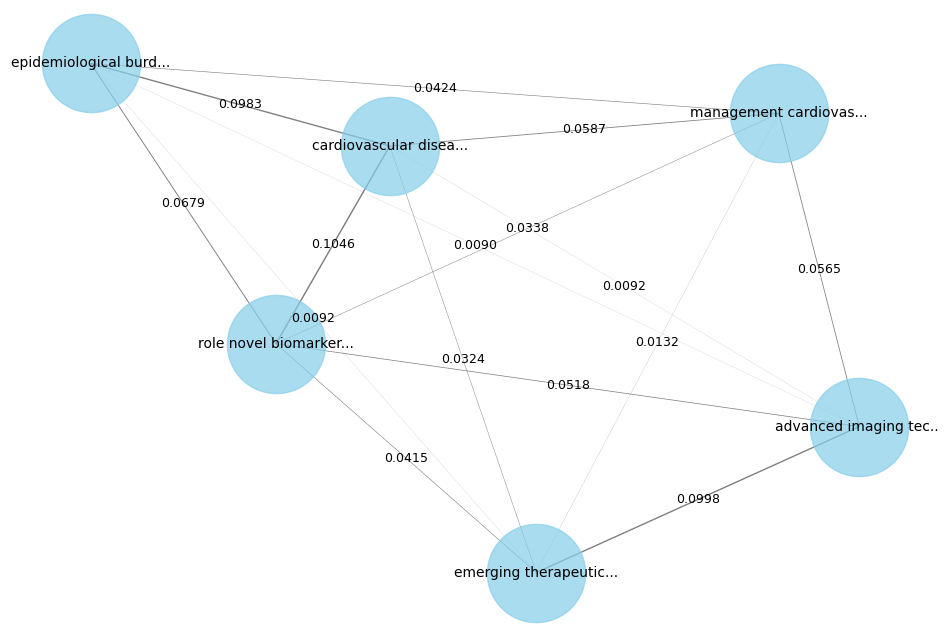

In [8]:
documents_graph = DocumentsGraph(documents=documents)
documents_graph.plot()

In [9]:
documents_graph.save("med_graph")

In [10]:
user_query = "How do advanced imaging techniques enhance cardiovascular risk stratification?"
#query_embeddings = get_embedding_batch(user_query)
query_embeddings = [[-0.008118726313114166, -0.0062311794608831406, 0.052169069647789, 0.03970671072602272, -0.0021519174333661795, 0.014349905773997307, -0.01261017844080925, 0.008903308771550655, 0.0033771172165870667, -0.005219181068241596, -0.03106493130326271, 0.021479375660419464, -0.03609080985188484, 0.015179971233010292, 0.0200466588139534, -0.04220828041434288, -0.047438833862543106, 0.027471769601106644, 0.049849435687065125, 0.012894447892904282, 0.020080771297216415, -0.04022976756095886, 0.03015526942908764, -0.05089554563164711, 0.007277289871126413, 0.004923541564494371, -0.04129862040281296, -0.03197459131479263, 0.010705575346946716, 0.014497725293040276, 0.03570420295000076, -0.026653073728084564, 0.022582339122891426, -0.0057706632651388645, -0.01203026995062828, 0.04762076586484909, -0.044937264174222946, 0.03299796208739281, -0.018613941967487335, 0.006219808477908373, 0.06908877193927765, 0.015657544136047363, -0.010512272827327251, 0.003974082414060831, -0.03136057034134865, -0.0034993530716747046, 0.010017644613981247, -0.08569008857011795, -0.027858374640345573, 0.041162170469760895, -0.011677775532007217, 0.029200125485658646, -0.014611433260142803, -0.025038424879312515, -0.0293138325214386, 0.0020382096990942955, -0.01387233380228281, -0.006447223946452141, -0.016862845048308372, 0.049485571682453156, 0.010353081859648228, -0.03020075336098671, 0.04134410247206688, -0.01064872182905674, -0.035044699907302856, -0.033793915063142776, 0.0057393936440348625, -0.0019273447105661035, 0.006731492932885885, -0.040343474596738815, 0.03570420295000076, -0.04300423339009285, 0.006572302430868149, 0.03138331323862076, 0.01966005377471447, -0.039524778723716736, -0.03020075336098671, 0.04148055240511894, 0.02125195972621441, 0.019114255905151367, 0.011746000498533249, -0.015703026205301285, 0.006754234433174133, 0.022366294637322426, -0.0003901593736372888, 0.0037324537988752127, -0.0055915736593306065, -0.02935931645333767, -0.044505175203084946, -0.03759175166487694, -0.022241216152906418, 0.03433971107006073, -0.024219730868935585, 0.007300031371414661, -0.019216593354940414, 0.053033247590065, 0.014577320776879787, 0.02394683100283146, 0.0037040268070995808, 0.01677187904715538, -0.015179971233010292, 0.018534347414970398, 0.002485933480784297, -0.004232767503708601, 0.04630175605416298, -0.06012860685586929, -0.016885586082935333, 0.032133784145116806, 0.019751019775867462, 0.013406132347881794, 0.022661935538053513, -0.028836261481046677, -0.05962829291820526, 0.04038895666599274, 0.00019881072512362152, -0.024265212938189507, -0.08032308518886566, 0.007675266359001398, -0.017317675054073334, 0.023116765543818474, -0.03463535010814667, 0.022616451606154442, 0.05007684975862503, -0.01032465510070324, 0.03806932270526886, -0.01845475286245346, 0.014008782804012299, 0.0010354502592235804, -0.035772427916526794, -0.07468318939208984, -0.045255646109580994, 0.009449105709791183, 0.01282622292637825, -0.016692282631993294, 0.009670835919678211, 0.04380018636584282, 0.021001802757382393, 0.037068694829940796, -0.03429422900080681, -0.011666405014693737, -0.011927932500839233, 0.010847710072994232, 0.0372961089015007, -0.025311322882771492, -0.008442793041467667, -0.020922208204865456, -0.026289209723472595, 0.04148055240511894, -0.029905112460255623, 0.01771565154194832, 0.020706163719296455, 0.05089554563164711, -5.543247971218079e-05, -0.01838652789592743, -0.04839397594332695, 0.003999666776508093, 0.0023835967294871807, 0.03938833251595497, -0.037478040903806686, -0.003652858315035701, 0.013940557837486267, 0.026766780763864517, 0.018318302929401398, -0.008829399012029171, -0.026152759790420532, -0.029654955491423607, 0.018716279417276382, 0.04050266742706299, -0.019432637840509415, 0.0031553874723613262, -0.032088298350572586, -0.03806932270526886, -0.030291719362139702, -0.020535601302981377, -0.02317361906170845, 0.008067557588219643, 0.0021874508820474148, -0.005565989762544632, -0.005199282430112362, -0.02280975505709648, 0.021786386147141457, 0.04223102331161499, 0.012212201952934265, 0.028768036514520645, -0.01948949135839939, 0.023253215476870537, -0.02146800421178341, -0.020421894267201424, -0.011666405014693737, -0.01864805445075035, 0.03602258488535881, 0.0571267232298851, 0.0030985334888100624, 0.05990119278430939, -0.017658798024058342, 0.00558873126283288, -0.004940597340464592, 0.047711730003356934, -0.0003880273725371808, -0.03222474828362465, 0.017363158985972404, -0.027016937732696533, 0.004286778625100851, -0.002626646775752306, 0.028358688578009605, 0.008101670071482658, 0.005020192824304104, 0.05826380103826523, -0.028358688578009605, 0.02105865813791752, -0.011836966499686241, -0.016612688079476357, -0.0021504960022866726, 0.027403544634580612, -0.009619667194783688, 0.00827791728079319, 0.01987609826028347, -0.01365628931671381, 0.033771172165870667, -0.008067557588219643, 0.0013893654104322195, -0.03145153820514679, 0.023184990510344505, 0.03847866877913475, -0.053624529391527176, -0.017147114500403404, 0.03797835484147072, -0.027835633605718613, 0.013053638860583305, -0.05753607302904129, 0.054352257400751114, 0.012121235951781273, -0.014645545743405819, -0.012371392920613289, -0.0211268812417984, -0.010762429796159267, -0.009636723436415195, -0.03765997290611267, 0.033702947199344635, -0.03677305579185486, -0.005975337233394384, 0.05967377498745918, 0.0215589702129364, 0.018466122448444366, -0.047438833862543106, 0.04141232743859291, -0.0021519174333661795, -0.017363158985972404, -0.013576693832874298, 0.03977493569254875, -0.03688676282763481, -0.04414131119847298, -0.03515840694308281, 0.013349278829991817, 0.013986041769385338, 0.0036585438065230846, 0.026380175724625587, -0.01735178753733635, -0.022241216152906418, -0.00142276706174016, 0.04068459942936897, -0.0155210942029953, -0.02356022596359253, -0.030860256403684616, -0.010813597589731216, -0.004011037293821573, 0.0007618412491865456, 0.0058730002492666245, -0.030041562393307686, -0.023469259962439537, 0.03725062683224678, -0.029518507421016693, 0.008067557588219643, -0.014429501257836819, -0.023139506578445435, -0.002852640813216567, 0.011410563252866268, 0.007521761115640402, -0.0244698878377676, 0.02642565779387951, 0.015054893679916859, -0.034498900175094604, 0.029063675552606583, -0.01607826165854931, -0.0015322106191888452, 0.0005436647334136069, -0.023230472579598427, -0.006856571417301893, -0.004053677897900343, -0.03568146005272865, 0.018375156447291374, -0.01218945998698473, -0.0016046992968767881, -0.04100298136472702, -0.014372647739946842, 0.005767820868641138, -0.051304891705513, -0.02168404869735241, 0.0023437989875674248, 0.01910288631916046, 0.029586730524897575, 0.006361943203955889, -0.016476238146424294, -0.0014753567520529032, 0.028222238644957542, 0.05003136768937111, 0.013212828896939754, 0.008186951279640198, -0.05007684975862503, -0.01486159022897482, -0.01834104396402836, -0.02606179378926754, 0.09596925973892212, -0.014054265804588795, 0.012951301410794258, -0.021956948563456535, 0.028881743550300598, -0.07895859330892563, 0.007675266359001398, -0.03893350064754486, -0.025379547849297523, -0.006327830720692873, 0.03188362717628479, 0.011131979525089264, 0.007101043127477169, -0.01631704904139042, -0.03613629192113876, 0.02697145566344261, -0.0019060245249420404, -0.06071988493204117, -0.01925070583820343, 0.0007526025292463601, 0.005631371401250362, -0.05917346104979515, -0.021854611113667488, -0.010944361798465252, -0.007879940792918205, -0.02694871462881565, -0.0077832890674471855, 0.005418169777840376, -0.018181852996349335, -0.041594259440898895, 0.016976552084088326, 0.03484002500772476, 0.04843946173787117, -0.0009295600466430187, -0.024265212938189507, 0.023264585062861443, -0.02981414645910263, 0.0022201419342309237, -0.044914521276950836, -0.004698968958109617, 0.007373941130936146, 0.04557402804493904, -0.009960790164768696, 0.01569165661931038, 0.004582418594509363, -0.022252587601542473, -0.0002544208837207407, -0.04359551519155502, -0.01855708844959736, -0.020592456683516502, -0.02731257863342762, 0.07450125366449356, 0.019068773835897446, -0.008198321796953678, -0.010785170830786228, 0.002613854594528675, -0.04671110212802887, -0.033793915063142776, -0.013281053863465786, 0.01884135790169239, -0.01834104396402836, 0.030473651364445686, -0.05958281084895134, 0.02485649287700653, 0.049440085887908936, -0.002771624131128192, 0.04627901315689087, 0.06890683621168137, 0.03261135518550873, 0.028063049539923668, 0.01597592607140541, -0.03852415457367897, 0.013508468866348267, 0.022889351472258568, 0.011035327799618244, -0.018534347414970398, -0.06899780035018921, 0.008999960497021675, -0.043982118368148804, 0.01759057305753231, -0.0256524458527565, -0.009739060886204243, -0.05671737715601921, 0.0073455143719911575, 0.0021362826228141785, 0.0670420303940773, 0.030519133433699608, -0.027972083538770676, -0.024742785841226578, 0.021843239665031433, -0.019671423360705376, -0.024128764867782593, 0.02972318045794964, 0.012757998891174793, 0.002385017927736044, -0.007771918084472418, 0.022252587601542473, 0.05089554563164711, -0.0018420639680698514, -0.06945263594388962, 0.034930989146232605, -0.040730081498622894, 0.04191264137625694, 0.019785132259130478, 0.028313206508755684, -0.02088809572160244, -0.059400878846645355, 0.007464907597750425, 0.006282347720116377, 0.01106944028288126, 0.005554618779569864, -0.04193538427352905, 0.05699027702212334, -0.012291797436773777, 0.02129744365811348, -0.043277133256196976, 0.006964593660086393, -0.046483688056468964, 0.0005195018602535129, 0.04259488731622696, 0.06431304663419724, 0.009830026887357235, 0.0074080536141991615, 0.03217926621437073, 0.05767252296209335, 0.021865982562303543, -0.001461143372580409, 0.027449026703834534, -0.02365119196474552, -0.006106100976467133, 0.003527779830619693, -0.05999215692281723, 0.0032662523444741964, 0.0043521602638065815, -0.011626607738435268, 0.06240275874733925, -0.01106944028288126, -0.004269722383469343, 0.02437891997396946, 0.02976866438984871, -0.05462515726685524, 0.02074027620255947, -0.02735806070268154, -0.07381901144981384, 0.01280348189175129, -0.025925345718860626, 0.0157371386885643, 0.0043606883846223354, 0.014577320776879787, -0.04045718163251877, 0.0058730002492666245, 0.002413444919511676, 0.029586730524897575, 0.035044699907302856, -0.01694243960082531, 0.0031553874723613262, 0.028449654579162598, -0.043208908289670944, -0.003996823914349079, -0.0306100994348526, 0.006850886158645153, -0.00815852452069521, 0.012439616955816746, -0.036545637995004654, 0.024151505902409554, 0.009488903917372227, -0.002466034609824419, 0.04316342622041702, -0.0206947922706604, -0.029291091486811638, -0.0009487482020631433, 0.0124509884044528, 0.03477180004119873, 0.060628920793533325, -0.01884135790169239, -0.033339083194732666, 0.04539209604263306, -0.01657857559621334, 0.008221063762903214, -0.02599356882274151, 0.006492706947028637, -0.00965946540236473, 0.005091260187327862, -0.03422600403428078, 0.02158171311020851, -0.0014682500623166561, 0.014907073229551315, 0.025106649845838547, 0.102609783411026, 0.01834104396402836, 0.038251254707574844, -0.023673932999372482, 0.04966750368475914, 0.0594918429851532, -0.00753881735727191, 0.031269606202840805, 0.003758037928491831, 0.05739962309598923, -0.02519761584699154, 0.01627156510949135, -0.002832741942256689, -0.00548070902004838, -0.030382685363292694, 0.02175227366387844, 0.03142879530787468, 0.011643663980066776, 0.0243561789393425, -0.042435694485902786, 0.023901348933577538, -0.015828104689717293, 0.017067518085241318, 0.005287406034767628, 0.009233061224222183, -0.06672365218400955, -0.04341358318924904, -0.028836261481046677, -0.041571516543626785, -0.02440166287124157, 0.006754234433174133, -0.028290463611483574, -0.0031696008518338203, 0.027972083538770676, -0.03174717724323273, 0.003851846791803837, 0.0008990011410787702, -0.019773760810494423, -0.03806932270526886, 0.007464907597750425, 0.018591200932860374, 0.015225455164909363, -0.005145271308720112, 0.013951929286122322, -0.0294275414198637, 0.010466789826750755, -0.00020183107699267566, -0.03818302974104881, -0.0009984953794628382, -0.003954183775931597, -0.01507763471454382, -0.07290934771299362, 0.06717848032712936, -0.01324694138020277, -0.011291169561445713, 0.01636253111064434, -0.0032946793362498283, -0.011109237559139729, -0.0075103905983269215, -0.0396612286567688, 0.005295934155583382, 0.016442127525806427, -0.018955064937472343, -0.033657465130090714, -0.01566891372203827, 0.024196987971663475, 0.019739648327231407, 0.005014507565647364, -0.02524309977889061, 0.005236237309873104, -0.03299796208739281, -0.02851787954568863, -0.011478787288069725, -0.008022074587643147, 0.033725690096616745, 0.011655034497380257, 0.0043436321429908276, -0.011325282044708729, 0.04175344854593277, 0.002707663457840681, -0.009107982739806175, -0.0021931363735347986, -0.009426364675164223, 8.186062768800184e-05, -0.018124999478459358, 0.012280426919460297, 0.02560696378350258, -0.00027556339045986533, -0.012291797436773777, 0.0020211534574627876, 0.033702947199344635, 0.02899545058608055, 0.018159111961722374, -0.02406053990125656, -0.018056774511933327, 0.011518585495650768, 0.010625979863107204, 0.003800678299739957, -0.015043522231280804, 0.020853983238339424, 0.03604532778263092, -0.025857120752334595, 0.02483375184237957, -0.044004861265420914, -0.013826850801706314, 0.00913072470575571, -0.0019131312146782875, 0.013599434867501259, -0.024583594873547554, -0.0016814519185572863, -0.002984825987368822, 0.030382685363292694, -0.021763645112514496, -0.01127411425113678, 0.01261017844080925, -0.008010704070329666, 0.013849591836333275, 0.037864647805690765, -0.006606414448469877, -0.052305519580841064, 0.004366373643279076, -0.0057479217648506165, -0.01367903035134077, -0.01884135790169239, 0.02849513851106167, -0.0007270182832144201, -0.016612688079476357, -0.0189664363861084, 0.0034083868376910686, -0.0060208202339708805, -0.007169267628341913, -0.014531837776303291, 0.003559049451723695, 0.012985413894057274, 0.019671423360705376, 0.03715966269373894, 0.002557000843808055, 0.0024305011611431837, -0.033725690096616745, -0.03063284233212471, -0.008039130829274654, 0.012041640467941761, 0.002474562730640173, -0.02250274457037449, 0.0166013166308403, 0.014588692225515842, 0.008567871525883675, 0.006731492932885885, -0.04662013798952103, 0.01593044213950634, -0.04555128514766693, -0.03238394111394882, -0.008027760311961174, -0.011632292531430721, 0.016885586082935333, -0.019796501845121384, 0.035385821014642715, 0.01345161534845829, -0.024492628872394562, 0.017817988991737366, 0.005494922399520874, -0.006009449250996113, 0.01239413395524025, 0.0016288621118292212, -0.0294275414198637, 0.008272231556475163, -0.013076379895210266, 0.046506430953741074, -0.04377744719386101, -0.00221445644274354, 0.0638127326965332, 0.0035220945719629526, -0.0035363079514354467, 0.010898878797888756, 0.0011100709671154618, 0.017022036015987396, 0.01713574305176735, 0.028631586581468582, -0.0306100994348526, 0.0426858514547348, 0.002925129374489188, 0.030041562393307686, -0.011029642075300217, 0.006828144658356905, -0.0058019328862428665, 0.023901348933577538, -8.092787174973637e-05, 0.014213456772267818, -0.0033231060951948166, -0.017863472923636436, 0.018716279417276382, 0.031133156269788742, 0.023241844028234482, 0.0008961584535427392, -0.012792111374437809, 0.035749685019254684, -0.014793365262448788, -0.009250117465853691, -0.009454791434109211, -0.03740981966257095, 0.04261762648820877, 0.012223572470247746, -0.04712045192718506, -0.038251254707574844, -0.014395388774573803, -0.020592456683516502, 0.019284818321466446, 0.02856336161494255, 0.02280975505709648, -0.0033771172165870667, 0.0007248863112181425, 0.013292424380779266, 0.021638566628098488, 0.00018743996042758226, 0.012576065957546234, 0.0007149368757382035, 0.006828144658356905, 0.014224827289581299, 0.0015862217405810952, -0.014474984258413315, 0.009181893430650234, -0.006867942400276661, -0.03343005105853081, 0.011149035766720772, 0.0298596303910017, 0.025083908811211586, -0.026653073728084564, 0.01795443892478943, 0.011893820948898792, 0.02300305850803852, -0.0015108904335647821, -0.03861511871218681, -0.01672639511525631, -0.04511919617652893, -0.017772506922483444, 0.005500607658177614, -0.03586339205503464, -0.04502823203802109, -0.0008144310559146106, 0.0454830601811409, 0.006822459399700165, -0.01701066456735134, -0.014463613741099834, -0.004178756382316351, 0.013133234344422817, 0.058081869035959244, -0.010330339893698692, 0.007840142585337162, -0.027153387665748596, -0.01032465510070324, 0.010597553104162216, 0.006805403158068657, 0.03186088427901268, -0.002308265306055546, 0.005861629731953144, -0.01043267734348774, 0.0153050497174263, 0.003792150178924203, 0.026789523661136627, -0.02813127264380455, -0.00025264418218284845, 0.009289915673434734, 0.0392291396856308, -0.00527034979313612, 0.000287467148154974, 0.03645467385649681, 0.021206477656960487, 0.06253921240568161, -0.026402916759252548, -0.007243177387863398, -0.0017596259713172913, -0.021718161180615425, 0.015157230198383331, 0.008954477496445179, 0.02166130766272545, 0.02353748492896557, -0.005077046807855368, -0.007629783358424902, -0.04689303785562515, 0.05426129326224327, -0.013724513351917267, -0.0031894997227936983, -0.012018898501992226, -0.010387194342911243, -0.0061458987183868885, -0.0020055186469107866, -0.0032548815943300724, -0.06190244480967522, -0.006475650705397129, -0.013406132347881794, 0.002514360472559929, 0.043686479330062866, -0.024674560874700546, -0.003601689822971821, -0.018272818997502327, 0.01992158032953739, -0.0030956908594816923, -0.09060225635766983, 0.008294973522424698, -0.009210320189595222, -0.022877980023622513, -0.0018306932179257274, 0.0023182148579508066, 0.02690323069691658, -0.006305089220404625, -0.023014428094029427, -0.021479375660419464, -0.04550580307841301, 0.015020781196653843, 0.007379626855254173, -0.02002391777932644, -0.003667071694508195, -0.005057147704064846, -0.0004367084475234151, 0.010830653831362724, -0.015384645201265812, -0.013815480284392834, -0.014429501257836819, 0.01722670905292034, 0.009778858162462711, 0.05135037750005722, -0.02033092826604843, 0.021456634625792503, 0.010489530861377716, -0.05053168162703514, -0.01761331595480442, 0.0031383312307298183, -0.017965808510780334, 0.020706163719296455, 0.0047501372173428535, 0.01910288631916046, 0.03463535010814667, -0.010654406622052193, 0.030087044462561607, -0.010000588372349739, -0.0024504000321030617, -0.0029166012536734343, -0.024265212938189507, 0.023878607898950577, 0.02972318045794964, 0.01590770110487938, 0.013326536864042282, 0.002741775708273053, 0.022241216152906418, 0.0017425697296857834, -0.013940557837486267, 0.03593161702156067, 0.014202086254954338, 0.037478040903806686, -0.025356806814670563, 0.018909582868218422, 0.016328418627381325, -0.00885782577097416, -0.00880665797740221, 0.014008782804012299, -0.013690401799976826, 0.02353748492896557, -0.01648760959506035, 0.010063127614557743, 0.051896173506975174, 0.014270310290157795, -0.009454791434109211, -0.020706163719296455, -0.03609080985188484, 0.04143507033586502, 0.0031838142313063145, -0.013792738318443298, 0.018943695351481438, 0.031246863305568695, -0.050349749624729156, -0.006788346916437149, -0.00011566200555535033, 0.006003763992339373, 0.010188206098973751, -0.010318969376385212, -0.018784504383802414, -0.016180599108338356, 0.028244981542229652, -0.03311166912317276, 0.008118726313114166, 0.026357434689998627, -0.012280426919460297, 0.0163852721452713, -0.005077046807855368, -0.006577987689524889, 0.03813754767179489, -0.017579203471541405, 0.051896173506975174, 0.012644290924072266, 0.04066185653209686, -0.0015492667444050312, -0.008937421254813671, -0.044004861265420914, 0.013121862895786762, -0.02854062058031559, 0.05594416707754135, -0.0034396564587950706, 0.028699811547994614, -0.03604532778263092, 0.017215339466929436, -0.026675814762711525, -0.0153050497174263, -0.035817909985780716, 0.005332889035344124, -0.010233689099550247, 0.019500862807035446, -0.008437108248472214, 0.005506292916834354, -0.0005461520631797612, 0.0015620589256286621, -0.020990433171391487, -0.008971533738076687, 0.04168522730469704, -0.010728317312896252, 0.01713574305176735, -0.02437891997396946, -0.026675814762711525, 0.042412955313920975, -0.0010013380087912083, -0.04550580307841301, -0.012587437406182289, -0.002888174494728446, -0.004698968958109617, 0.010398564860224724, -0.018466122448444366, -0.01430442277342081, 0.0249019768089056, 0.0020552659407258034, -0.003885959042236209, 0.0020225748885422945, -0.039956867694854736, 0.02774466760456562, 0.0023651192896068096, -0.011632292531430721, 0.02724435366690159, 0.017920326441526413, 0.00901133194565773, 0.0004701100697275251, 0.027585476636886597, 0.04627901315689087, 0.004102003760635853, -0.03768271580338478, 0.022480003535747528, -0.01931893080472946, -0.018250077962875366, 0.033725690096616745, -0.007089672144502401, 0.000617574667558074, 0.027403544634580612, -0.0036727571859955788, 0.0013381969183683395, -0.0329752191901207, 0.03465809300541878, 0.020296815782785416, 0.013565323315560818, 0.0010937254410237074, 0.012792111374437809, 0.053533561527729034, 0.017556462436914444, -0.055216435343027115, -0.01098415907472372, 0.0032264546025544405, 0.0074705928564071655, 0.042822301387786865, -0.03740981966257095, 0.01182559598237276, 0.00011388531856937334, 0.03322537615895271, -0.07145389169454575, -0.03222474828362465, -0.031201379373669624, -0.0032349827233701944, 0.056126099079847336, -0.0018676482141017914, -0.033634722232818604, 0.030928481370210648, -0.03313440829515457, -0.029677696526050568, 0.03142879530787468, 0.0034140723291784525, 0.05594416707754135, 0.014167973771691322, -0.020831242203712463, -0.020399153232574463, -0.010353081859648228, 0.017874842509627342, -0.002704820828512311, 0.02437891997396946, -0.008317714557051659, 0.011308225803077221, 0.0044459691271185875, 0.003800678299739957, -0.008681579492986202, -0.0009579869802109897, 0.025515997782349586, -0.027812892571091652, 0.01793169602751732, -0.08805520832538605, 0.00030239130137488246, 0.011262742802500725, 0.002596798585727811, 0.0297459214925766, -0.0034794542007148266, 0.009517330676317215, -0.022082027047872543, -0.012928560376167297, 0.00019117099873255938, -0.005304461810737848, 0.019728276878595352, -0.0009643830126151443, 0.016419384628534317, 0.0029905112460255623, -0.003792150178924203, 0.019091514870524406, -0.00913072470575571, -0.00871000625193119, 0.038228511810302734, -0.0196145698428154, -0.005946910474449396, -0.014418130740523338, 0.017067518085241318, -0.00849396176636219, -0.012792111374437809, 0.041207652539014816, 0.008647467009723186, 0.03759175166487694, 0.002875382313504815, -0.019910210743546486, 0.022434519603848457, 0.01280348189175129, -0.011052384041249752, -0.039888646453619, -0.006089044734835625, -0.019557716324925423, 0.028790777549147606, 0.026357434689998627, -0.014429501257836819, 0.004460182506591082, 0.0024248156696558, -0.0244698878377676, -0.024651819840073586, -0.007851513102650642, 0.012837594375014305, 0.034976474940776825, -0.016862845048308372, -0.02114962413907051, 0.016828732565045357, -0.020797129720449448, 0.03172443434596062, 0.03472631797194481, 0.012348650954663754, -0.030473651364445686, 0.0011640820885077119, -0.0069702789187431335, 0.0016700811684131622, 0.01920522190630436, 0.01862531341612339, -0.002846955321729183, 0.004300992004573345, 0.033634722232818604, 0.008687264285981655, -0.018898211419582367, -0.017238080501556396, 0.001508047804236412, -0.025447772815823555, 0.027972083538770676, 0.039570264518260956, 0.003903015283867717, -0.0060606179758906364, -0.03850141167640686, 0.02074027620255947, 0.006134527735412121, -0.017522349953651428, 0.021593082696199417, -0.017988551408052444, 0.00131758744828403, -0.021286072209477425, -0.024674560874700546, -0.032474905252456665, 0.0032747804652899504, 0.0013623598497360945, 0.026402916759252548, -0.008249490521848202, -0.011723259463906288, 0.0019614570774137974, 0.026289209723472595, -0.010193890891969204, -0.0332026332616806, 0.014600062742829323, -0.011581124737858772, -0.023673932999372482, 0.006845200899988413, 0.014486354775726795, -0.014588692225515842, 0.016680913046002388, 0.0603560209274292, 0.011893820948898792, 0.01640801504254341, -0.016908327117562294, 0.003945655655115843, 0.0013666239101439714, 0.019023289903998375, 0.016669541597366333, -0.032042816281318665, 0.004391958005726337, -0.01691969856619835, 0.008056187070906162, 0.012519212439656258, -0.011006901040673256, 0.01032465510070324, 0.008005018346011639, -0.020706163719296455, -0.02647114172577858, -0.010267800651490688, 0.00933539867401123, 0.012075752951204777, -0.030882999300956726, -0.020467378199100494, 0.003726768307387829, 0.026198243722319603, 0.009631038643419743, -0.051441341638565063, -0.002508674981072545, 0.03324811905622482, -0.0033117353450506926, 0.0031298031099140644, 0.041571516543626785, 0.00933539867401123, 0.013394761830568314, -0.004042306914925575, -0.010006273165345192, -0.0033088927157223225, 0.02938205748796463, 0.0215589702129364, -0.010358767583966255, -0.021229218691587448, -0.01032465510070324, 0.016442127525806427, 0.03861511871218681, -0.006998706143349409, 0.005790562368929386, 0.0076582105830311775, -0.029586730524897575, -0.0034680834505707026, 0.023423776030540466, -0.02688048966228962, -0.004610845353454351, 0.06804265826940536, 0.005827517248690128, 0.016112374141812325, 0.0009523016051389277, -0.011330967769026756, -0.02218436263501644, -0.018920954316854477, 0.01097278855741024, -0.0061231572180986404, 0.022013802081346512, 0.00753881735727191, -0.008511018007993698, 0.02526584081351757, 0.0035817911848425865, -0.023423776030540466, -0.002463191980496049, -0.009085241705179214, 0.019375784322619438, -0.0019614570774137974, 0.016180599108338356, 0.0016359688015654683, -0.01989883929491043, 0.015725769102573395, 0.02735806070268154, 0.011939303949475288, -0.009596926160156727, 0.012985413894057274, 0.05535288527607918, 0.03065558336675167, 0.0035192519426345825, -0.03554501384496689, -0.005773506127297878, -0.009488903917372227, 0.005116844549775124, -0.057354141026735306, 0.0006936166901141405, -0.004346475005149841, 0.03024623543024063, 0.02935931645333767, 0.0063335164450109005, 0.0034822968300431967, -0.0020282601471990347, -0.010449733585119247, -0.012655661441385746, -0.014145231805741787, 0.0030217808671295643, 0.01042130682617426, 0.016419384628534317, 0.015248196199536324, -0.027539992704987526, -0.015452870167791843, 0.004704654216766357, -0.008414366282522678, 0.020342299714684486, -0.025857120752334595, 0.040366217494010925, 0.017579203471541405, 0.016544463112950325, -0.021377038210630417, -0.004761508200317621, -0.023378293961286545, 0.009488903917372227, -0.02601631172001362, 0.010535013861954212, 0.018568459898233414, 0.011370765045285225, -0.0004121902456972748, 0.035840652883052826, -0.03563597798347473, -0.021979689598083496, 0.02613001875579357, 0.005634214263409376, 0.009295600466430187, -0.006134527735412121, -0.01445224229246378, 0.008931736461818218, 0.016715025529265404, 0.022730160504579544, -0.027926599606871605, -0.029040934517979622, -0.05271486937999725, -0.051941655576229095, 0.01033602561801672, 0.03395310416817665, -0.01182559598237276, 0.016953811049461365, 0.032497648149728775, 0.0059582809917628765, -0.025766154751181602, 0.034612610936164856, -0.010893193073570728, 0.03315715119242668, 0.04480081424117088, -0.006936166901141405, 0.0017525191651657224, -0.03756900876760483, -0.027835633605718613, 0.02726709470152855, 0.0033515330869704485, 0.007214750628918409, 0.013974670320749283, 0.007311401888728142, -0.010193890891969204, 0.015600689686834812, -0.034999214112758636, 0.0003359705733601004, 0.020251333713531494, -0.02360570803284645, -0.010165464133024216, -0.015441499650478363, 0.011939303949475288, -0.014054265804588795, -0.010472474619746208, 0.012587437406182289, -0.006430167704820633, 0.07836731523275375, 0.0029677697457373142, 0.03740981966257095, -0.013428873382508755, -0.03938833251595497, -0.006407426204532385, 0.049440085887908936, 0.046460945159196854, -0.034567125141620636, 0.012917188927531242, -0.017340417951345444, -0.0071351551450788975, -0.004787092097103596, -0.007902681827545166, -0.02064931020140648, 0.004113374277949333, 0.008010704070329666, 0.011006901040673256, 0.016214711591601372, -0.008238119073212147, 0.0018861256539821625, -0.01217808946967125, -0.014588692225515842, 0.04680206999182701, -0.01138213649392128, -0.016396643593907356, -0.04925815388560295, 0.0104554183781147, -0.05394291132688522, 0.0426858514547348, -0.046097081154584885, -0.016567204147577286, -0.01797717995941639, -0.008431422524154186, 0.019841985777020454, -0.021433891728520393, -0.009341083467006683, 0.004457340110093355, -0.03977493569254875, 0.007828772068023682, -0.010068812407553196, -0.020990433171391487, -0.010580496862530708, -0.0010972789023071527, 0.019353043287992477, -0.00279436563141644, 0.0022556756157428026, -0.015157230198383331, -0.0048126764595508575, 0.027812892571091652, -0.03058735840022564, 0.012485099956393242, 0.013588064350187778, 0.012041640467941761, 0.003794992808252573, -0.04086653143167496, -0.0006051379023119807, 0.0008485433645546436, 0.0034652408212423325, -0.016430756077170372, -0.026630332693457603, -0.006037876475602388, 0.017624685540795326, -0.006180010735988617, 0.019512232393026352, -0.004067891277372837, -0.007209065370261669, 0.022480003535747528, 0.028836261481046677, -0.0021448105107992887, 0.019216593354940414, 0.029996078461408615, -0.0005987418699078262, -0.0033941734582185745, -0.0294275414198637, -0.0021604453213512897, -0.037000469863414764, 0.01817048341035843, 0.013565323315560818, -0.022889351472258568, 0.06808814406394958, 0.002670708578079939, -0.006077674217522144, -0.05339711531996727, -0.01599866710603237, 0.0015961711760610342, -0.016464868560433388, 0.0062084379605948925, 0.0034766115713864565, -0.016567204147577286, -0.0068849981762468815, 0.006447223946452141, 0.0022158778738230467, 0.02945028245449066, -0.004292463883757591, -0.03809206560254097, -0.003988295793533325, 0.04455065727233887, 0.0049576535820961, -0.0069702789187431335, 0.03565872088074684, 0.020637938752770424, -0.0018150584073737264, 0.012155348435044289, -0.019887467846274376, -0.006054932717233896, -0.020228590816259384, 0.012325909920036793, -0.0031752861104905605, 0.012200831435620785, 0.04252666234970093, 0.009739060886204243, -0.034999214112758636, 0.012348650954663754, 0.018704909831285477, -0.04994039982557297, 0.006907740142196417, -0.013360649347305298, -0.0016217554220929742, 0.005699595902115107, -0.0018377999076619744, -0.015828104689717293, 0.017920326441526413, -0.011137664318084717, 0.005682540126144886, -0.04184441640973091, -0.016305677592754364, 0.009943733923137188, 0.011518585495650768, 0.0325431302189827, -0.02440166287124157, 0.011427619494497776, -0.010273486375808716, 0.005563146900385618, -0.02006939984858036, -0.04068459942936897, 0.053124215453863144, -0.022343553602695465, -0.011029642075300217, -0.0076980083249509335, -0.046165306121110916, 0.01819322444498539, -0.0012799217365682125, -0.0021462319418787956, 0.00028959917835891247, -0.01834104396402836, 0.03731885179877281, 0.014770624227821827, -0.013940557837486267, -0.02483375184237957, -0.006919110659509897, -0.0021064341999590397, -0.0014838848728686571, -0.012269055470824242, 0.025743411853909492, -0.009221690706908703, 0.011939303949475288, -0.009608296677470207, -0.001324694138020277, 0.04177619144320488, 0.04500548914074898, -0.023469259962439537, 0.0024148663505911827, -0.014565950259566307, -0.022343553602695465, -0.006106100976467133, 0.010114295408129692, -0.020376412197947502, -0.015191342681646347, 0.040320735424757004, 0.01001195888966322, 0.003982610534876585, 0.005224866792559624, -0.01607826165854931, 0.011416248045861721, 0.04261762648820877, 0.020569713786244392, -0.008607669733464718, 5.330046406015754e-05, -0.02728983759880066, 0.000603361229877919, -0.005722337868064642, -0.01778387650847435, -0.020376412197947502, -0.0073227728717029095, -0.004690440837293863, 0.03672757372260094, -0.0055290344171226025, -0.0018221650971099734, 0.02610727772116661, -0.0008215378038585186, -0.014759253710508347, 0.008772545494139194, -0.013133234344422817, -0.013997412286698818, 0.047757215797901154, -0.03354375809431076, -0.03172443434596062, 0.0021121196914464235, -0.0034311283379793167, 0.029973337426781654, -0.016589947044849396, -0.004286778625100851, 0.04934912174940109, 0.04209457337856293, 0.01304226741194725, 0.0061458987183868885, 0.022968946024775505, 0.0007369677186943591, 0.10251881927251816, 0.015123117715120316, -0.005975337233394384, 0.0011164670577272773, -0.0051736980676651, -0.009329712949693203, 0.0301780104637146, 0.036227259784936905, 0.011950674466788769, -0.0096992626786232, -0.022582339122891426, 0.008749803528189659, 0.006776975933462381, 0.03295247629284859, 0.014384018257260323, -0.006151583977043629, 0.0327705442905426, 0.009648093953728676, 0.02776740863919258, -0.0029592416249215603, -0.05307873338460922, 0.03302070125937462, 0.0034311283379793167, -0.02899545058608055, -0.011035327799618244, -0.01548698265105486, -0.010387194342911243, 0.006191381718963385, 0.033634722232818604, 0.0018278504721820354, 0.041162170469760895, -0.024310696870088577, -0.0017980022821575403, 0.012860335409641266, -0.008476905524730682, -0.017033405601978302, -0.032906994223594666, 0.018272818997502327, -0.00795385055243969, -0.02774466760456562, -0.009312656708061695, -0.00795385055243969, -0.015464240685105324, -0.008755489252507687, -0.013997412286698818, -0.001550688175484538, -0.014600062742829323, 0.0033913308288902044, -0.009352454915642738, 0.009017016738653183, 0.02220710553228855, 0.023492000997066498, 0.016305677592754364, 0.05285131558775902, -0.03343005105853081, -0.021286072209477425, -0.019000548869371414, -0.02129744365811348, 0.03797835484147072, -0.017897585406899452, -0.027221612632274628, 0.006162954960018396, 0.010233689099550247, -0.009687892161309719, 0.015555206686258316]]
print(query_embeddings)

[[-0.008118726313114166, -0.0062311794608831406, 0.052169069647789, 0.03970671072602272, -0.0021519174333661795, 0.014349905773997307, -0.01261017844080925, 0.008903308771550655, 0.0033771172165870667, -0.005219181068241596, -0.03106493130326271, 0.021479375660419464, -0.03609080985188484, 0.015179971233010292, 0.0200466588139534, -0.04220828041434288, -0.047438833862543106, 0.027471769601106644, 0.049849435687065125, 0.012894447892904282, 0.020080771297216415, -0.04022976756095886, 0.03015526942908764, -0.05089554563164711, 0.007277289871126413, 0.004923541564494371, -0.04129862040281296, -0.03197459131479263, 0.010705575346946716, 0.014497725293040276, 0.03570420295000076, -0.026653073728084564, 0.022582339122891426, -0.0057706632651388645, -0.01203026995062828, 0.04762076586484909, -0.044937264174222946, 0.03299796208739281, -0.018613941967487335, 0.006219808477908373, 0.06908877193927765, 0.015657544136047363, -0.010512272827327251, 0.003974082414060831, -0.03136057034134865, -0.00

### 3. Search vectorDB

In [11]:
vectordb_search_result = collection.query(query_embeddings=query_embeddings, n_results=1)['documents'][0][0]
print(vectordb_search_result)

Advanced imaging techniques, such as coronary artery calcium scoring and carotid intima-media thickness measurement, enhance the stratification of cardiovascular risk, enabling more tailored therapeutic interventions.


### 4. Search Documents Graph

To find interconnected documents containing terminology / n-grams used in search result.

Search results from a graph can give you a comprehensive view of the entity being searched and the info connected to it.


In [12]:
documents_containing_connected_terminology = documents_graph.find_connected_documents(vectordb_search_result)
documents_containing_connected_terminology

[{'document': 'emerging therapeutic intervention targeting molecular pathway including inhibitor inhibitor show promise reducing cardiovascular morbidity mortality'},
 {'document': 'management cardiovascular disease necessitates multifaceted approach involving antihypertensive agent statin modulate dyslipidemia antiplatelet therapy mitigate thrombosis risk'},
 {'document': 'role novel biomarkers including troponins natriuretic peptide pivotal early detection prognostication acute coronary syndrome heart failure within broader spectrum cardiovascular disease'}]

### 5. Augment interconnected documents into context